<a href="https://colab.research.google.com/github/IvanMegia/bird_strike_analysis/blob/main/TFM_Bird_Strike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARIES, FUNCTIONS AND GOOGLE DRIVE MOUNT

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
!pip install openpyxl
!pip install geopandas
!pip install plotnine
from plotnine import *
import geopandas as gpd
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
pd.options.display.max_columns = None

In [ ]:
#!jupyter nbconvert --to html '/content/gdrive/MyDrive/Colab Notebooks/TFM_Bird_Strike.ipynb'

In [ ]:
np.random.seed(10)

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Functions

#Remove duplicates from list
def remove_duplicates(x):
  return list(dict.fromkeys(x))

#Export dataframe to Excel file
def to_excel_sheet(filename, sheetname, dataframe):
  dataframe.to_excel ('/content/gdrive/MyDrive/TFM/'+ filename + '.xlsx', sheet_name = sheetname, index = True, header=True)

#Swap column a and column b
def swap_columns(dataframe, column_a, column_b):
  titles = dataframe.columns.tolist()
  titles[titles.index(str(column1))], titles[titles.index(str(column2))] = titles[titles.index(str(column2))], titles[titles.index(str(column1))]
  dataframe = dataframe[titles]
  return dataframe

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/TFM/STRIKES_REPORTS.csv',
                 delimiter = ';', encoding='latin-1')
print('Model dimensions are: ', df.shape)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17,20,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Model dimensions are:  (250116, 100)


,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,FAAREGION,LOCATION,OPID,OPERATOR,REG,FLT,AIRCRAFT,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,INGESTED,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,BIRD_BAND_NUMBER,SPECIES_ID,SPECIES,REMARKS,REMAINS_COLLECTED,REMAINS_SENT,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,608274,15/10/1990,10,1990,NaN,Night,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.24235,-85.39586,NaN,IN,AGL,NaN,PVT,PRIVATELY OWNED,NaN,NaN,C-172,226,07,7.0,10,A,1.0,A,1.0,7.0,NaN,NaN,NaN,Approach,200.0,70.0,NaN,No Cloud,None,NaN,NaN,NaN,NaN,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN,NaN,UNKBS,Unknown bird - small,NO DAMAGE,FALSO,FALSO,No,1,1,Small,NaN,NaN,NaN,OPER = CHARLES WEATHERLY /Legacy Record=XXXXXX/,REDACTED,REDACTED,FAA Form 5200-7,Tower,04/12/1998,FALSO
1,608275,01/08/1993,8,1993,NaN,Day,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,1,LA,ASW,NaN,TWA,TRANS WORLD AIRLINES,NaN,NaN,B-727,148,94,34.0,10,A,4.0,D,3.0,5.0,6.0,5.0,NaN,Landing Roll,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,None,NaN,NaN,UNKBM,Unknown bird - medium,NO DAMAGE REPTD. TIME = 1850Z,FALSO,FALSO,Unknown,NaN,1,Medium,NaN,NaN,NaN,/Legacy Record=XXXXXX/,REDACTED,REDACTED,AC Incident Rept,Tower,24/05/2005,FALSO
2,608276,18/08/1996,8,1996,NaN,NaN,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,22R,IL,AGL,NaN,UAL,UNITED AIRLINES,NaN,1228,B-757-200,148,26,34.0,40,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Landing Roll,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSO,FALSO,N,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN,NaN,ZT1,Blackbirds,BLACKBIRD.,FALSO,FALSO,Unknown,NaN,1,Small,NaN,NaN,NaN,/Legacy Record=XXXXXX/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,20/12/2007,FALSO
3,608277,19/09/1993,9,1993,NaN,Day,KMHT,MANCHESTER AIRPORT,42.93452,-71.43706,35,NH,ANE,NaN,PVT,PRIVATELY OWNED,N19CT,NaN,BE-33,123,06,13.0,16,A,1.0,A,1.0,7.0,NaN,NaN,NaN,Approach,1800.0,150.0,8.0,No Cloud,None,NaN,NaN,NaN,NaN,NaN,FALSO,VERDADERO,S,FALSO,FALSO,VERDADERO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,Precautionary Landing,NaN,NaN,UNKBL,Unknown bird - large,A/C WAS 8NM SE OF ARPT & OBSERVED SEV. BIRDS P...,FALSO,FALSO,No,2-10,1,Large,NaN,NaN,NaN,SOURCE = XXXX-X & NON-COM INCIDENT REPT.OPERAT...,REDACTED,REDACTED,Multiple,Tower,11/05/1998,FALSO
4,608278,23/03/1991,3,1991,NaN,Night,KELP,EL PASO INTL ARPT,31.80667,-106.37781,26L,TX,ASW,NaN,AAL,AMERICAN AIRLINES,N887AA,NaN,B-727,148,94,34.0,10,A,4.0,D,3.0,5.0,6.0,5.0,NaN,Approach,200.0,135.0,NaN,No Cloud,None,NaN,NaN,NaN,NaN,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADE

# QUICK DATASET OVERVIEW

In [ ]:
print('Model dimensions are: ', df.shape)
df_column_name = df.columns.values.tolist()
data_types = df.dtypes.values.tolist()

Model dimensions are:  (250116, 100)


Only columns with missing values are shown
TIME
False    129473
True     120643
Name: TIME, dtype: int64

TIME_OF_DAY
False    146912
True     103204
Name: TIME_OF_DAY, dtype: int64

AIRPORT_ID
False    250114
True          2
Name: AIRPORT_ID, dtype: int64

LATITUDE
False    219907
True      30209
Name: LATITUDE, dtype: int64

LONGITUDE
False    219907
True      30209
Name: LONGITUDE, dtype: int64

RUNWAY
False    189311
True      60805
Name: RUNWAY, dtype: int64

STATE
False    219907
True      30209
Name: STATE, dtype: int64

FAAREGION
False    219907
True      30209
Name: FAAREGION, dtype: int64

LOCATION
True     221378
False     28738
Name: LOCATION, dtype: int64

OPID
False    250111
True          5
Name: OPID, dtype: int64

REG
False    148508
True     101608
Name: REG, dtype: int64

FLT
True     141543
False    108573
Name: FLT, dtype: int64

AMA
False    180702
True      69414
Name: AMA, dtype: int64

AMO
False    170372
True      79744
Name: AMO, dtype: int64

EMA
False    16

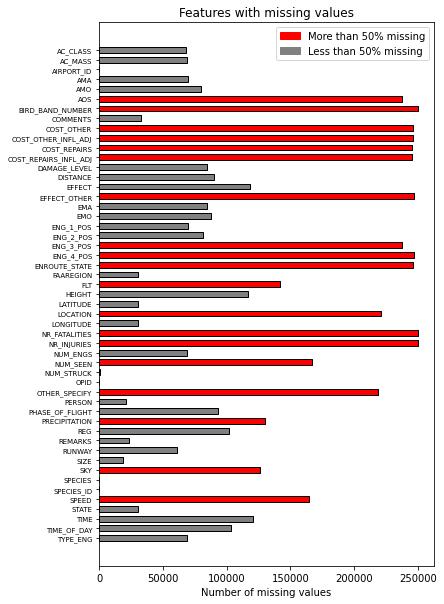

<Figure size 432x288 with 0 Axes>

In [ ]:
missing_data = df.isnull()

print ('Only columns with missing values are shown')
for column in missing_data.columns.values.tolist():
    if missing_data[column].sum() > 0: 
      print(column)
      print (missing_data[column].value_counts())
      print("")

missing_number = []

for column in df.columns[df.isnull().any()].tolist():
  j = sum(missing_data[column])
  missing_number.append(j)

print('Number of missing values for each feature are (alphabetically sorted):')
print('NOTE: only features with missing values are shown')
print('')
df_missing_data = pd.DataFrame({'Feature':df.columns[df.isnull().any()].tolist(),'Missing Values':missing_number}).sort_values('Feature', ascending=False)
plt.figure(figsize=(6, 10))
color = ['red' if (x>(df.shape[0]/2)) else 'grey' for x in df_missing_data['Missing Values']]
plt.barh(df_missing_data['Feature'], df_missing_data['Missing Values'], color=color, edgecolor='black', height= 0.6)
plt.tick_params(axis='y', which='major', labelsize=7)
colors = {'More than 50% missing':'red', 'Less than 50% missing':'grey'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.xlabel('Number of missing values')
plt.title('Features with missing values')
plt.show()

plt.savefig('/content/gdrive/MyDrive/TFM/Missing_values.eps', bbox_inches="tight", format='eps')
plt.savefig('/content/gdrive/MyDrive/TFM/Missing_values.png', bbox_inches="tight", format='png', dpi=1000)

Firstly, non-relevant features will be removed from the dataset in a first filtering according to the following criteria:
* Features with a number of missing values more than 50% will be removed at first unless they could serve to obtain important conclusions, for example, those features related to weather conditions. 
it also important to analyze if those non-available data is real or if the absence of has a meaning, for example, for boolean data.
* Features related to incident register, comments, duplicated o very similar features will be removed. This removal will be done after analyzing the notes publicated by the FAA on the content of each feature.

In [ ]:
columns_not_relevant = ['INDEX_NR', 'AMA', 'AMO', 'EMA', 'EMO', 'AC_MASS', 'NUM_ENGS', 'ENG_1_POS', 'ENG_2_POS', 'ENG_3_POS', 'ENG_4_POS', 'REG',
        'FLT', 'REMAINS_COLLECTED', 'REMAINS_SENT', 'FAAREGION', 'LOCATION', 'SPECIES_ID', 'COMMENTS', 'REMARKS', 'AOS', 'COST_OTHER', 'COST_REPAIRS_INFL_ADJ',
      'COST_OTHER_INFL_ADJ', 'REPORTED_NAME', 'REPORTED_TITLE', 'SOURCE', 'PERSON', 'LUPDATE', 'TRANSFER']
df_filtered = df.drop(columns_not_relevant, axis=1)
print ('After the first feature removal, the sape of the dataframe is:', df_filtered.shape)

After the first feature removal, the sape of the dataframe is: (250116, 70)


# DATA WRANGLING

In order to avoid problems with the strings, it is convenient to remove all the possible white spaces at the beggining and at the end of each value. This will avoid problems when dealing with specific values in the dataframe. This can save a lot of time in further analysis because not being able to identify why some features are not properly identified. Foe example, in the original dataframe, the AC_CLASS = 'A' has two spaces at the beggining, which is 'A  ', this issue could be difficult to identify in the analysis 

In [ ]:
for column in df_filtered.columns.values.tolist():
    if df_filtered[column].dtypes == 'object':
      df_filtered[column] = df_filtered[column].str.strip()


### INCIDENT_DATE, INCIDENT_MONTH, INCIDENT_YEAR

Date format to be changed to python datetime format and with DD-MM-YYYY 

In [ ]:
df_filtered['INCIDENT_DATE'] =  pd.to_datetime(df_filtered['INCIDENT_DATE']).dt.strftime('%d-%m-%Y')
df_filtered.head()

,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,OPID,OPERATOR,AIRCRAFT,AC_CLASS,TYPE_ENG,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,COST_REPAIRS,INGESTED,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,BIRD_BAND_NUMBER,SPECIES,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES
0,15-10-1990,10,1990,NaN,Night,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.24235,-85.39586,NaN,IN,PVT,PRIVATELY OWNED,C-172,A,A,Approach,200.0,70.0,NaN,No Cloud,None,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN,NaN,Unknown bird - small,No,1,1,Small,NaN,NaN,NaN
1,08-01-1993,8,1993,NaN,Day,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,1,LA,TWA,TRANS WORLD AIRLINES,B-727,A,D,Landing Roll,0.0,NaN,0.0,NaN,NaN,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,None,NaN,NaN,Unknown bird - medium,Unknown,NaN,1,Medium,NaN,NaN,NaN
2,18-08-1996,8,1996,NaN,NaN,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,22R,IL,UAL,UNITED AIRLINES,B-757-200,A,D,Landing Roll,0.0,NaN,0.0,NaN,NaN,NaN,FALSO,FALSO,N,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN,NaN,Blackbirds,Unknown,NaN,1,Small,NaN,NaN,NaN
3,19-09-1993,9,1993,NaN,Day,KMHT,MANCHESTER AIRPORT,42.93452,-71.43706,35,NH,PVT,PRIVATELY OWNED,BE-33,A,A,Approach,1800.0,150.0,8.0,No Cloud,None,NaN,FALSO,VERDADERO,S,FALSO,FALSO,VERDADERO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,Precautionary Landing,NaN,NaN,Unknown bird - large,No,2-10,1,Large,NaN,NaN,NaN
4,23-03-1991,3,1991,NaN,Night,KELP,EL PASO INTL ARPT,31.80667,-106.37781,26L,TX,AAL,AMERICAN AIRLINES,B-727,A,D,Approach,200.0,135.0,NaN,No Cloud,None,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,None,NaN,NaN,Unknown bird - small,No,NaN,1,Small,NaN,NaN,NaN


In [ ]:
# Create a date column in ISO format
df_filtered['INCIDENT_DATE_cleaned'] =  pd.to_datetime(df['INCIDENT_DATE'])
df_filtered['INCIDENT_MONTH_cleaned'] = df_filtered['INCIDENT_DATE_cleaned'].dt.month
df_filtered['INCIDENT_YEAR_cleaned'] = df_filtered['INCIDENT_DATE_cleaned'].dt.year
df_filtered.head()

,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,OPID,OPERATOR,AIRCRAFT,AC_CLASS,TYPE_ENG,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,COST_REPAIRS,INGESTED,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,BIRD_BAND_NUMBER,SPECIES,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,INCIDENT_DATE_cleaned,INCIDENT_MONTH_cleaned,INCIDENT_YEAR_cleaned
0,15-10-1990,10,1990,NaN,Night,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.24235,-85.39586,NaN,IN,PVT,PRIVATELY OWNED,C-172,A,A,Approach,200.0,70.0,NaN,No Cloud,None,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN,NaN,Unknown bird - small,No,1,1,Small,NaN,NaN,NaN,1990-10-15,10,1990
1,08-01-1993,8,1993,NaN,Day,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,1,LA,TWA,TRANS WORLD AIRLINES,B-727,A,D,Landing Roll,0.0,NaN,0.0,NaN,NaN,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,None,NaN,NaN,Unknown bird - medium,Unknown,NaN,1,Medium,NaN,NaN,NaN,1993-01-08,1,1993
2,18-08-1996,8,1996,NaN,NaN,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,22R,IL,UAL,UNITED AIRLINES,B-757-200,A,D,Landing Roll,0.0,NaN,0.0,NaN,NaN,NaN,FALSO,FALSO,N,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN,NaN,Blackbirds,Unknown,NaN,1,Small,NaN,NaN,NaN,1996-08-18,8,1996
3,19-09-1993,9,1993,NaN,Day,KMHT,MANCHESTER AIRPORT,42.93452,-71.43706,35,NH,PVT,PRIVATELY OWNED,BE-33,A,A,Approach,1800.0,150.0,8.0,No Cloud,None,NaN,FALSO,VERDADERO,S,FALSO,FALSO,VERDADERO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,Precautionary Landing,NaN,NaN,Unknown bird - large,No,2-10,1,Large,NaN,NaN,NaN,1993-09-19,9,1993
4,23-03-1991,3,1991,NaN,Night,KELP,EL PASO INTL ARPT,31.80667,-106.37781,26L,TX,AAL,AMERICAN AIRLINES,B-727,A,D,Approach,200.0,135.0,NaN,No Cloud,None,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,None,NaN,NaN,Unknown bird - small,No,NaN,1,Small,NaN,NaN,NaN,1991-03-23,3,1991


In the following lines, it is checked that there is no missing data for INCIDENT_DATE:

In [ ]:
print('The number of missing values for INCIDENT_DATE_cleaned is:', df_filtered['INCIDENT_DATE_cleaned'].isnull().sum())

The number of missing values for INCIDENT_DATE_cleaned is: 0


In the following lines, it is checked that there is no missing data for INCIDENT_MONTH:

In [ ]:
print('The number of missing values for INCIDENT_MONTH_cleaned is:', df_filtered['INCIDENT_MONTH_cleaned'].isnull().sum())

The number of missing values for INCIDENT_MONTH_cleaned is: 0


In the following lines, it is checked that there is no missing data for INCIDENT_YEAR:

In [ ]:
print('The number of missing values for INCIDENT_YEAR_cleaned is:', df_filtered['INCIDENT_YEAR_cleaned'].isnull().sum())

The number of missing values for INCIDENT_YEAR_cleaned is: 0


In [ ]:
df_filtered.shape

(250116, 73)

In [ ]:
df_filtered.drop(columns = ['INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR'], inplace = True)

### TIME, TIME_OF_DAY

In the following lines, it is checked that there is no missing data for TIME:

In [ ]:
print('The number of missing values for TIME is:', df_filtered['TIME'].isnull().sum())

The number of missing values for TIME is: 120643


In [ ]:
df_TIME = pd.DataFrame(data = {'TIME_single_values': remove_duplicates(df_filtered['TIME'])}).sort_values(by = 'TIME_single_values').reset_index(drop = True)
df_TIME.head(20)

,TIME_single_values
0,%00:1
1,%00:4
2,%01:1
3,%01:3
4,%06:3
5,%06:4
6,%07:0
7,%07:1
8,%07:4
9,%07:5


Before filling NaN values, it is necessary to remove all the symbols form the strings as it is shown on the table below:

In [ ]:
df_filtered['TIME_cleaned'] = df_filtered['TIME'].dropna(inplace = False).astype(str).map(lambda x: x.lstrip('+-%:').rstrip('+-%:'))
df_TIME_cleaned = pd.DataFrame(data = {'TIME_cleaned_single_values': remove_duplicates(df_filtered['TIME_cleaned'])}).sort_values(by = 'TIME_cleaned_single_values').reset_index(drop = True)
df_TIME_cleaned.head(10)

,TIME_cleaned_single_values
0,0-:84
1,00:00
2,00:01
3,00:02
4,00:03
5,00:04
6,00:05
7,00:06
8,00:07
9,00:08


Value with wrong data format shown above is replaced:

In [ ]:
df_filtered['TIME_cleaned'].replace('0-:84','00:00', inplace = True )
df_filtered.head(50)

,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,OPID,OPERATOR,AIRCRAFT,AC_CLASS,TYPE_ENG,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,COST_REPAIRS,INGESTED,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,BIRD_BAND_NUMBER,SPECIES,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,INCIDENT_DATE_cleaned,INCIDENT_MONTH_cleaned,INCIDENT_YEAR_cleaned,TIME_cleaned
0,NaN,Night,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.242350,-85.395860,NaN,IN,PVT,PRIVATELY OWNED,C-172,A,A,Approach,200.0,70.0,NaN,No Cloud,None,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN,NaN,Unknown bird - small,No,1,1,Small,NaN,NaN,NaN,1990-10-15,10,1990,NaN
1,NaN,Day,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.993390,-90.258030,1,LA,TWA,TRANS WORLD AIRLINES,B-727,A,D,Landing Roll,0.0,NaN,0.0,NaN,NaN,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,None,NaN,NaN,Unknown bird - medium,Unknown,NaN,1,Medium,NaN,NaN,NaN,1993-01-08,1,1993,NaN
2,NaN,NaN,KORD,CHICAGO O'HARE INTL ARPT,41.979600,-87.904460,22R,IL,UAL,UNITED AIRLINES,B-757-200,A,D,Landing Roll,0.0,NaN,0.0,NaN,NaN,NaN,FALSO,FALSO,N,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN,NaN,Blackbirds,Unknown,NaN,1,Small,NaN,NaN,NaN,1996-08-18,8,1996,NaN
3,NaN,Day,KMHT,MANCHESTER AIRPORT,42.934520,-71.437060,35,NH,PVT,PRIVATELY OWNED,BE-33,A,A,Approach,1800.0,150.0,8.0,No Cloud,None,NaN,FALSO,VERDADERO,S,FALSO,FALSO,VERDADERO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,Precautionary Landing,NaN,NaN,Unknown bird - large,No,2-10,1,Large,NaN,NaN,NaN,1993-09-19,9,1993,NaN
4,NaN,Night,KELP,EL PASO INTL ARPT,31.806670,-106.377810,26L,TX,AAL,AMERICAN AIRLINES,B-727,A,D,Approach,200.0,135.0,NaN,No Cloud,None,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,None,NaN,NaN,Unknown bird - small,No,NaN,1,Small,NaN,NaN,NaN,1991-03-23,3,1991,NaN
5,NaN,Night,KPDX,PORTLAND INTL (OR),45.588720,-122.597500,NaN,OR,AAL,AMERICAN AIRLINES,MD-80,A,D,Approach,300.0,140.0,NaN,No Cloud,None,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,None,NaN,NaN,Unknown bird - medium,No,1,1,Medium,NaN,NaN,NaN,1990-10-26,10,1990,NaN
6,NaN,Day,ZZZZ,UNKNOWN,NaN,NaN,NaN,NaN,USA,1US AIRWAYS,DC-9-30,A,D,Climb,10500.0,280.0,NaN,No Cloud,NaN,NaN,FALSO,FALSO,N,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,None,NaN,NaN,Unknown bird - medium,No,NaN,1,Medium,NaN,NaN,NaN,1990-08-22,8,1990,NaN
7,NaN,NaN,KLAX,LOS ANGELES INTL,33.942540,-118.408070,24R,CA,UAL,UNITED AIRLINES,B-737-500,A,D,Approach,4000.0,NaN,9.0,NaN,NaN,NaN,FALSO,FALSO,N,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FA

In [ ]:
df_filtered['TIME_cleaned'] = df_filtered['TIME_cleaned'].dropna(inplace = False).str[:2].map(lambda x: x.lstrip('+-%:').rstrip('+-%:'))
df_TIME_cleaned = pd.DataFrame(data = {'TIME_cleaned_single_values': remove_duplicates(df_filtered['TIME_cleaned'].dropna(inplace=False).astype(int))}).sort_values(by = 'TIME_cleaned_single_values').reset_index(drop = True)
# As there are NaN values in the dataframe is not possible to remove decimal places
df_filtered['TIME_cleaned'] = df_filtered['TIME_cleaned'].dropna(inplace = False).astype(int)
df_TIME_cleaned

,TIME_cleaned_single_values
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [ ]:
df_filtered.head()

,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,OPID,OPERATOR,AIRCRAFT,AC_CLASS,TYPE_ENG,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,COST_REPAIRS,INGESTED,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,BIRD_BAND_NUMBER,SPECIES,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,INCIDENT_DATE_cleaned,INCIDENT_MONTH_cleaned,INCIDENT_YEAR_cleaned,TIME_cleaned
0,NaN,Night,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.24235,-85.39586,NaN,IN,PVT,PRIVATELY OWNED,C-172,A,A,Approach,200.0,70.0,NaN,No Cloud,None,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN,NaN,Unknown bird - small,No,1,1,Small,NaN,NaN,NaN,1990-10-15,10,1990,NaN
1,NaN,Day,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,1,LA,TWA,TRANS WORLD AIRLINES,B-727,A,D,Landing Roll,0.0,NaN,0.0,NaN,NaN,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,None,NaN,NaN,Unknown bird - medium,Unknown,NaN,1,Medium,NaN,NaN,NaN,1993-01-08,1,1993,NaN
2,NaN,NaN,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,22R,IL,UAL,UNITED AIRLINES,B-757-200,A,D,Landing Roll,0.0,NaN,0.0,NaN,NaN,NaN,FALSO,FALSO,N,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN,NaN,Blackbirds,Unknown,NaN,1,Small,NaN,NaN,NaN,1996-08-18,8,1996,NaN
3,NaN,Day,KMHT,MANCHESTER AIRPORT,42.93452,-71.43706,35,NH,PVT,PRIVATELY OWNED,BE-33,A,A,Approach,1800.0,150.0,8.0,No Cloud,None,NaN,FALSO,VERDADERO,S,FALSO,FALSO,VERDADERO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,Precautionary Landing,NaN,NaN,Unknown bird - large,No,2-10,1,Large,NaN,NaN,NaN,1993-09-19,9,1993,NaN
4,NaN,Night,KELP,EL PASO INTL ARPT,31.80667,-106.37781,26L,TX,AAL,AMERICAN AIRLINES,B-727,A,D,Approach,200.0,135.0,NaN,No Cloud,None,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,None,NaN,NaN,Unknown bird - small,No,NaN,1,Small,NaN,NaN,NaN,1991-03-23,3,1991,NaN


Before filling NaN values, some exploratory analysis is done for the time of the impact

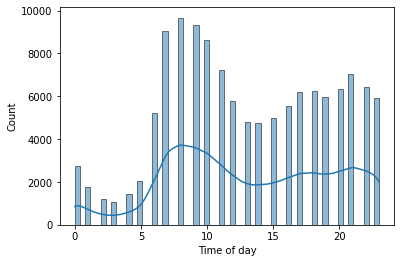

In [ ]:
sns.histplot(data=df_filtered, x='TIME_cleaned', kde=True)
plt.xlabel('Time of day')
plt.show()

In the following lines, it is checked that there is no missing data for TIME_OF_DAY:

In [ ]:
print('The number of missing values for TIME_OF_DAY is:', df_filtered['TIME_OF_DAY'].isnull().sum())

The number of missing values for TIME_OF_DAY is: 103204


In [ ]:
round(df_filtered['TIME_OF_DAY'].value_counts(normalize = True),ndigits=3)

Day      0.615
Night    0.303
Dusk     0.045
Dawn     0.037
Name: TIME_OF_DAY, dtype: float64

As it can be seen, approximately 62% of bird strikes happened during Day, 31% during night, 5% during Dusk and 3% during Dawn. These percentages will be used as probabilities to randomly fill the missing values.

In [ ]:
#distribution_prob = df_filtered['TIME_OF_DAY'].value_counts(normalize = True)
df_filtered['TIME_OF_DAY_cleaned'] = df_filtered['TIME_OF_DAY']
#df_filtered.loc[df_filtered['TIME_OF_DAY'].isna(), 'TIME_OF_DAY_cleaned'] = np.random.choice(distribution_prob.index,
#                                                                                            p = distribution_prob.values, 
#                                                                                            size = df_filtered['TIME_OF_DAY'].isna().sum(), 
#                                                                                            replace = True)

In the following lines, it is checked that there is no missing data for TIME_OF_DAY_cleaned:

In [ ]:
print('The number of missing values for TIME_OF_DAY_cleaned is:', df_filtered['TIME_OF_DAY_cleaned'].isnull().sum())

The number of missing values for TIME_OF_DAY_cleaned is: 103204


The following hypothesis are considered regarding day times:

- Dawn goes from 6h to 7h -> [6, 7) -> !=6
- In a first approximation, average daylight in the USA is considered to be 15h and without dependance on the latitude on summer solstice, which is from 8h to 21h -> [7, 20] -> <7 and >20
- Dusk is considered to be between 21h and 22h [21, 22) -> !=21
- Night is considered to be between 22h and 5h [22, 5] -> <22 and >5

Therefore, values which are not inside those intervales will be removed and transformed into np.nan. Then, np.nan values will be replaced considering a random distribution based on the frequency of the values in the interval.

The analysis process is the following:

1. Convert to np.nan all the TIME_cleaned values out of the interval for each group
2. Fill all the np.nan values for TIME_cleaned for each group using a random distribution based on the probability of occurrence of the values for each group
3. Once this is done, fill al the nan values based on the distribution probability for TIME_OF_DAY_cleaned, and once this is done, do the same for the TIME_cleaned values corresponding to the previous NaN values of TIME_OF_DAY_cleaned


In [ ]:
#Initial TIME values for the different TIME_OF_DAY:
grouped_TIME_OF_DAY = df_filtered.groupby('TIME_OF_DAY_cleaned')
for i in list(grouped_TIME_OF_DAY.groups.keys()):
  print('Most frequent time values for', i, 'are:')
  print(grouped_TIME_OF_DAY.get_group(i).loc[:, 'TIME_cleaned'].value_counts())

Most frequent time values for Dawn are:
6.0     1824
7.0     1072
5.0      460
8.0      149
9.0       47
4.0       40
10.0      19
0.0       11
18.0       7
17.0       7
12.0       7
3.0        7
11.0       6
22.0       4
13.0       4
16.0       3
2.0        3
19.0       2
15.0       2
20.0       2
14.0       2
1.0        1
Name: TIME_cleaned, dtype: int64
Most frequent time values for Day are:
9.0     7259
8.0     7198
10.0    6903
11.0    5864
7.0     5754
16.0    4742
12.0    4732
15.0    4349
17.0    4277
13.0    4226
14.0    4196
18.0    3529
19.0    2167
6.0     1917
20.0     505
5.0      248
1.0      236
2.0      201
3.0      190
4.0      176
21.0      84
22.0      56
23.0      37
0.0       32
Name: TIME_cleaned, dtype: int64
Most frequent time values for Dusk are:
19.0    1287
18.0    1024
20.0     980
17.0     847
16.0     193
21.0     134
7.0       70
8.0       63
6.0       60
5.0       39
23.0      25
22.0      21
4.0       17
15.0      16
9.0       10
10.0       6
1.0      

In [ ]:
#len(grouped_TIME_OF_DAY.get_group('Dawn').loc[grouped_TIME_OF_DAY.get_group('Dawn')['TIME_cleaned'] != 6.0, 'TIME_cleaned'].index.tolist())


In [ ]:
#Time values for 'Dawn' outside the interval are replaced by np.nan
for i in grouped_TIME_OF_DAY.get_group('Dawn').loc[grouped_TIME_OF_DAY.get_group('Dawn')['TIME_cleaned'] != 6.0, 'TIME_cleaned'].index.tolist():
  df_filtered.loc[i, 'TIME_cleaned'] = np.nan

In [ ]:
#Time values for 'Day' outside the interval are replaced by np.nan
for i in grouped_TIME_OF_DAY.get_group('Day').loc[:,'TIME_cleaned'].index.tolist():
  if df_filtered.loc[i, 'TIME_cleaned'] > 20.0:
    df_filtered.loc[i, 'TIME_cleaned'] = np.nan
  elif df_filtered.loc[i, 'TIME_cleaned'] < 7.0:
    df_filtered.loc[i, 'TIME_cleaned'] = np.nan

In [ ]:
#Time values for 'Dusk' outside the interval are replaced by np.nan
for i in grouped_TIME_OF_DAY.get_group('Dusk').loc[grouped_TIME_OF_DAY.get_group('Dusk')['TIME_cleaned'] != 21.0, 'TIME_cleaned'].index.tolist():
  df_filtered.loc[i, 'TIME_cleaned'] = np.nan


In [ ]:
#Time values for 'Night' outside the interval are replaced by np.nan
for i in grouped_TIME_OF_DAY.get_group('Night').loc[:,'TIME_cleaned'].index.tolist():
  if df_filtered.loc[i, 'TIME_cleaned'] > 5.0 and df_filtered.loc[i, 'TIME_cleaned'] < 22.0:
    df_filtered.loc[i, 'TIME_cleaned'] = np.nan

In [ ]:
#Check modified TIME values for the different TIME_OF_DAY:
grouped_TIME_OF_DAY = df_filtered.groupby('TIME_OF_DAY_cleaned')
for i in list(grouped_TIME_OF_DAY.groups.keys()):
  print('Most frequent time values for', i, 'are:')
  print(grouped_TIME_OF_DAY.get_group(i).loc[:, 'TIME_cleaned'].value_counts())

Most frequent time values for Dawn are:
6.0    1824
Name: TIME_cleaned, dtype: int64
Most frequent time values for Day are:
9.0     7259
8.0     7198
10.0    6903
11.0    5864
7.0     5754
16.0    4742
12.0    4732
15.0    4349
17.0    4277
13.0    4226
14.0    4196
18.0    3529
19.0    2167
20.0     505
Name: TIME_cleaned, dtype: int64
Most frequent time values for Dusk are:
21.0    134
Name: TIME_cleaned, dtype: int64
Most frequent time values for Night are:
22.0    5863
23.0    5447
0.0     2441
1.0     1150
5.0      951
4.0      938
2.0      705
3.0      615
Name: TIME_cleaned, dtype: int64


In [ ]:
df_filtered.filter(['TIME_OF_DAY', 'TIME_OF_DAY_cleaned','TIME', 'TIME_cleaned']).head(17)

,TIME_OF_DAY,TIME_OF_DAY_cleaned,TIME,TIME_cleaned
0,Night,Night,NaN,NaN
1,Day,Day,NaN,NaN
2,NaN,NaN,NaN,NaN
3,Day,Day,NaN,NaN
4,Night,Night,NaN,NaN
5,Night,Night,NaN,NaN
6,Day,Day,NaN,NaN
7,NaN,NaN,NaN,NaN
8,Day,Day,NaN,NaN
9,Night,Night,NaN,NaN


In [ ]:
distribution_prob_TIME_OF_DAY_cleaned = df_filtered['TIME_OF_DAY_cleaned'].value_counts(normalize = True)
distribution_prob_TIME_cleaned_dawn = grouped_TIME_OF_DAY.get_group('Dawn').loc[:, 'TIME_cleaned'].value_counts(normalize = True)
distribution_prob_TIME_cleaned_day = grouped_TIME_OF_DAY.get_group('Day').loc[:, 'TIME_cleaned'].value_counts(normalize = True)
distribution_prob_TIME_cleaned_dusk = grouped_TIME_OF_DAY.get_group('Dusk').loc[:, 'TIME_cleaned'].value_counts(normalize = True)
distribution_prob_TIME_cleaned_night = grouped_TIME_OF_DAY.get_group('Night').loc[:, 'TIME_cleaned'].value_counts(normalize = True)
#Index for which TIME_OF_DAY_cleaned are NaN is saved in order to replace it in TIME_cleaned after filling NaN data with a random distribution for TIME_cleaned:
TIME_OF_DAY_cleaned_NaN = df_filtered.loc[df_filtered['TIME_OF_DAY_cleaned'].isna(), 'TIME_OF_DAY_cleaned'].index.tolist()

In [ ]:
#NaN data for TIME_OF_DAY_cleaned is replaced by a random distribution based on the probability of occurence of the values:
df_filtered.loc[df_filtered['TIME_OF_DAY_cleaned'].isna(), 'TIME_OF_DAY_cleaned'] = np.random.choice(distribution_prob_TIME_OF_DAY_cleaned.index,
                                                                                            p = distribution_prob_TIME_OF_DAY_cleaned.values, 
                                                                                            size = df_filtered['TIME_OF_DAY_cleaned'].isna().sum(), 
                                                                                            replace = True)

#TIME_cleaned values are replaced by np.nan at those index where TIME_OF_DAY_cleaned was NaN
df_filtered.loc[TIME_OF_DAY_cleaned_NaN, 'TIME_cleaned'] = np.nan



In [ ]:
df_filtered.filter(['TIME_OF_DAY', 'TIME_OF_DAY_cleaned','TIME', 'TIME_cleaned']).head(17)

,TIME_OF_DAY,TIME_OF_DAY_cleaned,TIME,TIME_cleaned
0,Night,Night,NaN,NaN
1,Day,Day,NaN,NaN
2,NaN,Night,NaN,NaN
3,Day,Day,NaN,NaN
4,Night,Night,NaN,NaN
5,Night,Night,NaN,NaN
6,Day,Day,NaN,NaN
7,NaN,Day,NaN,NaN
8,Day,Day,NaN,NaN
9,Night,Night,NaN,NaN


In [ ]:
grouped_TIME_OF_DAY = df_filtered.groupby('TIME_OF_DAY_cleaned')

In [ ]:
grouped_TIME_OF_DAY.get_group('Day').loc[grouped_TIME_OF_DAY.get_group('Day')['TIME_cleaned'].isna(), 'TIME_cleaned']


1        NaN
3        NaN
6        NaN
7        NaN
8        NaN
          ..
250101   NaN
250103   NaN
250108   NaN
250109   NaN
250113   NaN
Name: TIME_cleaned, Length: 88347, dtype: float64

In [ ]:
grouped_TIME_OF_DAY.get_group('Night').loc[grouped_TIME_OF_DAY.get_group('Night')['TIME_cleaned'].isna(), 'TIME_cleaned']

0        NaN
2        NaN
4        NaN
5        NaN
9        NaN
          ..
250107   NaN
250110   NaN
250111   NaN
250112   NaN
250114   NaN
Name: TIME_cleaned, Length: 57533, dtype: float64

In [ ]:
#To avoid chanined indexing while replacing the values, an index list is created form each group
index_NaN_dawn = grouped_TIME_OF_DAY.get_group('Dawn').loc[grouped_TIME_OF_DAY.get_group('Dawn')['TIME_cleaned'].isna(), 'TIME_cleaned'].index.tolist()
index_NaN_day = grouped_TIME_OF_DAY.get_group('Day').loc[grouped_TIME_OF_DAY.get_group('Day')['TIME_cleaned'].isna(), 'TIME_cleaned'].index.tolist()
index_NaN_dusk = grouped_TIME_OF_DAY.get_group('Dusk').loc[grouped_TIME_OF_DAY.get_group('Dusk')['TIME_cleaned'].isna(), 'TIME_cleaned'].index.tolist()
index_NaN_night = grouped_TIME_OF_DAY.get_group('Night').loc[grouped_TIME_OF_DAY.get_group('Night')['TIME_cleaned'].isna(), 'TIME_cleaned'].index.tolist()

In [ ]:
#NaN data for TIME_cleaned is replaced by a random distribution based on the probability of occurence of the values per group:
df_filtered.loc[index_NaN_day, 'TIME_cleaned'] = np.random.choice(distribution_prob_TIME_cleaned_day.index,
                                                                                            p = distribution_prob_TIME_cleaned_day.values, 
                                                                                            size = grouped_TIME_OF_DAY.get_group('Day')['TIME_cleaned'].isna().sum(), 
                                                                                            replace = True)
df_filtered.loc[index_NaN_night, 'TIME_cleaned'] = np.random.choice(distribution_prob_TIME_cleaned_night.index,
                                                                                            p = distribution_prob_TIME_cleaned_night.values, 
                                                                                            size = grouped_TIME_OF_DAY.get_group('Night')['TIME_cleaned'].isna().sum(), 
                                                                                            replace = True)
df_filtered.loc[index_NaN_dusk, 'TIME_cleaned'] = np.random.choice(distribution_prob_TIME_cleaned_dusk.index,
                                                                                            p = distribution_prob_TIME_cleaned_dusk.values, 
                                                                                            size = grouped_TIME_OF_DAY.get_group('Dusk')['TIME_cleaned'].isna().sum(), 
                                                                                            replace = True)
df_filtered.loc[index_NaN_dawn, 'TIME_cleaned'] = np.random.choice(distribution_prob_TIME_cleaned_dawn.index,
                                                                                            p = distribution_prob_TIME_cleaned_dawn.values, 
                                                                                            size = grouped_TIME_OF_DAY.get_group('Dawn')['TIME_cleaned'].isna().sum(), 
                                                                                            replace = True)

In [ ]:
grouped_TIME_OF_DAY.get_group('Day').loc[grouped_TIME_OF_DAY.get_group('Day')['TIME_cleaned'].isna(), 'TIME_cleaned']

Series([], Name: TIME_cleaned, dtype: float64)

In [ ]:
print(grouped_TIME_OF_DAY.get_group('Day')['TIME_cleaned'].isna().sum())
print(grouped_TIME_OF_DAY.get_group('Night')['TIME_cleaned'].isna().sum())
print(grouped_TIME_OF_DAY.get_group('Dawn')['TIME_cleaned'].isna().sum())
print(grouped_TIME_OF_DAY.get_group('Dusk')['TIME_cleaned'].isna().sum())

0
0
0
0


In [ ]:
df_filtered['TIME_cleaned'].isnull().sum()

0

In [ ]:
df_filtered['TIME_cleaned'] = df_filtered['TIME_cleaned'].astype(int)
df_filtered.filter(['TIME_OF_DAY', 'TIME_OF_DAY_cleaned','TIME', 'TIME_cleaned']).head(17)

,TIME_OF_DAY,TIME_OF_DAY_cleaned,TIME,TIME_cleaned
0,Night,Night,NaN,23
1,Day,Day,NaN,7
2,NaN,Night,NaN,22
3,Day,Day,NaN,14
4,Night,Night,NaN,22
5,Night,Night,NaN,22
6,Day,Day,NaN,17
7,NaN,Day,NaN,15
8,Day,Day,NaN,17
9,Night,Night,NaN,0


In [ ]:
df_filtered['HOUR_cleaned'] = df_filtered['TIME_cleaned']

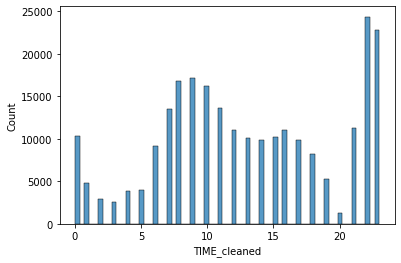

In [ ]:
sns.histplot(data = df_filtered, x = 'TIME_cleaned')
plt.show()

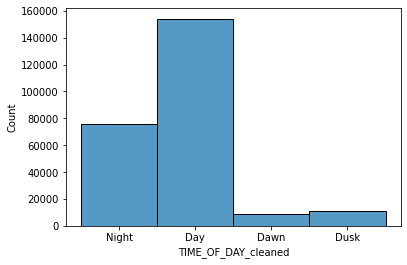

In [ ]:
sns.histplot(data = df_filtered, x = 'TIME_OF_DAY_cleaned')
plt.show()

In [ ]:
df_filtered.drop(columns = ['TIME', 'TIME_OF_DAY'], inplace = True)

In [ ]:
df_filtered.shape

(250116, 71)

### AIRPORT_ID , AIRPORT, LATITUDE AND LONGITUDE

In [ ]:
print('The number of missing values in', 'AIRPORT_ID', 'is', df['AIRPORT_ID'].isnull().sum())
print('')
print ('Then AIRPORT_ID with most accidents are: \n', df['AIRPORT_ID'].value_counts().iloc[0:9])
print('')
print('Airport corresponding to Airport_ID where most bird strikes take place is:')
print(df.loc[df['AIRPORT_ID'] == df['AIRPORT_ID'].value_counts().idxmax(), 'AIRPORT'].iloc[0])

The number of missing values in AIRPORT_ID is 2

Then AIRPORT_ID with most accidents are: 
 ZZZZ    30130
KDEN     8150
KDFW     7006
KORD     5498
KJFK     4509
KMEM     4248
KSMF     3309
KSLC     3298
KMCO     3083
Name: AIRPORT_ID, dtype: int64

Airport corresponding to Airport_ID where most bird strikes take place is:
UNKNOWN


As it can be seen above, although the number of missing values in AIRPORT_ID is 2, there are 30130 AIRPORT_ID values with the label ZZZZ, which corresponds to AIRPORT value UNKNOWN. It would be interesting to investigate if the airport is unknown because either the accicent did not took place in the airport or the airport where it took place is very small aerodrome (general aviation aerodrome).

In order to see if it is indicated UNKNOWN because the bird strike did not occur in the airport, the relation between the UNKNOWN airports and the flight phase is analyzed:



In [ ]:
print('The phase of flight of UNKNOWN airports is (in percentage):')
print(df.loc[df['AIRPORT'] == 'UNKNOWN', 'PHASE_OF_FLIGHT'].value_counts(normalize=True))
print('Number of PHASE_OF_FLIGHT missing values for UNKNOWN airport is:', df.loc[df['AIRPORT'] == 'UNKNOWN', 'PHASE_OF_FLIGHT'].isnull().sum())

The phase of flight of UNKNOWN airports is (in percentage):
En Route        0.895356
Approach        0.042783
Climb           0.023897
Take-off Run    0.016381
Landing Roll    0.013105
Descent         0.004625
Local           0.001542
Departure       0.000964
Taxi            0.000964
Arrival         0.000193
Parked          0.000193
Name: PHASE_OF_FLIGHT, dtype: float64
Number of PHASE_OF_FLIGHT missing values for UNKNOWN airport is: 24941


As it can be seen, most of available data for UNKNOWN airport shows that almost 90% of flight phases correspond to En Route, therefore, this UNKNOWN values will be replaced by OFF THE AIRPORT.

In [ ]:
df_filtered['AIRPORT'].replace('UNKNOWN', 'OFF THE AIRPORT', inplace = True)
df_filtered['AIRPORT_ID'].replace('ZZZZ', 'OFF THE AIRPORT', inplace = True)

We check if there are more missing values in AIRPORT_ID

In [ ]:
df[df['AIRPORT_ID'].isnull()].filter(['AIRPORT', 'AIRPORT_ID'])

,AIRPORT,AIRPORT_ID
246680,UNKNOWN/REMOTE,NaN
247638,JOHN GLENN COLUMBUS INTL ARPT - OH,NaN


AIRPORT values for the JOHN GLENN COLUMBUS airport are duplicated, as the values JOHN GLENN COLUMBUS INTL ARPT - OH and JOHN GLENN COLUMBUS INTL ARPT refer to the same airport. Therefore, the values JOHN GLENN COLUMBUS INTL ARPT - OH are replaced by JOHN GLENN COLUMBUS INTL ARPT. Additionally, AIRPORT_ID values where AIRPORT == JOHN GLENN COLUMBUS INTL are replaced by KCMH, with is its identification code for the airport. 

In [ ]:
#df_filtered['AIRPORT_ID'].replace('UNKNOWN/REMOTE', 'OFF THE AIRPORT', inplace = True)
#df_filtered['AIRPORT_ID'].replace(df.loc[247638, 'AIRPORT_ID'], 'KCMH', inplace = True )
df_filtered['AIRPORT'].replace('JOHN GLENN COLUMBUS INTL ARPT - OH', 'JOHN GLENN COLUMBUS INTL ARPT', inplace = True)

In [ ]:
for i in df_filtered.loc[df_filtered['AIRPORT'] == 'JOHN GLENN COLUMBUS INTL ARPT'].index.tolist():
  #df_filtered['AIRPORT_ID'].replace(df_filtered.loc[i, 'AIRPORT_ID'], 'KCMH', inplace = True)
  df_filtered.loc[i, 'AIRPORT_ID'] = 'KCMH'

As it can be seen, most of the AIRPORT_ID are OFF THE AIRPORT, therefore, the values corresponding to AIRPORT = UNKNOWN/REMOTE will be replaced by OFF THE AIRPORT both in the AIRPORT_ID and the AIRPORT features 

In [ ]:
df_filtered['AIRPORT'].value_counts(normalize = True).iloc[0:10]

OFF THE AIRPORT                    0.120464
DENVER INTL AIRPORT                0.032585
DALLAS/FORT WORTH INTL ARPT        0.028011
CHICAGO O'HARE INTL ARPT           0.021982
JOHN F KENNEDY INTL                0.018028
MEMPHIS INTL                       0.016984
SACRAMENTO INTL                    0.013230
SALT LAKE CITY INTL                0.013186
ORLANDO INTL                       0.012326
DETROIT METRO WAYNE COUNTY ARPT    0.012110
Name: AIRPORT, dtype: float64

In [ ]:
df_filtered.loc[df_filtered['AIRPORT'] == 'UNKNOWN/REMOTE']

,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,OPID,OPERATOR,AIRCRAFT,AC_CLASS,TYPE_ENG,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,COST_REPAIRS,INGESTED,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,BIRD_BAND_NUMBER,SPECIES,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,INCIDENT_DATE_cleaned,INCIDENT_MONTH_cleaned,INCIDENT_YEAR_cleaned,TIME_cleaned,TIME_OF_DAY_cleaned,HOUR_cleaned
246680,NaN,UNKNOWN/REMOTE,NaN,NaN,NaN,NaN,ASA,ALASKA AIRLINES,B-737-900,A,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN,NaN,New World wood-warblers,Unknown,NaN,1,Small,NaN,NaN,NaN,2021-05-30,5,2021,9,Day,9


In [ ]:
df_filtered.loc[246680, 'AIRPORT_ID'] = 'OFF THE AIRPORT'
df_filtered.loc[246680, 'AIRPORT'] = 'OFF THE AIRPORT'

In [ ]:
df_AIRPORT_ID = pd.DataFrame(data = {'AIRPORT_ID_SINGLE_VALUES':
                                     remove_duplicates(df_filtered['AIRPORT_ID'])}).sort_values(by = ['AIRPORT_ID_SINGLE_VALUES'],
                                                                                                ascending = True ).reset_index(drop = True)
df_AIRPORT_ID

,AIRPORT_ID_SINGLE_VALUES
0,00C
1,00M
2,00OI
3,01G
4,02C
...,...
2465,ZHCC
2466,ZSPD
2467,ZSQD
2468,ZSTX


In [ ]:
df_AIRPORT = pd.DataFrame(data = {'AIRPORT_SINGLE_VALUES':
                                  remove_duplicates(df_filtered['AIRPORT'])}).sort_values(by = ['AIRPORT_SINGLE_VALUES']
                                                                                          , ascending = True ).reset_index(drop = True)
df_AIRPORT

,AIRPORT_SINGLE_VALUES
0,ABEL SANTAMARIA ARPT
1,ABERDEEN REGIONAL ARPT
2,ABERNATHY FIELD ARPT
3,ABILENE REGIONAL ARPT
4,ABRAHAM LINCOLN CAPITAL ARPT
...,...
2465,ZARAGOZA
2466,ZELIENOPLE MUNICIPAL
2467,ZEPHYRHILLS MUNICIPAL ARPT
2468,ZHENGZHOU XINZHENG ARPT


In [ ]:
print('The number of unique values for AIRPORT_ID is:', df_AIRPORT_ID.shape[0])
print('The number of unique values for AIRPORT is:', df_AIRPORT.shape[0])

The number of unique values for AIRPORT_ID is: 2470
The number of unique values for AIRPORT is: 2470


In [ ]:
print('The number of missing / UNKNOWN values for AIRPORT_ID is:', df_filtered['AIRPORT_ID'].isnull().sum(), '/', df_filtered['AIRPORT_ID'].str.contains('UNKNOWN').sum())
print('The number of missing / UNKNOWN values for AIRPORT is:', df_filtered['AIRPORT'].isnull().sum(), '/', df_filtered[df_filtered['AIRPORT'] == 'UNKNOWN'].any().sum())

The number of missing / UNKNOWN values for AIRPORT_ID is: 0 / 0
The number of missing / UNKNOWN values for AIRPORT is: 0 / 0


Once both AIRPORT_ID and AIRPORT are cleaned, the suffix _cleaned is added to the column name:

In [ ]:
df_filtered.rename(columns = {'AIRPORT': 'AIRPORT_cleaned','AIRPORT_ID':'AIRPORT_ID_cleaned'}, inplace = True)

The number of missing values for laitude and longitude is analyzed:

In [ ]:
print('The number of missing values for LATITUDE is:', df_filtered['LATITUDE'].isna().sum())
print('The number of missing values for LONGITUDE is:', df_filtered['LONGITUDE'].isna().sum())

The number of missing values for LATITUDE is: 30209
The number of missing values for LONGITUDE is: 30209


In [ ]:
#AIRPORTS for which LATITUDE is NaN are studied
df_filtered.loc[df_filtered['LATITUDE'].isna(), 'AIRPORT_cleaned'].value_counts()

OFF THE AIRPORT                  30131
OIL RIG                             52
PRIVATE AIR STRIP                   18
REMOTE_WATER                         7
JOHN GLENN COLUMBUS INTL ARPT        1
Name: AIRPORT_cleaned, dtype: int64

From values shown above, the only value which can be replaced by a known latitude and longitude is JOHN GLENN COLUMBUS INTL ARPT. This value will be replaced by the most repeated value of longitude an latitude for this airport.

In [ ]:
#Index of the value which is wanted to be replaced:
df_filtered.loc[(df_filtered['AIRPORT_cleaned'] == 'JOHN GLENN COLUMBUS INTL ARPT') & df_filtered['LATITUDE'].isna(), 'LATITUDE']

247638   NaN
Name: LATITUDE, dtype: float64

In [ ]:
print('Most frequent value of LATITUDE for JOHN GLENN COLUMBUS INTL ARPT is:', df_filtered.loc[df_filtered['AIRPORT_cleaned'] == 'JOHN GLENN COLUMBUS INTL ARPT', 'LATITUDE'].value_counts().idxmax())
print('Most frequent value of LONGITUDE for JOHN GLENN COLUMBUS INTL ARPT is:', df_filtered.loc[df_filtered['AIRPORT_cleaned'] == 'JOHN GLENN COLUMBUS INTL ARPT', 'LONGITUDE'].value_counts().idxmax())

Most frequent value of LATITUDE for JOHN GLENN COLUMBUS INTL ARPT is: 39.9969472
Most frequent value of LONGITUDE for JOHN GLENN COLUMBUS INTL ARPT is: -82.8921611


In [ ]:
#NaN values for this airport are replaced by those most repeated
df_filtered.loc[(df_filtered['AIRPORT_cleaned'] == 'JOHN GLENN COLUMBUS INTL ARPT') & df_filtered['LATITUDE'].isna(), 'LATITUDE'] = df_filtered.loc[df_filtered['AIRPORT_cleaned'] == 'JOHN GLENN COLUMBUS INTL ARPT', 'LATITUDE'].value_counts().idxmax()
df_filtered.loc[(df_filtered['AIRPORT_cleaned'] == 'JOHN GLENN COLUMBUS INTL ARPT') & df_filtered['LONGITUDE'].isna(), 'LONGITUDE'] = df_filtered.loc[df_filtered['AIRPORT_cleaned'] == 'JOHN GLENN COLUMBUS INTL ARPT', 'LONGITUDE'].value_counts().idxmax()

In [ ]:
print('AIRPORTS for which LONGITUDE is NaN are: \n', df_filtered.loc[df_filtered['LONGITUDE'].isna(), 'AIRPORT_cleaned'].value_counts())

AIRPORTS for which LONGITUDE is NaN are: 
 OFF THE AIRPORT      30131
OIL RIG                 52
PRIVATE AIR STRIP       18
REMOTE_WATER             7
Name: AIRPORT_cleaned, dtype: int64


In [ ]:
print('AIRPORTS for which LATITUDE is NaN are:', df_filtered.loc[df_filtered['LATITUDE'].isna(), 'AIRPORT_cleaned'].isnull().sum())
print('AIRPORTS for which LONGITUDE is NaN are:', df_filtered.loc[df_filtered['LONGITUDE'].isna(), 'AIRPORT_cleaned'].isnull().sum())

AIRPORTS for which LATITUDE is NaN are: 0
AIRPORTS for which LONGITUDE is NaN are: 0


In [ ]:
df_filtered.rename(columns = {'LATITUDE': 'LATITUDE_cleaned','LONGITUDE':'LONGITUDE_cleaned'}, inplace = True)

In [ ]:
df_filtered.shape

(250116, 71)

### RUNWAY

In [ ]:
df_filtered.filter(['AIRPORT_ID_cleaned', 'AIRPORT_cleaned', 'LATITUDE_cleaned', 'LONGITUDE_cleaned', 'RUNWAY']).head(10)

,AIRPORT_ID_cleaned,AIRPORT_cleaned,LATITUDE_cleaned,LONGITUDE_cleaned,RUNWAY
0,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.24235,-85.39586,NaN
1,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,1
2,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,22R
3,KMHT,MANCHESTER AIRPORT,42.93452,-71.43706,35
4,KELP,EL PASO INTL ARPT,31.80667,-106.37781,26L
5,KPDX,PORTLAND INTL (OR),45.58872,-122.59750,NaN
6,OFF THE AIRPORT,OFF THE AIRPORT,NaN,NaN,NaN
7,KLAX,LOS ANGELES INTL,33.94254,-118.40807,24R
8,KSAT,SAN ANTONIO INTL,29.53369,-98.46978,NaN
9,KSAT,SAN ANTONIO INTL,29.53369,-98.46978,NaN


In [ ]:
df_filtered['RUNWAY'].isnull().sum()

60805

In [ ]:
 df_filtered['RUNWAY_cleaned'] = df_filtered['RUNWAY']
 #For each airport, RUNWAY NaN values are replaced by the most common one, in case the mode is NaN because there is no value for the mode, it is replace by unknown:
 df_filtered.loc[df_filtered['RUNWAY'].isna(), 'RUNWAY_cleaned'] = df_filtered.groupby(by = 'AIRPORT_cleaned')['RUNWAY'].transform(lambda x: x.mode()[0] if any(x.mode()) else 'UNKNOWN')

In [ ]:
df_filtered.filter(['AIRPORT_ID_cleaned', 'AIRPORT_cleaned', 'LATITUDE_cleaned', 'LONGITUDE_cleaned', 'RUNWAY', 'RUNWAY_cleaned']).head(10)

,AIRPORT_ID_cleaned,AIRPORT_cleaned,LATITUDE_cleaned,LONGITUDE_cleaned,RUNWAY,RUNWAY_cleaned
0,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.24235,-85.39586,NaN,32
1,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,1,1
2,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,22R,22R
3,KMHT,MANCHESTER AIRPORT,42.93452,-71.43706,35,35
4,KELP,EL PASO INTL ARPT,31.80667,-106.37781,26L,26L
5,KPDX,PORTLAND INTL (OR),45.58872,-122.59750,NaN,28L
6,OFF THE AIRPORT,OFF THE AIRPORT,NaN,NaN,NaN,6
7,KLAX,LOS ANGELES INTL,33.94254,-118.40807,24R,24R
8,KSAT,SAN ANTONIO INTL,29.53369,-98.46978,NaN,12R
9,KSAT,SAN ANTONIO INTL,29.53369,-98.46978,NaN,12R


### STATE

The number of missing values for state is checked

In [ ]:
print('The number of missing values for STATE is:', df_filtered['STATE'].isnull().sum())

The number of missing values for STATE is: 30209


In [ ]:
df_filtered.loc[df_filtered['STATE'].isna(), 'AIRPORT_cleaned'].value_counts()

OFF THE AIRPORT                  30131
OIL RIG                             52
PRIVATE AIR STRIP                   18
REMOTE_WATER                         7
JOHN GLENN COLUMBUS INTL ARPT        1
Name: AIRPORT_cleaned, dtype: int64

In [ ]:
df_filtered.loc[df_filtered['AIRPORT_cleaned'] == 'JOHN GLENN COLUMBUS INTL ARPT'].head(1)

,AIRPORT_ID_cleaned,AIRPORT_cleaned,LATITUDE_cleaned,LONGITUDE_cleaned,RUNWAY,STATE,OPID,OPERATOR,AIRCRAFT,AC_CLASS,TYPE_ENG,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,COST_REPAIRS,INGESTED,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,BIRD_BAND_NUMBER,SPECIES,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,INCIDENT_DATE_cleaned,INCIDENT_MONTH_cleaned,INCIDENT_YEAR_cleaned,TIME_cleaned,TIME_OF_DAY_cleaned,HOUR_cleaned,RUNWAY_cleaned
42,KCMH,JOHN GLENN COLUMBUS INTL ARPT,39.996947,-82.892161,28L,OH,1AWE,AMERICA WEST AIRLINES,A-320,A,D,Approach,200.0,120.0,NaN,Overcast,None,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,None,NaN,NaN,Unknown bird - small,Yes,NaN,2-10,Small,NaN,NaN,NaN,1992-11-29,11,1992,17,Day,17,28L


In [ ]:
df_filtered['STATE_cleaned'] = df_filtered['STATE']

In [ ]:
#Index of the value which is wanted to be replaced:
df_filtered.loc[(df_filtered['AIRPORT_cleaned'] == 'JOHN GLENN COLUMBUS INTL ARPT') & df_filtered['STATE'].isna(), 'STATE']

247638    NaN
Name: STATE, dtype: object

In [ ]:
df_filtered.loc[247638, 'STATE_cleaned'] = 'OH'

In [ ]:
df_filtered.loc[df_filtered['STATE_cleaned'].isna(), 'AIRPORT_cleaned'].value_counts()

OFF THE AIRPORT      30131
OIL RIG                 52
PRIVATE AIR STRIP       18
REMOTE_WATER             7
Name: AIRPORT_cleaned, dtype: int64

In [ ]:
#NaN values for LATITUDE and LONGITUDE matching AIRPORTS shown above are replaced by UNKNOWN
df_filtered.loc[df_filtered['STATE_cleaned'].isna(), 'STATE_cleaned'] = 'UNKNOWN'

In [ ]:
usa = gpd.read_file('/content/gdrive/MyDrive/TFM/Otros/dataset_FAA/USA_map/states.shp')
usa


,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
5,South Dakota,6,46,West North Central,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."
6,Wyoming,7,56,Mountain,WY,"POLYGON ((-104.05362 41.69822, -104.05550 41.5..."
7,Wisconsin,8,55,East North Central,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ..."
8,Idaho,9,16,Mountain,ID,"POLYGON ((-117.02630 43.67903, -117.02379 43.7..."
9,Vermont,10,50,New England,VT,"POLYGON ((-73.25806 42.74606, -73.26928 42.747..."


In [ ]:
def state_plotter(states, gdf, us_map = False):
  fig, ax = plt.subplots(figsize = (30,30))
  if us_map:
    if 'HI' in states:
      usa[0:50].plot(ax=ax, alpha = 0.3, color = 'white')
    elif 'AK' in states:
      usa[1:51].plot(ax=ax, alpha = 0.3, color = 'white')
    elif 'AK' and 'HI' in states:
      usa[0:51].plot(ax=ax, aplha=0.3, color = 'white')
    else:
      usa[1:50].plot(ax=ax, alpha = 0.3, color = 'white')

    for n in states:
      usa[usa.STATE_ABBR == f'{n}'].plot(ax=ax, color = 'white', edgecolor = 'black', linewidth = 2)
  elif us_map == False:
    for n in states:
      usa[usa.STATE_ABBR == f'{n}'].plot(ax=ax, color = 'white', edgecolor = 'black', linewidth = 2)
  #gdf.plot(ax=ax, color = 'red')

In [ ]:
#us_states = ['HI','WA', 'MT', 'ME', 'ND', 'SD', 'WY', 'WI', 'ID', 'VT', 'MN', 'OR', 'NH', 'IA', 'MA', 'NE', 'NY', 'PA', 'CT', 'RI', 'NJ', 'IN', 'NV', 'UT', 'CA', 'OH', 'IL', 'DC', 'DE',
#             'WV', 'MD', 'CO', 'KY', 'KS', 'VA', 'MO', 'AZ', 'OK', 'NC', 'TN', 'TX', 'NM', 'AL', 'MS', 'GA', 'SC', 'AR', 'LA', 'FL', 'MI', 'AK']
us_states = ['WA', 'MT', 'ME', 'ND', 'SD', 'WY', 'WI', 'ID', 'VT', 'MN', 'OR', 'NH', 'IA', 'MA', 'NE', 'NY', 'PA', 'CT', 'RI', 'NJ', 'IN', 'NV', 'UT', 'CA', 'OH', 'IL', 'DC', 'DE',
             'WV', 'MD', 'CO', 'KY', 'KS', 'VA', 'MO', 'AZ', 'OK', 'NC', 'TN', 'TX', 'NM', 'AL', 'MS', 'GA', 'SC', 'AR', 'LA', 'FL', 'MI']

In [ ]:
df_filtered.filter(['AIRPORT_ID_cleaned', 'AIRPORT_cleaned', 'LATITUDE_cleaned', 'LONGITUDE_cleaned', 'RUNWAY', 'RUNWAY_cleaned', 'STATE']).head(10)

,AIRPORT_ID_cleaned,AIRPORT_cleaned,LATITUDE_cleaned,LONGITUDE_cleaned,RUNWAY,RUNWAY_cleaned,STATE
0,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.24235,-85.39586,NaN,32,IN
1,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,1,1,LA
2,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,22R,22R,IL
3,KMHT,MANCHESTER AIRPORT,42.93452,-71.43706,35,35,NH
4,KELP,EL PASO INTL ARPT,31.80667,-106.37781,26L,26L,TX
5,KPDX,PORTLAND INTL (OR),45.58872,-122.59750,NaN,28L,OR
6,OFF THE AIRPORT,OFF THE AIRPORT,NaN,NaN,NaN,6,NaN
7,KLAX,LOS ANGELES INTL,33.94254,-118.40807,24R,24R,CA
8,KSAT,SAN ANTONIO INTL,29.53369,-98.46978,NaN,12R,TX
9,KSAT,SAN ANTONIO INTL,29.53369,-98.46978,NaN,12R,TX


In [ ]:
gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(df_filtered['LONGITUDE_cleaned'].replace('UNKNOWN', np.nan).dropna(inplace = False), 
                                                         df_filtered['LATITUDE_cleaned'].replace('UNKNOWN', np.nan).dropna(inplace = False)))
gdf.head()

,geometry
0,POINT (-85.39586 40.24235)
1,POINT (-90.25803 29.99339)
2,POINT (-87.90446 41.97960)
3,POINT (-71.43706 42.93452)
4,POINT (-106.37781 31.80667)


In [ ]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
df_filtered.drop(columns = ['STATE'], inplace = True)

In [ ]:
df_filtered.shape

(250116, 72)

###AIRCRAFT AND AC_CLASS

AC_CLASS in FAA database is codified as follows:
* A - Airplane
* B - Helicopter
* C - Glider
* D - Balloon
* F - Dirigible
* I - Gyroplane
* J - Ultralight
* Y - Other
* Z - Unknown

In order to make the analisys clearer, this codification will be removed for the moment.


In [ ]:
AC_CLASS_codification = {'A': 'Airplane', 'B': 'Helicopter', 'C': 'Glider', 'D': 'Balloon', 'F': 'Dirigible',
                         'I': 'Gyroplane', 'J': 'Ultralight', 'Y': 'Other', 'Z': 'Unknown'}



In [ ]:
df_filtered['AC_CLASS'].replace(AC_CLASS_codification, inplace = True)
df_filtered.head()

,AIRPORT_ID_cleaned,AIRPORT_cleaned,LATITUDE_cleaned,LONGITUDE_cleaned,RUNWAY,OPID,OPERATOR,AIRCRAFT,AC_CLASS,TYPE_ENG,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,COST_REPAIRS,INGESTED,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,BIRD_BAND_NUMBER,SPECIES,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,INCIDENT_DATE_cleaned,INCIDENT_MONTH_cleaned,INCIDENT_YEAR_cleaned,TIME_cleaned,TIME_OF_DAY_cleaned,HOUR_cleaned,RUNWAY_cleaned,STATE_cleaned
0,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.24235,-85.39586,NaN,PVT,PRIVATELY OWNED,C-172,Airplane,A,Approach,200.0,70.0,NaN,No Cloud,None,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN,NaN,Unknown bird - small,No,1,1,Small,NaN,NaN,NaN,1990-10-15,10,1990,23,Night,23,32,IN
1,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,1,TWA,TRANS WORLD AIRLINES,B-727,Airplane,D,Landing Roll,0.0,NaN,0.0,NaN,NaN,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,None,NaN,NaN,Unknown bird - medium,Unknown,NaN,1,Medium,NaN,NaN,NaN,1993-01-08,1,1993,7,Day,7,1,LA
2,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,22R,UAL,UNITED AIRLINES,B-757-200,Airplane,D,Landing Roll,0.0,NaN,0.0,NaN,NaN,NaN,FALSO,FALSO,N,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN,NaN,Blackbirds,Unknown,NaN,1,Small,NaN,NaN,NaN,1996-08-18,8,1996,22,Night,22,22R,IL
3,KMHT,MANCHESTER AIRPORT,42.93452,-71.43706,35,PVT,PRIVATELY OWNED,BE-33,Airplane,A,Approach,1800.0,150.0,8.0,No Cloud,None,NaN,FALSO,VERDADERO,S,FALSO,FALSO,VERDADERO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,Precautionary Landing,NaN,NaN,Unknown bird - large,No,2-10,1,Large,NaN,NaN,NaN,1993-09-19,9,1993,14,Day,14,35,NH
4,KELP,EL PASO INTL ARPT,31.80667,-106.37781,26L,AAL,AMERICAN AIRLINES,B-727,Airplane,D,Approach,200.0,135.0,NaN,No Cloud,None,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,None,NaN,NaN,Unknown bird - small,No,NaN,1,Small,NaN,NaN,NaN,1991-03-23,3,1991,22,Night,22,26L,TX


In [ ]:
print('The total number of missing values for AIRCRAFT is:', df_filtered['AIRCRAFT'].isnull().sum())

The total number of missing values for AIRCRAFT is: 0


The total number of missing values for AC_CLASS is: 68292


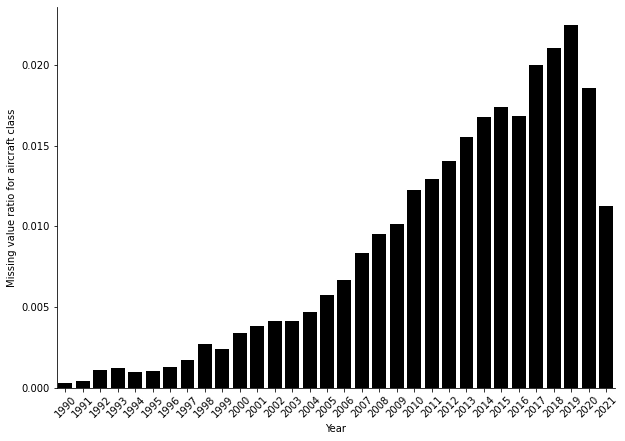

<Figure size 432x288 with 0 Axes>

In [ ]:
print('The total number of missing values for AC_CLASS is:', df_filtered['AC_CLASS'].isnull().sum())

year_list = df_filtered.isnull().groupby(df_filtered['INCIDENT_YEAR_cleaned'])['AC_CLASS'].sum().index
na_AC_CLASS = (df_filtered.isnull().groupby(df_filtered['INCIDENT_YEAR_cleaned'])['AC_CLASS'].sum().values)/df_filtered.shape[0]
plt.figure(figsize = (10, 7))
sns.barplot(x = year_list, y = na_AC_CLASS, color = 'black')
plt.ylabel('Missing value ratio for aircraft class')
plt.xlabel('Year')
sns.despine()
plt.xticks(rotation = 45)
plt.show()
plt.savefig('/content/gdrive/MyDrive/TFM/Missing_values_AC_CLASS_and_AICRAFT.eps', bbox_inches="tight", format='eps')

As it can be seen in the plot above, there is an important number of missing values for the aircraft type. However, this missing values can be filled using the column of AIRCRAFT, as there is no missing value for this feature. A dictionary will be created based on the AIRCRAFT column in order to fill the NaN values in the 'AC_CLASS' column

In [ ]:
df_AIRCRAFT_TYPE = pd.DataFrame({'AIRCRAFT_TYPE':remove_duplicates(df_filtered['AIRCRAFT'].values.tolist())}).sort_values(by=['AIRCRAFT_TYPE'], ascending=True).reset_index(drop=True)
df_AIRCRAFT_TYPE.head(7)

,AIRCRAFT_TYPE
0,----
1,737-800
2,A 320
3,A-220
4,A-300
5,A-310
6,A-318


In order to make a quick database with all the AIRCRAFT TYPES and its matching AC_CLASS, the list of AIRCRAFT single values will be exported to an Excel datasheet

In [ ]:
#to_excel_sheet(filename, sheetname, dataframe)
to_excel_sheet('AIRCRAFT_TYPES_python_export', 'single_values', df_AIRCRAFT_TYPE)

Once we have a cleaned aircrat type and aicraft model library, we import it to a dataframe in order to merge it with the df_filtered dataframe.

In [ ]:
df_AIRCRAFT_TYPE_cleaned = pd.read_csv('/content/gdrive/MyDrive/TFM/AIRCRAFT_TYPES_cleaned_07112021.csv', delimiter = ';', encoding='latin-1')
df_AIRCRAFT_TYPE_cleaned.drop(df_AIRCRAFT_TYPE_cleaned.filter(regex='Unnamed').columns, axis=1, inplace=True)
df_AIRCRAFT_TYPE_cleaned.drop(columns='INDEX', axis=1, inplace=True)
#df_AIRCRAFT_TYPE_cleaned = df_AIRCRAFT_TYPE_cleaned.filter(['AIRCRAFT_TYPE', 'AC_CLASS', 'AIRCRAFT_TYPE_normalized']).rename(columns = {'AC_CLASS':'AC_CLASS_cleaned_with_unk', 
#                                                                                                                                        'AIRCRAFT_TYPE_normalized': 'AIRCRAFT_cleaned_with_unk',
#                                                                                                                                        'AIRCRAFT_TYPE': 'AIRCRAFT'})
df_AIRCRAFT_TYPE_cleaned.head()

,AIRCRAFT_TYPE,AC_CLASS_norm_with_unknown,AIRCRAFT_TYPE_norm_with_unknown,Comment AIRCRAFT_TYPE_norm
0,----,UNKNOWN,UNKNOWN,NaN
1,737-800,Airplane,B-737,NaN
2,A 320,Airplane,A-320,NaN
3,A-220,Airplane,A-220,NaN
4,A-300,Airplane,A-300,NaN


Once the cleaned dataframe is imported, we are going to use it as guide to replace the old df_filtered formats by the new ones (similar to used index match in Excel):

In [ ]:
df_filtered = df_filtered.merge(df_AIRCRAFT_TYPE_cleaned[['AIRCRAFT_TYPE','AIRCRAFT_TYPE_norm_with_unknown']],
                                how = 'left', left_on = 'AIRCRAFT', right_on='AIRCRAFT_TYPE')
#df_filtered.rename(columns={'AIRCRAFT_TYPE_norm_with_unknown':'AIRCRAFT_cleaned'}, inplace=True)
df_filtered[['AIRCRAFT', 'AIRCRAFT_TYPE_norm_with_unknown']].head(10)

,AIRCRAFT,AIRCRAFT_TYPE_norm_with_unknown
0,C-172,CESSNA 172
1,B-727,B-727
2,B-757-200,B-757
3,BE-33,BE-33
4,B-727,B-727
5,MD-80,MD-80
6,DC-9-30,DC-9
7,B-737-500,B-737
8,B-737-200,B-737
9,MD-83,MD-83


Before filling the fill the Unknown values, the percentage of the different aircrafts involved in bird strikes is shown.

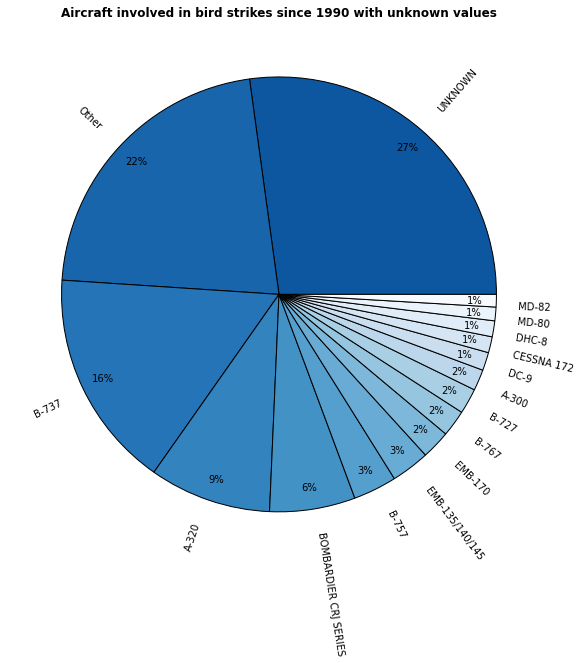

,AIRCRAFT type,AIRCRAFT number (units),AIRCRAFT number (percentage)
0,UNKNOWN,67948,0.271666
1,Other,54498,0.217891
2,B-737,40739,0.162880
3,A-320,22671,0.090642
4,BOMBARDIER CRJ SERIES,15917,0.063638
5,B-757,8088,0.032337
6,EMB-135/140/145,7155,0.028607
7,EMB-170,5360,0.021430
8,B-767,4928,0.019703
9,B-727,4733,0.018923


In [ ]:
#number of aircraft to be shown, the rest will be accumulated as 'Other'
number = 15
cummulated_percentage = df_filtered['AIRCRAFT_TYPE_norm_with_unknown'].value_counts(normalize=True).iloc[0:number].sum()
other_values = 1 - cummulated_percentage
other_values_units =  df_filtered['AIRCRAFT_TYPE_norm_with_unknown'].value_counts().sum() - df_filtered['AIRCRAFT_TYPE_norm_with_unknown'].value_counts().iloc[0:number].sum()
labels_to_plot = df_filtered['AIRCRAFT_TYPE_norm_with_unknown'].value_counts(normalize = True).iloc[0:number].index.tolist()
labels_to_plot.append('Other')
values_to_plot = df_filtered['AIRCRAFT_TYPE_norm_with_unknown'].value_counts(normalize = True).iloc[0:number].values
values_to_plot = np.append(values_to_plot, other_values)
aircraft_units = df_filtered['AIRCRAFT_TYPE_norm_with_unknown'].value_counts().iloc[0:number].values
aircraft_units = np.append(aircraft_units, other_values_units)
#Creation of a dataframe to make cleaner the pie chart
df_aircraft_plot_aux = pd.DataFrame({'AIRCRAFT type':labels_to_plot, 'AIRCRAFT number (units)':aircraft_units, 'AIRCRAFT number (percentage)':values_to_plot}).sort_values(by = ['AIRCRAFT number (percentage)'], ascending = False)
# Plot colors
colormap = plt.cm.Blues
number_of_slices = number+1
slice_colors = colormap(np.linspace(0.85, 0.0, number_of_slices))
#Plot of aircraft involved in indicents
plt.figure(figsize=(10, 10))
plt.pie(df_aircraft_plot_aux['AIRCRAFT number (percentage)'],
        labels = df_aircraft_plot_aux['AIRCRAFT type'],
        rotatelabels = 20,
        autopct='%1.0f%%',
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black" },
        pctdistance = 0.90, # change label position along the radius
        colors = slice_colors)
plt.title('Aircraft involved in bird strikes since 1990 with unknown values', fontweight = 'bold')
plt.show()
#Print plotted values
df_aircraft_plot_aux.head(number).reset_index(drop = True, inplace = False).iloc[0:number]




In [ ]:
aircraft_norm_with_unk = df_filtered.groupby(['AIRCRAFT_TYPE_norm_with_unknown'])['INCIDENT_YEAR_cleaned'].count().sort_values(ascending = False).index
number_aircraft_norm_with_unk = df_filtered.groupby(['AIRCRAFT_TYPE_norm_with_unknown'])['INCIDENT_YEAR_cleaned'].count().sort_values(ascending = False).values

In [ ]:
df_filtered['AIRCRAFT_TYPE_norm_with_unknown'].replace({'UNKNOWN': np.nan}, inplace=True)
grouped_AIRPORT_ID = df_filtered.groupby('AIRPORT_ID_cleaned')

The unknown values are replaced randomly based in the probability of appearance of each airplane.

In [ ]:
'''The following lines replace non-available data based in the frequency of occurrence of the rest of data for each
AIRPORT_ID. This hypothesis ensures there is no incompatibility between the aircraft assigned and the airport,
for example, it ensures that an aircraft which cannot take-off from an airport because of size and necessary
take-off run is not assigned to that airport.
In case there is no previous data to build a probability distribution (see else condition), global data is taken 
(with no filtering by AIRPORT_ID) to build the probability distribution'''
for i in list(grouped_AIRPORT_ID.groups.keys()):
 if len(grouped_AIRPORT_ID.get_group(i)['AIRCRAFT_TYPE_norm_with_unknown'].value_counts(normalize = True).index) > 0:
   index_NaN = grouped_AIRPORT_ID.get_group(i).loc[grouped_AIRPORT_ID.get_group(i)['AIRCRAFT_TYPE_norm_with_unknown'].isna(), 'AIRCRAFT_TYPE_norm_with_unknown'].index.tolist()
   distribution_prob = grouped_AIRPORT_ID.get_group(i)['AIRCRAFT_TYPE_norm_with_unknown'].value_counts(normalize = True)
   df_filtered.loc[index_NaN, 'AIRCRAFT_TYPE_norm_with_unknown'] = np.random.choice(distribution_prob.index,
                                                                                            p = distribution_prob.values, 
                                                                                            size = grouped_AIRPORT_ID.get_group(i)['AIRCRAFT_TYPE_norm_with_unknown'].isna().sum(), 
                                                                                            replace = True)
 else:
  index_NaN = grouped_AIRPORT_ID.get_group(i).loc[grouped_AIRPORT_ID.get_group(i)['AIRCRAFT_TYPE_norm_with_unknown'].isna(), 'AIRCRAFT_TYPE_norm_with_unknown'].index.tolist()
  distribution_prob = df_filtered['AIRCRAFT_TYPE_norm_with_unknown'].value_counts(normalize = True)
  df_filtered.loc[index_NaN, 'AIRCRAFT_TYPE_norm_with_unknown'] = np.random.choice(distribution_prob.index,
                                                                                            p = distribution_prob.values, 
                                                                                            size = grouped_AIRPORT_ID.get_group(i)['AIRCRAFT_TYPE_norm_with_unknown'].isna().sum(), 
                                                                                            replace = True)

In [ ]:
#Once the operation is performed, the column name is changed adding the suffix _cleaned
df_filtered.rename(columns={'AIRCRAFT_TYPE_norm_with_unknown': 'AIRCRAFT_cleaned'}, inplace=True)
print('The number of missing data for AIRCRAFT_cleaned is', df_filtered['AIRCRAFT_cleaned'].isnull().sum())

The number of missing data for AIRCRAFT_cleaned is 0


In [ ]:
aircraft_norm_without_unk = df_filtered.groupby(['AIRCRAFT_cleaned'])['INCIDENT_YEAR_cleaned'].count().sort_values(ascending = False).index
number_aircraft_norm_without_unk = df_filtered.groupby(['AIRCRAFT_cleaned'])['INCIDENT_YEAR_cleaned'].count().sort_values(ascending = False).values

df_without_hypothesis = pd.DataFrame({'aircraft': aircraft_norm_with_unk, 'number':number_aircraft_norm_with_unk, 'hypothesis':np.zeros(len(number_aircraft_norm_with_unk))})
new_row = pd.Series(data={'aircraft':'UNKNOWN', 'number':0, 'hypothesis':1.0})
df_with_hypothesis = pd.DataFrame({'aircraft': aircraft_norm_without_unk, 'number':number_aircraft_norm_without_unk, 'hypothesis':np.ones(len(number_aircraft_norm_without_unk))}).append(new_row, ignore_index = True)
df_hypothesis = pd.concat([df_with_hypothesis, df_without_hypothesis]).reset_index(drop = True)

In [ ]:
order = df_hypothesis[df_hypothesis['hypothesis'] == 1.0].sort_values(by = 'number', ascending = False)['aircraft'].to_list()[0:9]
order.insert(0, 'UNKNOWN')

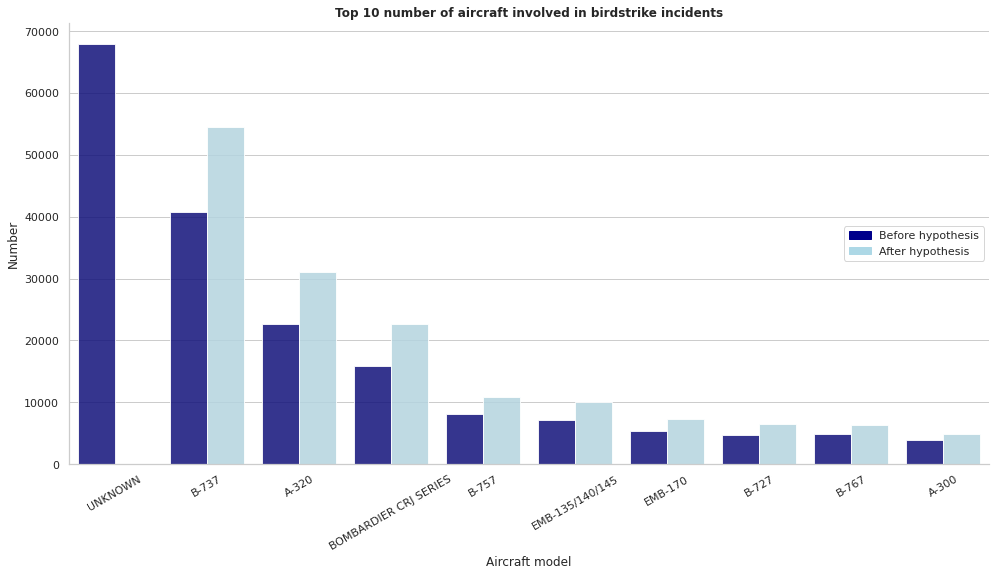

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.set_theme(style="whitegrid")
sns.catplot(data = df_hypothesis, x = 'aircraft',
            y = 'number',
            hue = 'hypothesis',
            kind = 'bar',
            height = 7,
            aspect = 2,
            palette = sns.color_palette(['darkblue', 'lightblue']),
            order = order,
            legend = False,
            alpha = 0.85)
top_bar = mpatches.Patch(color = 'darkblue', label = 'Before hypothesis')
bottom_bar = mpatches.Patch(color = 'lightblue', label = 'After hypothesis')
plt.legend(handles=[top_bar, bottom_bar], loc = 'center right')
plt.xlabel('Aircraft model')
plt.ylabel('Number')
plt.title('Top 10 number of aircraft involved in birdstrike incidents',  fontweight = 'bold')

plt.xticks(rotation = 30)
plt.show()
plt.savefig('/content/gdrive/MyDrive/TFM/comparison_hypothesis_aircraft_type.eps', bbox_inches="tight", format='eps')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


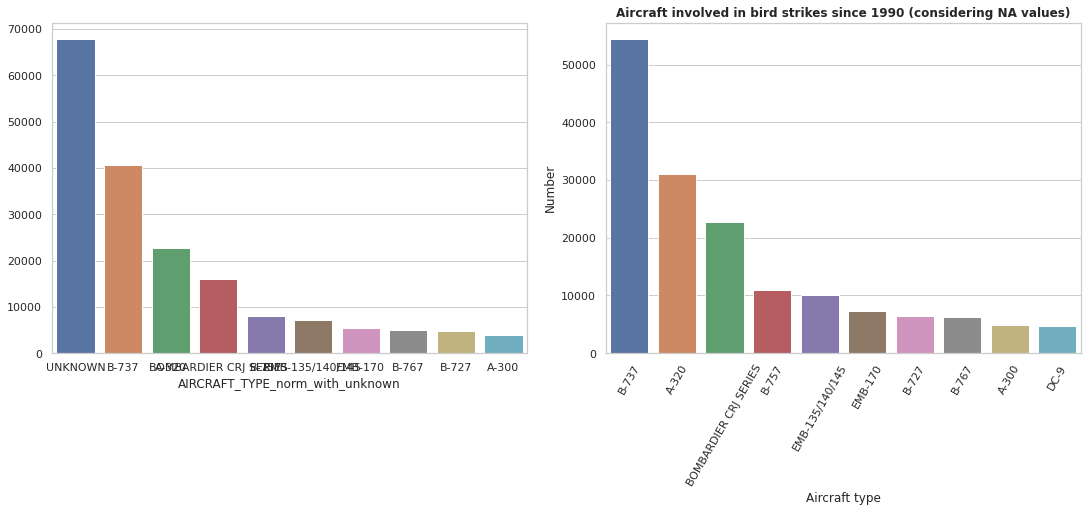

In [ ]:
fig2 = plt.figure(constrained_layout=True, figsize=(15,7))
spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])

sns.barplot(aircraft_norm_with_unk[0:10],
            number_aircraft_norm_with_unk[0:10],
            ax = f2_ax1)
sns.barplot(aircraft_norm_without_unk[0:10],
            number_aircraft_norm_without_unk[0:10],
            ax = f2_ax2)

plt.xticks(rotation = 60)
plt.xlabel('Aircraft type')
plt.ylabel('Number')
plt.title('Aircraft involved in bird strikes since 1990 (considering NA values)', fontweight = 'bold')
plt.show()

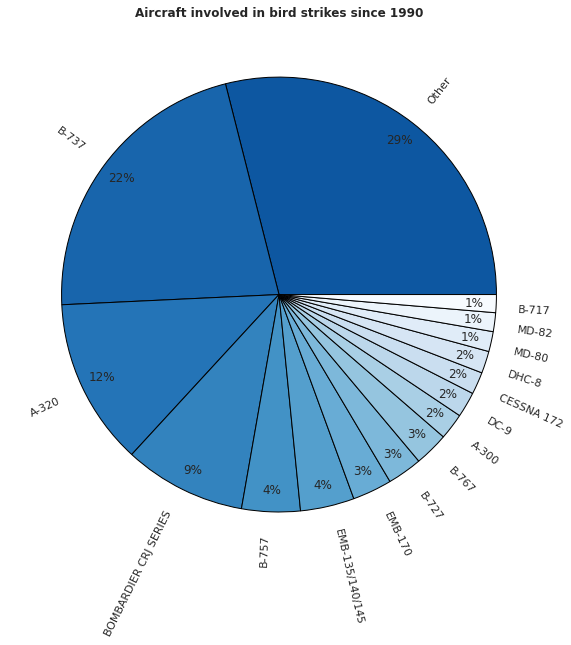

,AIRCRAFT type,AIRCRAFT number (units),AIRCRAFT number (percentage)
0,Other,72434,0.289602
1,B-737,54500,0.217899
2,A-320,31030,0.124062
3,BOMBARDIER CRJ SERIES,22709,0.090794
4,B-757,10869,0.043456
5,EMB-135/140/145,10034,0.040117
6,EMB-170,7342,0.029354
7,B-727,6467,0.025856
8,B-767,6331,0.025312
9,A-300,4895,0.019571


In [ ]:
#number of aircraft to be shown, the rest will be accumulated as 'Other'
number = 15
cummulated_percentage = df_filtered['AIRCRAFT_cleaned'].value_counts(normalize=True).iloc[0:number].sum()
other_values = 1 - cummulated_percentage
other_values_units =  df_filtered['AIRCRAFT_cleaned'].value_counts().sum() - df_filtered['AIRCRAFT_cleaned'].value_counts().iloc[0:number].sum()
labels_to_plot = df_filtered['AIRCRAFT_cleaned'].value_counts(normalize = True).iloc[0:number].index.tolist()
labels_to_plot.append('Other')
values_to_plot = df_filtered['AIRCRAFT_cleaned'].value_counts(normalize = True).iloc[0:number].values
values_to_plot = np.append(values_to_plot, other_values)
aircraft_units = df_filtered['AIRCRAFT_cleaned'].value_counts().iloc[0:number].values
aircraft_units = np.append(aircraft_units, other_values_units)
#Creation of a dataframe to make cleaner the pie chart
df_aircraft_plot_aux = pd.DataFrame({'AIRCRAFT type':labels_to_plot, 'AIRCRAFT number (units)':aircraft_units, 'AIRCRAFT number (percentage)':values_to_plot}).sort_values(by = ['AIRCRAFT number (percentage)'], ascending = False)
# Plot colors
colormap = plt.cm.Blues
number_of_slices = number+1
slice_colors = colormap(np.linspace(0.85, 0.0, number_of_slices))
#Plot of aircraft involved in indicents
plt.figure(figsize=(10, 10))
plt.pie(df_aircraft_plot_aux['AIRCRAFT number (percentage)'],
        labels = df_aircraft_plot_aux['AIRCRAFT type'],
        rotatelabels = 20,
        autopct='%1.0f%%',
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black" },
        pctdistance = 0.90, # change label position along the radius
        colors = slice_colors)
plt.title('Aircraft involved in bird strikes since 1990', fontweight = 'bold')
plt.show()
#Print plotted values
df_aircraft_plot_aux.head(number).reset_index(drop = True, inplace = False).iloc[0:number]

In the following lines, it is checked that there is no missing data for AIRCRAFT_cleaned:

In [ ]:
print('The number of missing values for AIRCRAFT_cleaned is:', df_filtered['AIRCRAFT_cleaned'].isnull().sum())

The number of missing values for AIRCRAFT_cleaned is: 0


In [ ]:
df_filtered.shape

(250116, 74)

Once the feature AIRCRAFT is cleaned, the values of this feature are merged  with the database previously used in order to obtain the corresponding AC_CLASS. Then, the column name is changed to AC_CLASS_cleaned. In order to avios problems in the merging process, it is necessary to create a dataframe with the unique values that AIRCRAFT_TYPE_norm_with_unknown can get. To do so, the function groupby is used.

In [ ]:
aircraft_grouped = df_AIRCRAFT_TYPE_cleaned.groupby('AIRCRAFT_TYPE_norm_with_unknown')
df_aircraft_unique = aircraft_grouped['AIRCRAFT_TYPE_norm_with_unknown', 'AC_CLASS_norm_with_unknown'].first().reset_index(drop = True)
df_aircraft_unique

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,AIRCRAFT_TYPE_norm_with_unknown,AC_CLASS_norm_with_unknown
0,A-220,Airplane
1,A-300,Airplane
2,A-310,Airplane
3,A-320,Airplane
4,A-330,Airplane
...,...,...
427,UNKNOWN,UNKNOWN
428,WACO F,Airplane
429,WEATHERLY 620,Airplane
430,ZIVKO EDGE 540,Airplane


In [ ]:
df_aircraft_unique

,AIRCRAFT_TYPE_norm_with_unknown,AC_CLASS_norm_with_unknown
0,A-220,Airplane
1,A-300,Airplane
2,A-310,Airplane
3,A-320,Airplane
4,A-330,Airplane
...,...,...
427,UNKNOWN,UNKNOWN
428,WACO F,Airplane
429,WEATHERLY 620,Airplane
430,ZIVKO EDGE 540,Airplane


In [ ]:
df_filtered = df_filtered.merge(df_aircraft_unique[['AIRCRAFT_TYPE_norm_with_unknown','AC_CLASS_norm_with_unknown']],
                                how = 'left', left_on = 'AIRCRAFT_cleaned', right_on='AIRCRAFT_TYPE_norm_with_unknown')
df_filtered.rename(columns={'AC_CLASS_norm_with_unknown':'AC_CLASS_cleaned'}, inplace=True)
df_filtered[['AIRCRAFT_cleaned', 'AC_CLASS_cleaned']].head()

,AIRCRAFT_cleaned,AC_CLASS_cleaned
0,CESSNA 172,Airplane
1,B-727,Airplane
2,B-757,Airplane
3,BE-33,Airplane
4,B-727,Airplane


The number of missing values or unknown values for AIRCRAFT_cleaned and AC_class is checked:

In [ ]:
print('The number of missing/unknown values for AIRCRAFT_cleaned is:', df_filtered['AIRCRAFT_cleaned'].isnull().sum(),'/', df_filtered['AIRCRAFT_cleaned'].str.contains('UNKNOWN').sum())
print('The number of missing/unknown values for AC_CLASS_cleaned is:', df_filtered['AC_CLASS_cleaned'].isnull().sum(),'/', df_filtered['AC_CLASS_cleaned'].str.contains('UNKNOWN').sum())

The number of missing/unknown values for AIRCRAFT_cleaned is: 0 / 0
The number of missing/unknown values for AC_CLASS_cleaned is: 0 / 0


In [ ]:
df_filtered.drop(columns = ['AIRCRAFT', 'AC_CLASS'], inplace = True)

In [ ]:
df_filtered.shape

(250116, 74)

### TYPE_ENG

AC_CLASS in FAA database is codified as follows:
* A - Piston
* B - Turbojet
* C - Turboprop
* D - Turbofan
* E - None (glider)
* F - Turboshaft
* Y - Other

In order to make the analisys clearer, this codification will be removed for the moment.


In [ ]:
TYPE_ENG_codification = {'A': 'Piston', 'B': 'Tubojet', 'C': 'Turboprop', 'D': 'Turbofan', 'E': 'None (glider)',
                         'F': 'Turboshaft', 'Y': 'Other'}
                         
df_filtered['TYPE_ENG'].replace(TYPE_ENG_codification, inplace = True)
df_filtered.head()

,AIRPORT_ID_cleaned,AIRPORT_cleaned,LATITUDE_cleaned,LONGITUDE_cleaned,RUNWAY,OPID,OPERATOR,TYPE_ENG,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,COST_REPAIRS,INGESTED,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,BIRD_BAND_NUMBER,SPECIES,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,INCIDENT_DATE_cleaned,INCIDENT_MONTH_cleaned,INCIDENT_YEAR_cleaned,TIME_cleaned,TIME_OF_DAY_cleaned,HOUR_cleaned,RUNWAY_cleaned,STATE_cleaned,AIRCRAFT_TYPE,AIRCRAFT_cleaned,AIRCRAFT_TYPE_norm_with_unknown,AC_CLASS_cleaned
0,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.24235,-85.39586,NaN,PVT,PRIVATELY OWNED,Piston,Approach,200.0,70.0,NaN,No Cloud,None,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN,NaN,Unknown bird - small,No,1,1,Small,NaN,NaN,NaN,1990-10-15,10,1990,23,Night,23,32,IN,C-172,CESSNA 172,CESSNA 172,Airplane
1,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,1,TWA,TRANS WORLD AIRLINES,Turbofan,Landing Roll,0.0,NaN,0.0,NaN,NaN,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,None,NaN,NaN,Unknown bird - medium,Unknown,NaN,1,Medium,NaN,NaN,NaN,1993-01-08,1,1993,7,Day,7,1,LA,B-727,B-727,B-727,Airplane
2,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,22R,UAL,UNITED AIRLINES,Turbofan,Landing Roll,0.0,NaN,0.0,NaN,NaN,NaN,FALSO,FALSO,N,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN,NaN,Blackbirds,Unknown,NaN,1,Small,NaN,NaN,NaN,1996-08-18,8,1996,22,Night,22,22R,IL,B-757-200,B-757,B-757,Airplane
3,KMHT,MANCHESTER AIRPORT,42.93452,-71.43706,35,PVT,PRIVATELY OWNED,Piston,Approach,1800.0,150.0,8.0,No Cloud,None,NaN,FALSO,VERDADERO,S,FALSO,FALSO,VERDADERO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,Precautionary Landing,NaN,NaN,Unknown bird - large,No,2-10,1,Large,NaN,NaN,NaN,1993-09-19,9,1993,14,Day,14,35,NH,BE-33,BE-33,BE-33,Airplane
4,KELP,EL PASO INTL ARPT,31.80667,-106.37781,26L,AAL,AMERICAN AIRLINES,Turbofan,Approach,200.0,135.0,NaN,No Cloud,None,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,None,NaN,NaN,Unknown bird - small,No,NaN,1,Small,NaN,NaN,NaN,1991-03-23,3,1991,22,Night,22,26L,TX,B-727,B-727,B-727,Airplane


In [ ]:
df_filtered['TYPE_ENG'].value_counts()

Turbofan         151321
Turboprop         14056
Piston            11788
Turboshaft         3422
Tubojet             335
None (glider)         4
Other                 1
Name: TYPE_ENG, dtype: int64

In [ ]:
print('The number of missing values for TYPE_ENG is:', df_filtered['TYPE_ENG'].isnull().sum())

The number of missing values for TYPE_ENG is: 69189


TYPE_ENG is a feature which is directly related to the aircraft model, therefore, if the aircraft model is known, so it is the engine type.
In order to avoid checking the aircraft ype for each type of aircraft, using the groupby function and the fuction first() it is possible to obtain the engine type for each first entry of AIRCRAFT_cleaned. This list acts as a filter to obatin the engine type of each type or aircraft, then over this list, the number of non-available data on TYPE_ENG is obtained.

In [ ]:
aircraft_grouped = df_filtered.groupby('AIRCRAFT_cleaned').first().filter(['AIRCRAFT_cleaned', 'AC_CLASS_cleaned', 'TYPE_ENG']).reset_index()
aircraft_grouped

,AIRCRAFT_cleaned,AC_CLASS_cleaned,TYPE_ENG
0,A-220,Airplane,Turbofan
1,A-300,Airplane,Turbofan
2,A-310,Airplane,Turbofan
3,A-320,Airplane,Turbofan
4,A-330,Airplane,Turbofan
...,...,...,...
426,ULTRALIGHT,Ultralight,Piston
427,WACO F,Airplane,Piston
428,WEATHERLY 620,Airplane,Piston
429,ZIVKO EDGE 540,Airplane,Piston


In [ ]:
# List of aircrafts for which there is no data on TYPE_ENG
aircraft_grouped[aircraft_grouped['TYPE_ENG'].isnull()]

,AIRCRAFT_cleaned,AC_CLASS_cleaned,TYPE_ENG
9,A-7,Airplane,None
12,AC-130,Airplane,None
30,ALENIA C-27J,Airplane,None
34,AS350,Helicopter,None
43,AVIAT PITTS S-1,Airplane,None
98,BE-T34A,Airplane,None
100,BEECHCRAFT BONANZA,Airplane,None
101,BEECHCRAFT C90,Airplane,None
126,BOEING C-32,Airplane,None
129,BOEING E-6,Airplane,None


The same procedure followed for AIRCRAFT_TYPE is used, first, the unique values list is exported to an excel sheet in order to fill the None values with the aircraft engine typer for each aircraft. Then, this df will be used as key to match and replace all the aircraft values in the dataframe.

In [ ]:
#to_excel_sheet(filename, sheetname, dataframe)
to_excel_sheet('ENGINE_TYPES_python_export', 'single_values', aircraft_grouped)

In [ ]:
df_ENGINE_TYPE_cleaned = pd.read_csv('/content/gdrive/MyDrive/TFM/ENGINE_TYPES_cleaned_09102021.csv', delimiter = ';', encoding='latin-1')
df_ENGINE_TYPE_cleaned.drop(df_ENGINE_TYPE_cleaned.filter(regex='Unnamed').columns, axis=1, inplace=True)
df_ENGINE_TYPE_cleaned.head()

,AIRCRAFT_cleaned,AC_CLASS_cleaned,TYPE_ENG_cleaned
0,A-220,Airplane,Turbofan
1,A-300,Airplane,Turbofan
2,A-310,Airplane,Turbofan
3,A-320,Airplane,Turbofan
4,A-330,Airplane,Turbofan


In [ ]:
#It is checked there are no missing values in the column TYPE_ENG_cleaned
print('The number of missing values for TYPE_ENG_cleaned is', df_ENGINE_TYPE_cleaned['TYPE_ENG_cleaned'].isnull().sum())

The number of missing values for TYPE_ENG_cleaned is 0


In [ ]:
df_filtered = df_filtered.merge(df_ENGINE_TYPE_cleaned[['AIRCRAFT_cleaned','TYPE_ENG_cleaned']],
                                how = 'left', on = 'AIRCRAFT_cleaned')
df_filtered[['AIRCRAFT_cleaned', 'TYPE_ENG_cleaned']].head()

,AIRCRAFT_cleaned,TYPE_ENG_cleaned
0,CESSNA 172,Piston
1,B-727,Turbofan
2,B-757,Turbofan
3,BE-33,Piston
4,B-727,Turbofan


In [ ]:
print('The number of missing values for TYPE_ENG_cleaned is:', df_filtered['TYPE_ENG_cleaned'].isnull().sum())

The number of missing values for TYPE_ENG_cleaned is: 22709


In [ ]:
df_filtered.head()

,AIRPORT_ID_cleaned,AIRPORT_cleaned,LATITUDE_cleaned,LONGITUDE_cleaned,RUNWAY,OPID,OPERATOR,TYPE_ENG,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,COST_REPAIRS,INGESTED,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,BIRD_BAND_NUMBER,SPECIES,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,INCIDENT_DATE_cleaned,INCIDENT_MONTH_cleaned,INCIDENT_YEAR_cleaned,TIME_cleaned,TIME_OF_DAY_cleaned,HOUR_cleaned,RUNWAY_cleaned,STATE_cleaned,AIRCRAFT_TYPE,AIRCRAFT_cleaned,AIRCRAFT_TYPE_norm_with_unknown,AC_CLASS_cleaned,TYPE_ENG_cleaned
0,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.24235,-85.39586,NaN,PVT,PRIVATELY OWNED,Piston,Approach,200.0,70.0,NaN,No Cloud,None,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN,NaN,Unknown bird - small,No,1,1,Small,NaN,NaN,NaN,1990-10-15,10,1990,23,Night,23,32,IN,C-172,CESSNA 172,CESSNA 172,Airplane,Piston
1,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,1,TWA,TRANS WORLD AIRLINES,Turbofan,Landing Roll,0.0,NaN,0.0,NaN,NaN,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,None,NaN,NaN,Unknown bird - medium,Unknown,NaN,1,Medium,NaN,NaN,NaN,1993-01-08,1,1993,7,Day,7,1,LA,B-727,B-727,B-727,Airplane,Turbofan
2,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,22R,UAL,UNITED AIRLINES,Turbofan,Landing Roll,0.0,NaN,0.0,NaN,NaN,NaN,FALSO,FALSO,N,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN,NaN,Blackbirds,Unknown,NaN,1,Small,NaN,NaN,NaN,1996-08-18,8,1996,22,Night,22,22R,IL,B-757-200,B-757,B-757,Airplane,Turbofan
3,KMHT,MANCHESTER AIRPORT,42.93452,-71.43706,35,PVT,PRIVATELY OWNED,Piston,Approach,1800.0,150.0,8.0,No Cloud,None,NaN,FALSO,VERDADERO,S,FALSO,FALSO,VERDADERO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,Precautionary Landing,NaN,NaN,Unknown bird - large,No,2-10,1,Large,NaN,NaN,NaN,1993-09-19,9,1993,14,Day,14,35,NH,BE-33,BE-33,BE-33,Airplane,Piston
4,KELP,EL PASO INTL ARPT,31.80667,-106.37781,26L,AAL,AMERICAN AIRLINES,Turbofan,Approach,200.0,135.0,NaN,No Cloud,None,NaN,FALSO,FALSO,N,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,None,NaN,NaN,Unknown bird - small,No,NaN,1,Small,NaN,NaN,NaN,1991-03-23,3,1991,22,Night,22,26L,TX,B-727,B-727,B-727,Airplane,Turbofan


In [ ]:
df_filtered.drop(columns = ['TYPE_ENG'], inplace = True)

In [ ]:
df_filtered.shape

(250116, 74)

### PHASE OF FLIGHT

In [ ]:
df_filtered['PHASE_OF_FLIGHT_cleaned'] = df_filtered['PHASE_OF_FLIGHT']

The number of missing values for PHASE_OF_FLIGHT is checked

In [ ]:
print ('The number of missing values for phase of flight is:', df_filtered['PHASE_OF_FLIGHT'].isnull().sum())

The number of missing values for phase of flight is: 93055


Possible values of the feature PHASE_OF_FLIGHT are checked:

In [ ]:
df_filtered['PHASE_OF_FLIGHT'].value_counts()

Approach        66237
Landing Roll    28267
Take-off Run    27135
Climb           24536
En Route         4646
Departure        2060
Descent          2037
Local             843
Arrival           609
Taxi              576
Parked            104
Unknown            11
Name: PHASE_OF_FLIGHT, dtype: int64

Flight phases must take normalized values, the following flight phases will be considered:
* Parked
* Taxi
* Take-off Run
* Departure: until 2nd segment of take-off
* Climb
* En route
* Descent
* Approach (arrival included)
* Landing roll (when the aircraft touches down, is brought down to taxi speed)

Therefore, Unknown, arrival and local values must take other values. "Unknown" values will be turned into np.nan values and "Local" values will be further studied in order to see its most suitable phase of flight.


In [ ]:
df_filtered.loc[df_filtered['PHASE_OF_FLIGHT_cleaned'] =='Unknown', 'PHASE_OF_FLIGHT_cleaned'] = np.nan
df_filtered.loc[df_filtered['PHASE_OF_FLIGHT_cleaned'] =='Arrival', 'PHASE_OF_FLIGHT_cleaned'] = np.nan

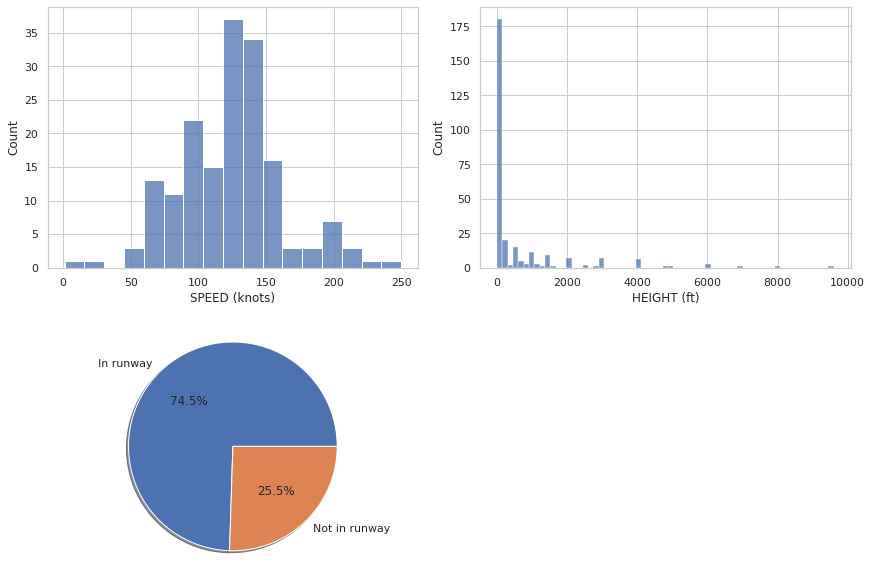

<Figure size 432x288 with 0 Axes>

In [ ]:
fig2 = plt.figure(constrained_layout=True, figsize=(12,8))
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[1,0])
sns.histplot(df_filtered.loc[df_filtered['PHASE_OF_FLIGHT'] == 'Local', 'SPEED'], ax=f2_ax1)
f2_ax1.set(xlabel='SPEED (knots)')
sns.histplot(df_filtered.loc[df_filtered['PHASE_OF_FLIGHT'] == 'Local', 'HEIGHT'], ax=f2_ax2)
f2_ax2.set(xlabel='HEIGHT (ft)')
sizes = [df_filtered.loc[df_filtered['PHASE_OF_FLIGHT'] == 'Local', 'RUNWAY'].notnull().sum(),
         df_filtered.loc[df_filtered['PHASE_OF_FLIGHT'] == 'Local', 'RUNWAY'].isnull().sum()]
labels = ['In runway', 'Not in runway']
f2_ax3.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True)
plt.show()
plt.savefig('/content/gdrive/MyDrive/TFM/plots/phase_of_flight_local.eps', bbox_inches="tight", format='eps')

According to the values shown at the picture below, the following conclusions can be obtained:
* Average value for speed is 125 knots, which is equivalent to 232 km/h. This means, the aicraft cannot be in cruise and it may be at the take-off run or in the landing roll phase in case of being a big aicraft, or it could be cruise in case of being a small aircraft.
* Above conclusion is confirmed by the fact that most of bird strike accidents are suffered by large aircrafts (eg B-737, A-320, etc), therefore, the most frequest height above ground is 0 as it occur during take-off run or during landing roll phase.
* Aditionally, both previous hypothesis are confimed again by the fact that most of the indicets take part in the runway

In terms of probability and taking into account that most affected aircrafts are large ones, "Local" phase could be classieid under take-off run or landing-roll. However, as there is no way of knowing it it is one or the other and that the total amount of values belonging to "Local" is 853, which is very low compared to the total number of entries, it wil be considerer as np.nan value.

In [ ]:
df_filtered.loc[df_filtered['PHASE_OF_FLIGHT_cleaned'] =='Local', 'PHASE_OF_FLIGHT_cleaned'] = np.nan

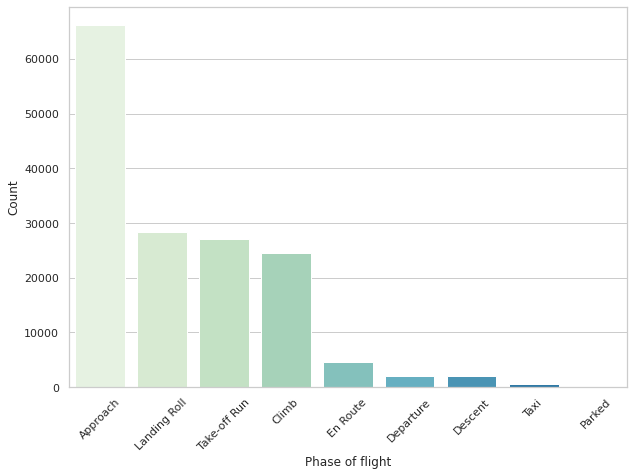

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize = (10, 7))
sns.barplot(x=df_filtered['PHASE_OF_FLIGHT_cleaned'].value_counts().index,
             y=df_filtered['PHASE_OF_FLIGHT_cleaned'].value_counts().values,
            palette = 'GnBu')
plt.xticks(rotation=45)
plt.xlabel('Phase of flight')
plt.ylabel('Count')
plt.show()
plt.savefig('/content/gdrive/MyDrive/TFM/plots/phase_of_flight.eps', bbox_inches="tight", format='eps')

In [ ]:
df_filtered.drop(columns = ['PHASE_OF_FLIGHT'], inplace = True)

In [ ]:
df_filtered.shape

(250116, 74)

### HEIGHT

HEIGHT values are in ft according to FAA notes. In order to have a better undersanding of data, an aditional column will be created containing data in m. Additionally, height units will be indicated in column name.

In [ ]:
print ('The number of missing values for height is:', df_filtered['HEIGHT'].isnull().sum())

The number of missing values for height is: 116800


In [ ]:
df_filtered['HEIGHT'].dtype

dtype('float64')

In [ ]:
df_filtered['HEIGHT'].value_counts().index.sort_values()

Float64Index([    0.0,     1.0,     2.0,     3.0,     4.0,     5.0,     6.0,
                  7.0,     8.0,     9.0,
              ...
              21000.0, 21300.0, 22000.0, 23000.0, 24000.0, 24300.0, 25000.0,
              27500.0, 30000.0, 31300.0],
             dtype='float64', length=654)

In [ ]:
df_filtered['HEIGHT_ft_cleaned'] = df_filtered['HEIGHT']
df_filtered['HEIGHT_m_cleaned'] = df_filtered['HEIGHT_ft_cleaned']*0.3048

In [ ]:
# Groupby mean excludes missing values
mean_height_per_year = df_filtered.groupby(['INCIDENT_YEAR_cleaned'])['HEIGHT'].mean()
mode_height_per_year = df_filtered.groupby(['INCIDENT_YEAR_cleaned'])['HEIGHT'].agg(lambda x: x.value_counts().index[0])

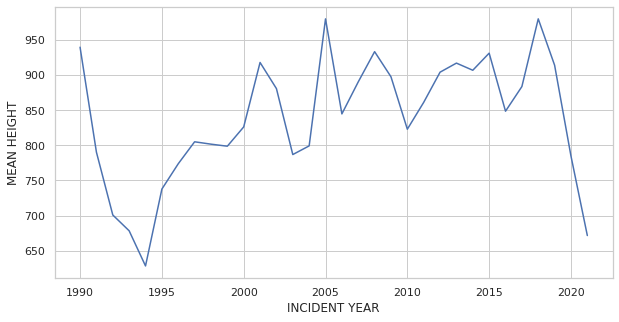

In [ ]:
plt.figure(figsize = (10,5))
#mean_height_per_year.plot.bar()
sns.lineplot(data = mean_height_per_year)
plt.xlabel('INCIDENT YEAR')
plt.ylabel('MEAN HEIGHT')
plt.show()

In [ ]:
mode_height_per_year

INCIDENT_YEAR_cleaned
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
Name: HEIGHT, dtype: float64

In [ ]:
df_filtered['HEIGHT_m_cleaned'].describe()

count    133316.000000
mean        262.443578
std         561.547677
min           0.000000
25%           0.000000
50%          15.240000
75%         243.840000
max        9540.240000
Name: HEIGHT_m_cleaned, dtype: float64

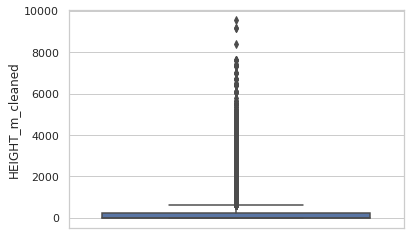

In [ ]:
sns.boxplot(data = df_filtered, y = 'HEIGHT_m_cleaned')
plt.show()

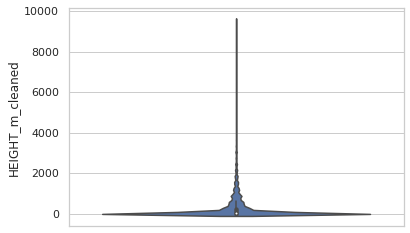

In [ ]:
sns.violinplot(y=df_filtered['HEIGHT_m_cleaned'])
plt.show()

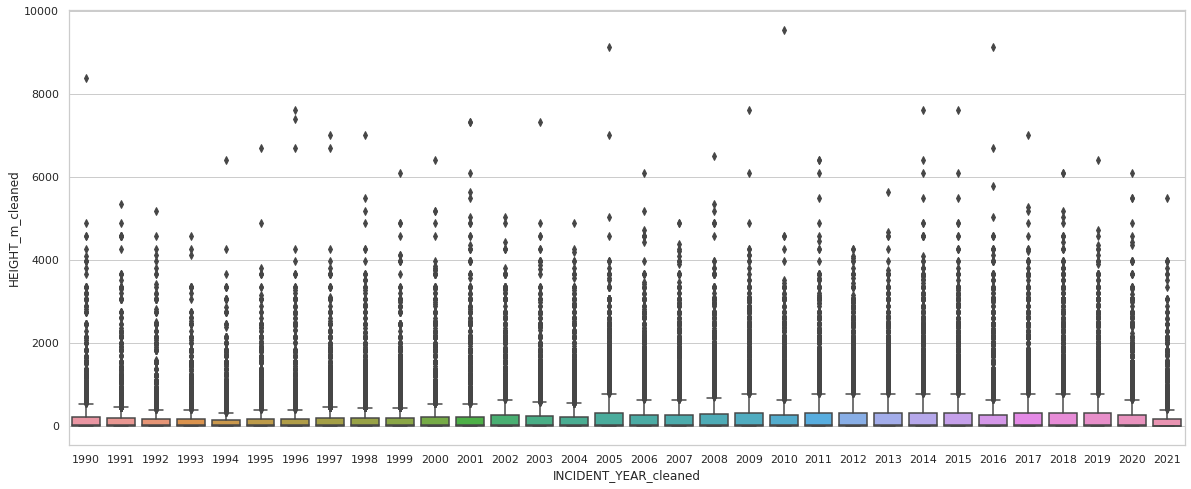

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(data = df_filtered, x = 'INCIDENT_YEAR_cleaned', y = 'HEIGHT_m_cleaned')
plt.show()

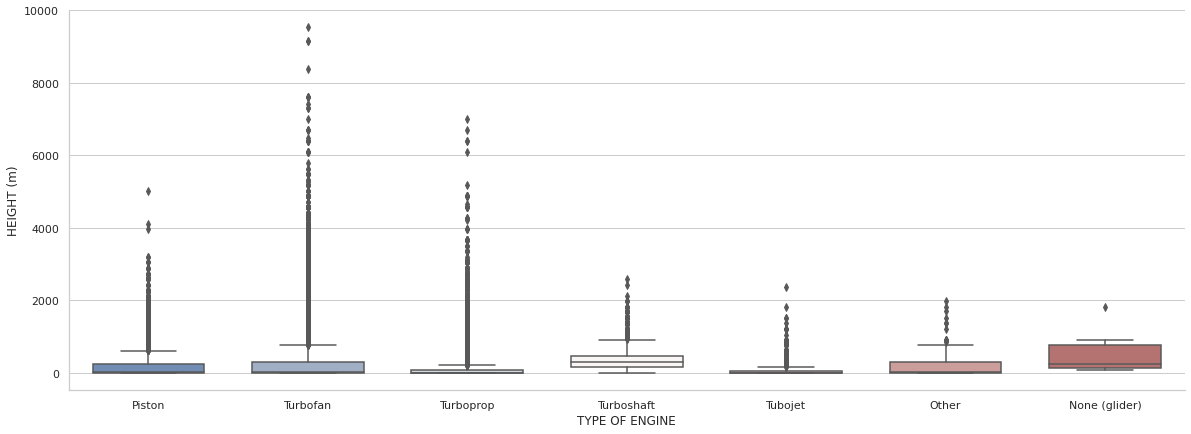

In [ ]:
plt.figure(figsize = ((20,7)))
sns.boxplot(data = df_filtered, x = df_filtered['TYPE_ENG_cleaned'], y = df_filtered['HEIGHT_m_cleaned'],
            whis=1.5, width=0.7, palette='vlag')
#sns.stripplot(data = df_filtered, x = df_filtered['TYPE_ENG_cleaned'], y = df_filtered['HEIGHT_m_cleaned'],
#              size=4, color=".3", linewidth=0)
plt.xlabel('TYPE OF ENGINE')
plt.ylabel('HEIGHT (m)')
sns.despine()
plt.show()

In [ ]:
df_filtered.drop(columns = ['HEIGHT'], inplace = True)

In [ ]:
df_filtered.shape

(250116, 75)

### SPEED

Acording to FAA notes, speed is measured in knots and it is indicated airspeed. Column name will be change to reflect this and an additional column will be created with speed in km/h in order to have a better understanding of data.


The number of missing values for SPEED is checked

In [ ]:
print ('The number of missing values for SPEED is:', df_filtered['SPEED'].isnull().sum())

The number of missing values for SPEED is: 164171


In [ ]:
df_filtered['SPEED_knot_IAS_cleaned'] = df_filtered['SPEED']
df_filtered['SPEED_km/h_IAS_cleaned'] = df_filtered['SPEED_knot_IAS_cleaned']*1.852

In [ ]:
mean_speed_per_year = df_filtered.groupby(['INCIDENT_YEAR_cleaned'])['SPEED_km/h_IAS_cleaned'].mean()
mean_speed_per_year

INCIDENT_YEAR_cleaned
1990    258.442896
1991    252.464072
1992    248.831385
1993    248.787398
1994    249.983519
1995    252.372381
1996    252.673521
1997    256.623014
1998    258.893353
1999    257.724954
2000    259.685255
2001    255.002845
2002    263.120255
2003    264.051914
2004    262.430258
2005    268.108712
2006    265.242879
2007    269.881879
2008    274.940708
2009    264.835048
2010    263.106818
2011    262.498278
2012    268.575675
2013    267.978704
2014    269.475790
2015    271.345868
2016    267.050240
2017    265.038259
2018    272.873914
2019    268.298356
2020    250.720680
2021    255.888458
Name: SPEED_km/h_IAS_cleaned, dtype: float64

In [ ]:
df_filtered['SPEED_km/h_IAS_cleaned'].describe()

count    85945.000000
mean       263.668558
std         85.450101
min          0.000000
25%        222.240000
50%        257.428000
75%        296.320000
max        740.800000
Name: SPEED_km/h_IAS_cleaned, dtype: float64

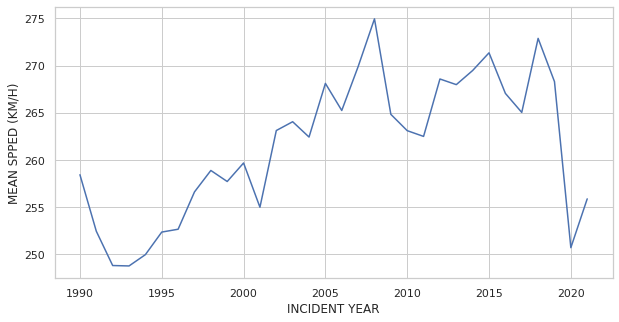

In [ ]:
plt.figure(figsize = (10,5))
#mean_speed_per_year.plot.bar(color = 'orange')
sns.lineplot(data = mean_speed_per_year)
plt.xlabel('INCIDENT YEAR')
plt.ylabel('MEAN SPPED (KM/H)')
plt.show()

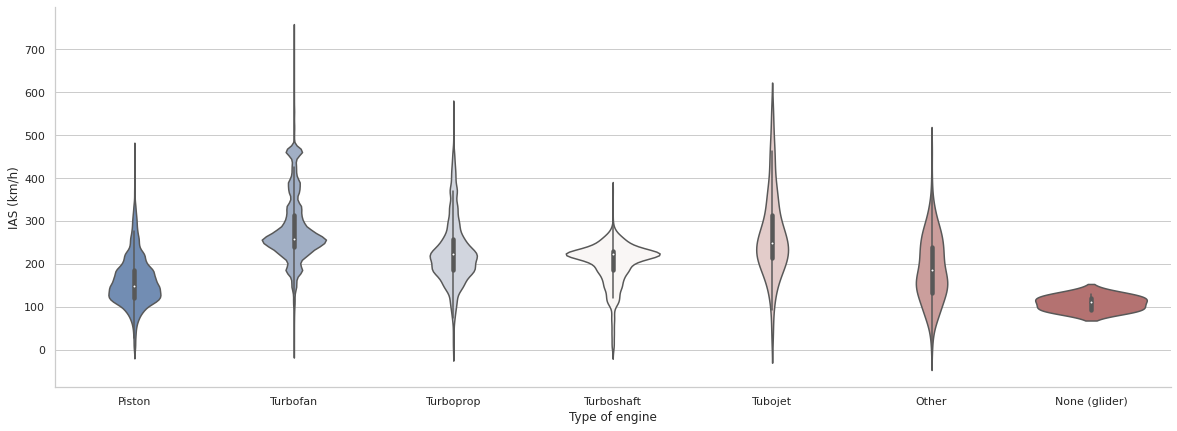

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize = ((20,7)))
sns.violinplot(data = df_filtered, x = df_filtered['TYPE_ENG_cleaned'], y = df_filtered['SPEED_km/h_IAS_cleaned'],
            whis=1.5, width=0.7, palette='vlag')
#sns.stripplot(data = df_filtered, x = df_filtered['TYPE_ENG_cleaned'], y = df_filtered['SPEED_km/h_IAS_cleaned'],
#              size=4, color=".3", linewidth=0)
plt.xlabel('Type of engine')
plt.ylabel('IAS (km/h)')
sns.despine()
plt.show()
plt.savefig('/content/gdrive/MyDrive/TFM/plots/violin_plot_aircraft_type_vs_IAS.eps', bbox_inches="tight", format='eps')

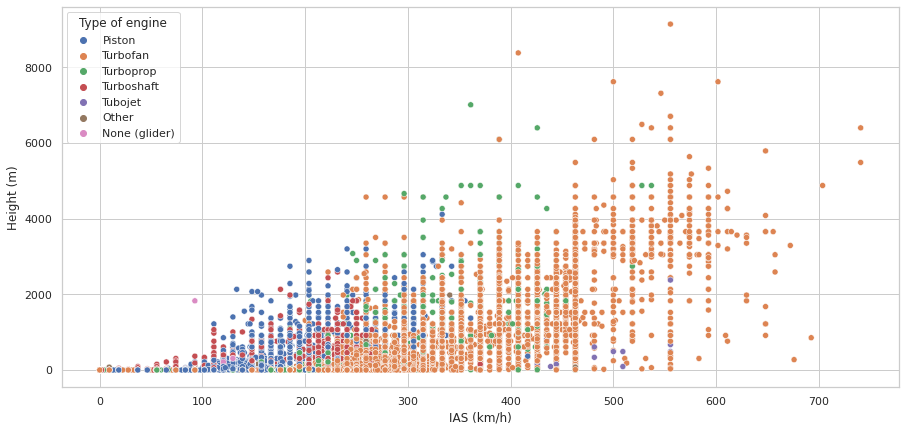

In [ ]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = df_filtered, x = 'SPEED_km/h_IAS_cleaned', y = 'HEIGHT_m_cleaned', hue = 'TYPE_ENG_cleaned')
plt.xlabel('IAS (km/h)')
plt.ylabel('Height (m)')
plt.legend(title='Type of engine')
plt.show()

/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /content/gdrive/MyDrive/TFM/plots/speed_distribution.eps
  warn('Filename: {}'.format(filename), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 164171 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.7/dist-packages/plotnine/guides/guides.py:200: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it
  PlotnineWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 164171 rows containing non-f

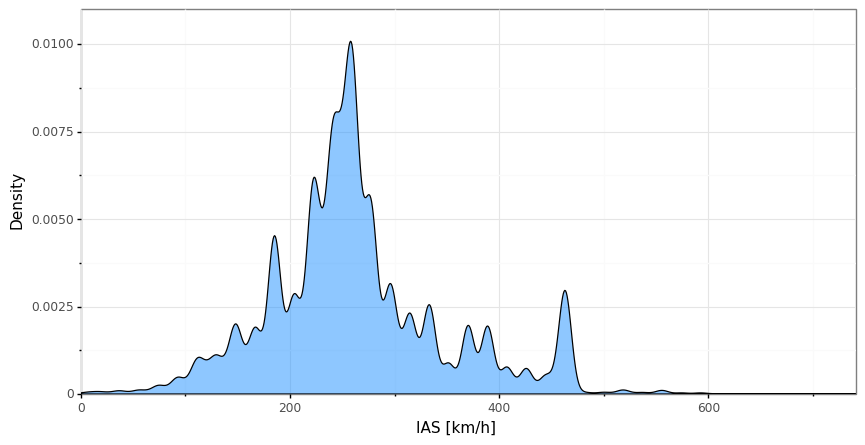

<ggplot: (8765877482149)>

In [ ]:
p = (ggplot(df_filtered, aes(x = 'SPEED_km/h_IAS_cleaned')) + 
 geom_density(fill="dodgerblue", alpha=0.5) +
 theme_bw() +
 theme(figure_size=(10, 5)) +
  xlab("IAS [km/h]") + ylab("Density") +
  scale_color_brewer(type="qual", palette="Set1") +
  scale_x_continuous(expand=[0,0])+scale_y_continuous(limits = [0, 0.011], expand=[0,0]))
ggsave(plot = p, filename='speed_distribution.eps', device = 'eps', path = '/content/gdrive/MyDrive/TFM/plots')
p

/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /content/gdrive/MyDrive/TFM/plots/height_distribution.eps
  warn('Filename: {}'.format(filename), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 116800 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.7/dist-packages/plotnine/guides/guides.py:200: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it
  PlotnineWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 116800 rows containing non-

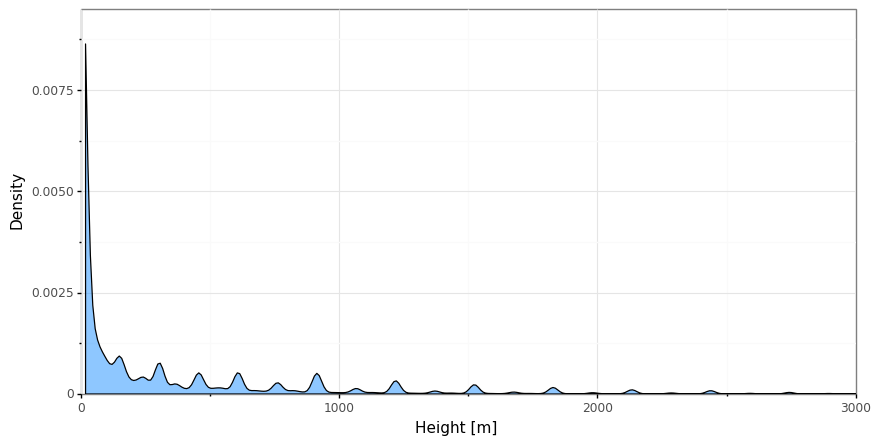

<ggplot: (8765877026277)>

In [ ]:
p = (ggplot(df_filtered, aes(x = 'HEIGHT_m_cleaned')) + 
 geom_density(fill="dodgerblue", alpha=0.5) +
 theme_bw() +
 theme(figure_size=(10, 5)) +
  xlab("Height [m]") + ylab("Density") +
  scale_color_brewer(type="qual", palette="Set1") +
  scale_x_continuous(expand=[0,0])+scale_y_continuous(limits = [0, 0.0095], expand=[0,0]) + 
  coord_cartesian(xlim=[0,3000]))
ggsave(plot = p, filename='height_distribution.eps', device = 'eps', path = '/content/gdrive/MyDrive/TFM/plots')
p

In [ ]:
df_filtered.drop(columns = ['SPEED'], inplace = True)

In [ ]:
df_filtered.shape

(250116, 76)

### DISTANCE

According to FFA notes, distance is measured in nautical miles from airport.

The number of missing values for DISTANCE is checked

In [ ]:
df_filtered['DISTANCE'].isnull().sum()

90237

In [ ]:
df_filtered['DISTANCE_NM_cleaned'] = df_filtered['DISTANCE']
df_filtered['DISTANCE_KM_cleaned'] = df_filtered['DISTANCE']*1.852

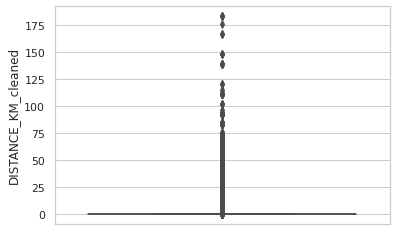

In [ ]:
sns.boxplot(y = df_filtered['DISTANCE_KM_cleaned'])
plt.show()

In [ ]:
df_filtered['DISTANCE_KM_cleaned'].describe()

count    159879.000000
mean          1.440831
std           6.513456
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         183.348000
Name: DISTANCE_KM_cleaned, dtype: float64

In [ ]:
print('The number of incidents which occur at the airport is:', df_filtered.loc[df_filtered['AIRPORT_ID_cleaned']!='OFF THE AIRPORT'].shape[0])

The number of incidents which occur at the airport is: 219985


In [ ]:
df_filtered.drop(columns = ['DISTANCE'], inplace = True)

### SKY AND PRECIPITATION

In [ ]:
print('The number of missing values for SKY is', df_filtered['SKY'].isnull().sum())
print('The number of missing values for PRECIPITATION is', df_filtered['PRECIPITATION'].isnull().sum())

The number of missing values for SKY is 125756
The number of missing values for PRECIPITATION is 130090


In [ ]:
print(' Possible and number of values for SKY is\n',df_filtered['SKY'].value_counts(normalize = True),'\n')
print(' Possible and number of values for PRECIPITATION is\n', df_filtered['PRECIPITATION'].value_counts(normalize = True))

 Possible and number of values for SKY is
 No Cloud      0.480733
Some Cloud    0.345063
Overcast      0.174204
Name: SKY, dtype: float64 

 Possible and number of values for PRECIPITATION is
 None                0.914935
Rain                0.058946
Fog                 0.019712
Snow                0.003499
Fog, Rain           0.002341
Rain, Snow          0.000183
None, Snow          0.000117
Fog, Snow           0.000117
None, Rain          0.000050
Fog, None           0.000050
Fog, Rain, Snow     0.000042
None, Rain, Snow    0.000008
Name: PRECIPITATION, dtype: float64


The feature precipitation will be discarded as for further analysis as most of data shows there is no precipitation. In case of SKY all three possible values are more close in frenquency, therefore, this feature will be maintained.

In [ ]:
df_filtered.rename(columns = {'SKY': 'SKY_cleaned'}, inplace = True)

In [ ]:
df_filtered.drop(columns = ['PRECIPITATION'], inplace = True)

In [ ]:
df_filtered.shape

(250116, 76)

### BOOLEAN FEATURES

In the FAA dataset there is a group of features of type boolean. This means they can only be 'True' or 'False'. However, as this dataset was imported form a csv file, these values are in string format. Thefefore, it will be necessary to transform the into boolean datatype.

These features are listed below:
* INGESTED
* INDICATED_DAMAGE
* STR_RAD
* DAM_RAD
* STR_WINDSHEILD
* DAM_WINDSHIELD
* STR_NOSE
* DAM_NOSE
* STR_ENG1
* DAM_ENG1
* ING_ENG1
* STR_ENG2
* DAM_ENG2
* ING_ENG2
* STR_ENG3
* DAM_ENG3
* ING_ENG3
* STR_ENG4
* DAM_ENG4
* ING_ENG4
* STR_PROP
* DAM_PROP
* STR_WING_ROT
* DAM_WING_ROT
* STR_FUSE
* DAM_FUSE
* STR_LG
* DAM_LG
* STR_TAIL
* DAM_TAIL
* STR_LGHTS
* DAM_LGHTS
* STR_OTHER
* DAM_OTHER

In [ ]:
#List of boolean features is obtained based on the name structure
boolean_features = df_filtered.filter(regex='ING_|STR_|DAM_|INGESTED|INDICATED_DAMAGE').columns.to_list()

In [ ]:
boolean_values = {'VERDADERO':True, 'FALSO':False}
df_filtered[boolean_features] = df_filtered[boolean_features].replace(boolean_values)
df_filtered[boolean_features].head()

,INGESTED,INDICATED_DAMAGE,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


Columns named _ENG1, _ENG2, _ENG3 and _ENG4 are grouped into one for STR, DAM and ING.

In [ ]:
df_filtered['STR_ENGINE'] = df_filtered['STR_ENG1'] + df_filtered['STR_ENG2'] + df_filtered['STR_ENG3'] + df_filtered['STR_ENG4']
df_filtered['DAM_ENGINE'] = df_filtered['DAM_ENG1'] + df_filtered['DAM_ENG2'] + df_filtered['DAM_ENG3'] + df_filtered['DAM_ENG4']
df_filtered['ING_ENGINE'] = df_filtered['ING_ENG1'] + df_filtered['ING_ENG2'] + df_filtered['ING_ENG3'] + df_filtered['ING_ENG4']

/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [ ]:
df_filtered.drop(columns = ['STR_ENG1', 'STR_ENG2', 'STR_ENG3', 'STR_ENG4',
                            'DAM_ENG1', 'DAM_ENG2', 'DAM_ENG3', 'DAM_ENG4',
                            'ING_ENG1', 'ING_ENG2', 'ING_ENG3', 'ING_ENG4'],
                 inplace = True, axis = 1)

In [ ]:
strike_location = df_filtered.filter(regex='STR_|ING_ENG').columns.to_list()
df_filtered[strike_location].sum()

STR_RAD         23731
STR_WINDSHLD    31595
STR_NOSE        29133
STR_PROP         4425
STR_WING_ROT    29379
STR_FUSE        22928
STR_LG          10718
STR_TAIL         2590
STR_LGHTS        1303
STR_OTHER       31497
STR_ENGINE      21892
ING_ENGINE        195
dtype: int64

In [ ]:
damage_location = df_filtered.filter(regex='DAM_').columns.to_list()
df_filtered[damage_location].sum()

DAM_RAD         1874
DAM_WINDSHLD    1282
DAM_NOSE        1496
DAM_PROP         637
DAM_WING_ROT    5356
DAM_FUSE        1051
DAM_LG          1186
DAM_TAIL         909
DAM_LGHTS        911
DAM_OTHER       2158
DAM_ENGINE      5178
dtype: int64

In [ ]:
relation_str_dam = {'strike_location': ['Radome', 'Windshield', 'Nose', 'Propeller', 'Wing or Rotor', 'Fuselage', 'Landing Gear', 'Tail', 'Lights', 'Misc. parts', 'Engine'],
                       'number_strike': df_filtered[strike_location].sum().values[0:len(df_filtered[strike_location].sum())-1],
                       'number_damaged': df_filtered[damage_location].sum().values}
df_relation_str_dam = pd.DataFrame(relation_str_dam)
df_relation_str_dam.sort_values(by = 'number_strike', ascending = False, inplace = True)
df_relation_str_dam

,strike_location,number_strike,number_damaged
1,Windshield,31595,1282
9,Misc. parts,31497,2158
4,Wing or Rotor,29379,5356
2,Nose,29133,1496
0,Radome,23731,1874
5,Fuselage,22928,1051
10,Engine,21892,5178
6,Landing Gear,10718,1186
3,Propeller,4425,637
7,Tail,2590,909


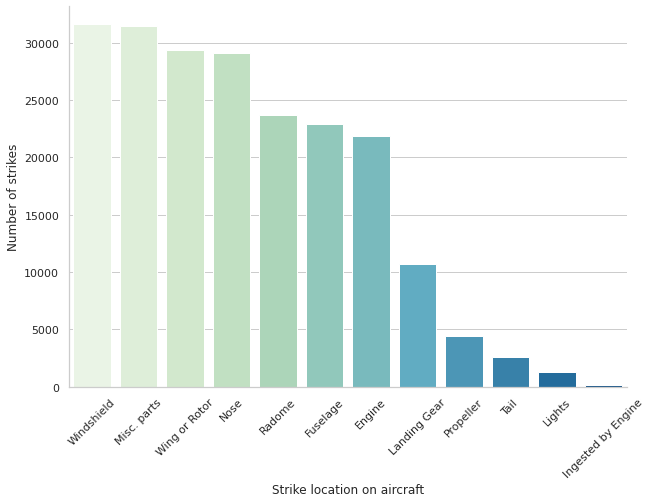

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize = (10,7))
strike_labels = ['Windshield','Misc. parts', 'Wing or Rotor', 'Nose', 'Radome','Fuselage','Engine', 'Landing Gear', 'Propeller', 'Tail', 'Lights', 'Ingested by Engine' ]
sns.barplot(x = strike_labels,
            y = df_filtered[strike_location].sum().sort_values(ascending = False).values,
            palette=sns.color_palette("GnBu", 12))
sns.despine()
plt.xlabel('Strike location on aircraft')
plt.ylabel('Number of strikes')
plt.xticks(rotation = 45)
plt.show()
plt.savefig('/content/gdrive/MyDrive/TFM/plots/strike_location_vs_number_of_strikes.eps', bbox_inches="tight", format='eps')

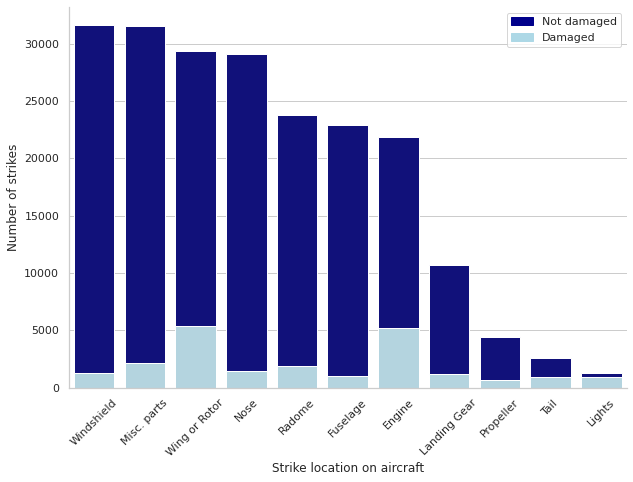

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize = (10,7))
#strike_labels = ['Windshield','Misc. parts', 'Wing or Rotor', 'Nose', 'Radome','Fuselage','Engine', 'Landing Gear', 'Propeller', 'Tail', 'Lights', 'Ingested by Engine' ]
# df_strike_loc['number'] - df_strike_dam['number'] done beacuse df_strike_loc['number'] already takes into account incidents with damage
sns.barplot(x = df_relation_str_dam['strike_location'],
            y = (df_relation_str_dam['number_strike']),
            color = 'darkblue')
sns.barplot(x = df_relation_str_dam['strike_location'],
            y = df_relation_str_dam['number_damaged'],
            color = 'lightblue')
sns.despine()
plt.xlabel('Strike location on aircraft')
plt.ylabel('Number of strikes')
plt.xticks(rotation = 45)
# add legend
top_bar = mpatches.Patch(color='darkblue', label='Not damaged')
bottom_bar = mpatches.Patch(color='lightblue', label='Damaged')
plt.legend(handles=[top_bar, bottom_bar])
#plt.title('Damaged/non-damaged ratio by location of strike', fontweight = 'bold')
plt.show()
plt.savefig('/content/gdrive/MyDrive/TFM/plots/damaged_not_damaged_proportion.eps', bbox_inches="tight", format='eps')


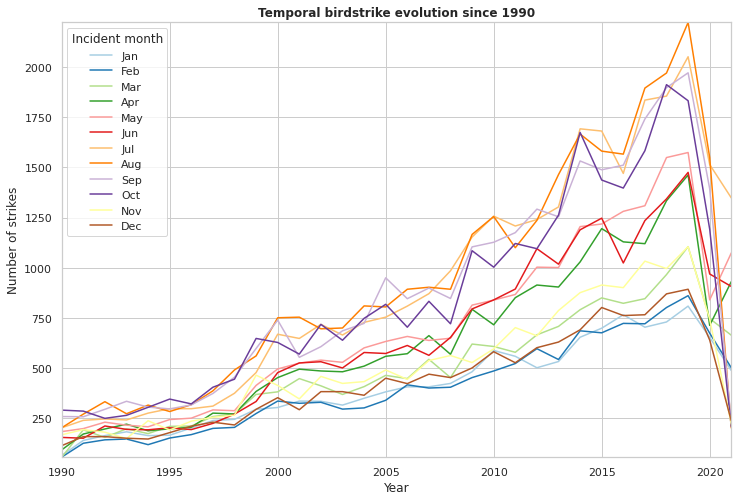

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize = (12,8))
sns.lineplot(data = df_filtered.groupby(['INCIDENT_YEAR_cleaned', 'INCIDENT_MONTH_cleaned'])['INCIDENT_DATE_cleaned'].count(), x = 'INCIDENT_YEAR_cleaned',
             y = df_filtered.groupby(['INCIDENT_YEAR_cleaned', 'INCIDENT_MONTH_cleaned'])['INCIDENT_DATE_cleaned'].count(),
             hue = 'INCIDENT_MONTH_cleaned',
             palette = sns.color_palette('Paired', 12))
sns.set_theme(style="whitegrid")
plt.legend(title='Incident month', labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Year')
plt.ylabel('Number of strikes')
plt.title('Temporal birdstrike evolution since 1990', fontweight = 'bold')
plt.margins(x=0, y = 0, tight=True)
plt.show()
plt.savefig('/content/gdrive/MyDrive/TFM/plots/temporal_birdstrike_evolution_since_1990.eps', bbox_inches="tight", format='eps')

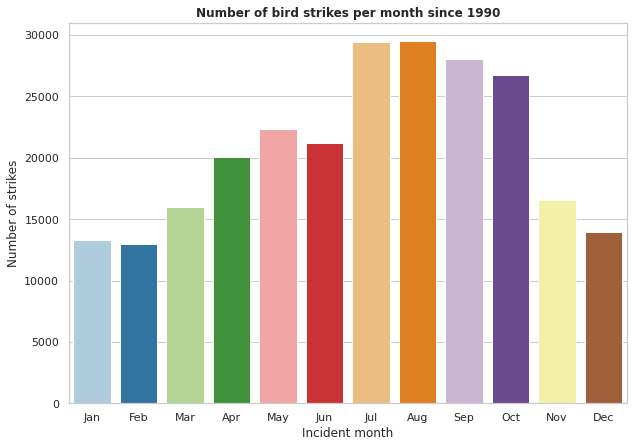

<Figure size 432x288 with 0 Axes>

In [ ]:
df_filtered.groupby('INCIDENT_MONTH_cleaned')['INCIDENT_DATE_cleaned'].count()
fig = plt.figure(figsize = (10,7))
sns.barplot(x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            y = df_filtered.groupby('INCIDENT_MONTH_cleaned')['INCIDENT_DATE_cleaned'].count().values,
            palette = sns.color_palette('Paired', 12))

plt.xlabel('Incident month')
plt.ylabel('Number of strikes')
plt.title('Number of bird strikes per month since 1990', fontweight = 'bold')
plt.show()
plt.savefig('/content/gdrive/MyDrive/TFM/plots/number_of_birdstrike_per_month_since_1990.eps', bbox_inches="tight", format='eps')

In [ ]:
# Mean number of bird strikes per year since 1990
number_of_strikes_per_year = math.floor(df_filtered.groupby('INCIDENT_YEAR_cleaned')['INCIDENT_DATE_cleaned'].count().sum() / len(df_filtered.groupby('INCIDENT_YEAR_cleaned').groups.keys()))
number_of_strikes_per_year

7816

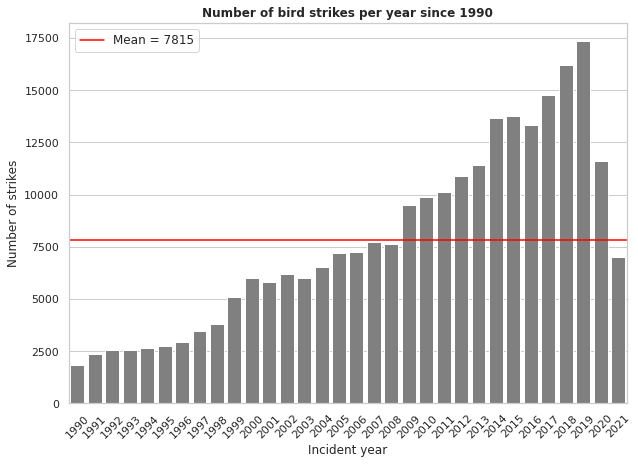

<Figure size 432x288 with 0 Axes>

In [ ]:
df_filtered.groupby('INCIDENT_YEAR_cleaned')['INCIDENT_DATE_cleaned'].count()
fig = plt.figure(figsize = (10,7))
sns.barplot(x = df_filtered.groupby('INCIDENT_YEAR_cleaned')['INCIDENT_DATE_cleaned'].count().index,
            y = df_filtered.groupby('INCIDENT_YEAR_cleaned')['INCIDENT_DATE_cleaned'].count().values,
            color = 'grey')
#Drawing a horizontal line at mean strikes per year
plt.axhline(number_of_strikes_per_year, color = 'red', label='Mean = 7815')
plt.xlabel('Incident year')
plt.ylabel('Number of strikes')
plt.title('Number of bird strikes per year since 1990', fontweight = 'bold')
plt.xticks(rotation = 45)
plt.legend(prop={'size': 12})
plt.show()
plt.savefig('/content/gdrive/MyDrive/TFM/plots/number_of_birdstrike_per_year_since_1990.eps', bbox_inches="tight", format='eps')

In [ ]:
len(df_filtered.groupby('INCIDENT_YEAR_cleaned').groups.keys())

32

In [ ]:
damage_location = df_filtered.filter(regex='DAM_').columns.to_list()
df_filtered[damage_location].sum()

DAM_RAD         1874
DAM_WINDSHLD    1282
DAM_NOSE        1496
DAM_PROP         637
DAM_WING_ROT    5356
DAM_FUSE        1051
DAM_LG          1186
DAM_TAIL         909
DAM_LGHTS        911
DAM_OTHER       2158
DAM_ENGINE      5178
dtype: int64

As it can be observed in the possible values given by this variable, false values could mean that either the bird is not ingested by the engine or there is no data on for this feature. Therefore, it will be interesting to analyze the correlation of True values with the rest of features.

In [ ]:
df_filtered.shape

(250116, 67)

### DAMAGE LEVEL

According to FAA notes, this feature indicates the damage level as follows:
* Blank = Unknown
* N = none, which means that no damage was reported
* M = minor, which means that  the aircraft can be rendered airworthy by simple repairs or replacements and an extensive inspection is not necessary
* M? = uncertain level, which means that the aircraft was damaged, but details as to the extent of the damage are lacking
* S = substantial, which means that when the aircraft incurs damage or structural failure which adversely affects the structure strength, performance or flight characteristics of the aircraft and which would normally require major repair or replacement of the affected component.
* D = Destroyed, which means that damage sustained makes it inadvisable to restore the aircraft to an airworthy condition


In [ ]:
df_filtered['DAMAGE_LEVEL_cleaned'] = df_filtered['DAMAGE_LEVEL']
print('The number of missing values for DAMAGE_LEVEL is', df_filtered['DAMAGE_LEVEL_cleaned'].isnull().sum())
print('Possible values for DAMAGE_LEVEL are: \n', df_filtered['DAMAGE_LEVEL_cleaned'].value_counts())

The number of missing values for DAMAGE_LEVEL is 84617
Possible values for DAMAGE_LEVEL are: 
 N     147347
M       8356
M?      5611
S       4111
D         74
Name: DAMAGE_LEVEL_cleaned, dtype: int64


In [ ]:
damage_level_codification = {'N': 'No damage', 'M':'Minor', 'M?': 'Uncertain', 'S': 'Substantial', 'D':'Destroyed' }
df_filtered['DAMAGE_LEVEL_cleaned'].replace(damage_level_codification, inplace=True)


It will be considered that if there is no data on damage level, the incident had no important consequences and it will be classified as None (there is no damage).

In [ ]:
df_filtered['DAMAGE_LEVEL_cleaned'].fillna('No damage', inplace = True)
print('The number of missing values for DAMAGE_LEVEL_cleaned is', df_filtered['DAMAGE_LEVEL_cleaned'].isnull().sum())

The number of missing values for DAMAGE_LEVEL_cleaned is 0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


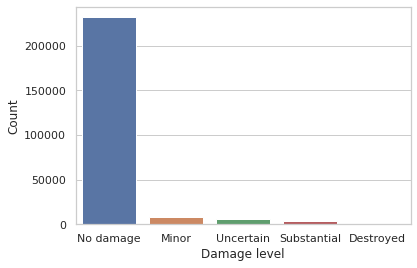

In [ ]:
sns.barplot(df_filtered['DAMAGE_LEVEL_cleaned'].value_counts().index,
            df_filtered['DAMAGE_LEVEL_cleaned'].value_counts().values)
plt.xlabel('Damage level')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 16 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /content/gdrive/MyDrive/TFM/plots/scatter_plot_speed_height_damage.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_jitter : Removed 165353 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_jitter : Removed 165353 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


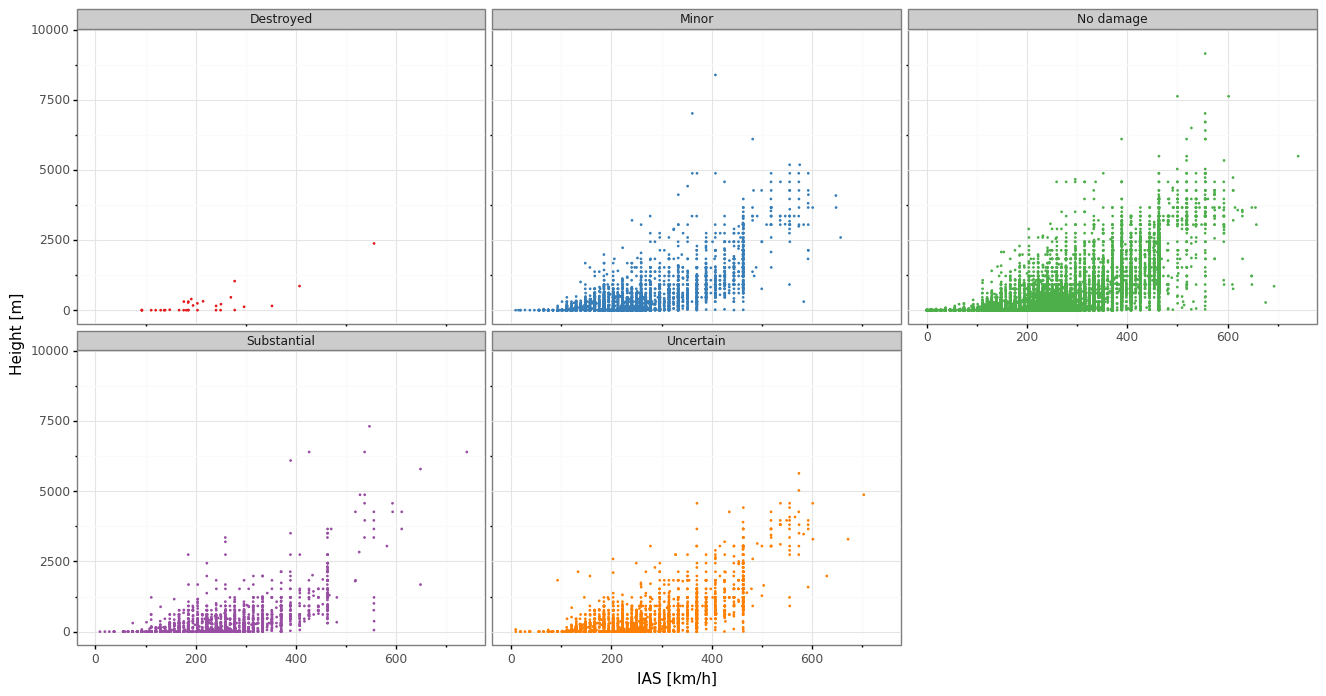

<ggplot: (8765877467237)>

In [ ]:
p = (ggplot(df_filtered, aes(x = 'SPEED_km/h_IAS_cleaned', y ='HEIGHT_m_cleaned')) + 
 geom_jitter(aes(color = 'DAMAGE_LEVEL_cleaned'), size = 0.1) +
 facet_wrap('~DAMAGE_LEVEL_cleaned') + 
 theme_bw() +
 theme(figure_size=(16, 8), legend_position = "none") +
 xlab("IAS [km/h]") + ylab("Height [m]") + scale_color_brewer(type="qual", palette="Set1"))
ggsave(plot = p, filename='scatter_plot_speed_height_damage.png', device = 'png', path = '/content/gdrive/MyDrive/TFM/plots', dpi=1000 )
p

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_jitter : Removed 165353 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


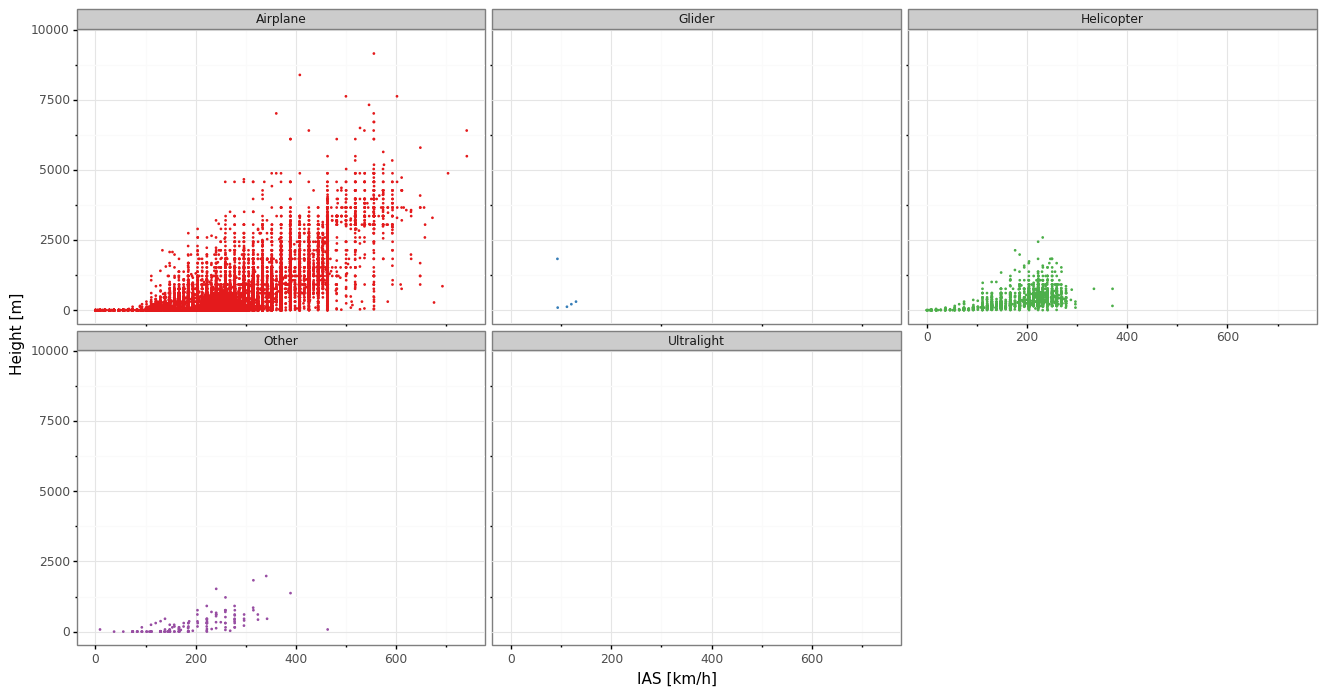

<ggplot: (8765875715713)>

In [ ]:
p = (ggplot(df_filtered, aes(x = 'SPEED_km/h_IAS_cleaned', y ='HEIGHT_m_cleaned')) + 
 geom_jitter(aes(color = 'AC_CLASS_cleaned'), size = 0.1) +
 facet_wrap('~AC_CLASS_cleaned') + 
 theme_bw() +
 theme(figure_size=(16, 8), legend_position = "none") +
 xlab("IAS [km/h]") + ylab("Height [m]") + scale_color_brewer(type="qual", palette="Set1"))
#ggsave(plot = p, filename='scatter_plot_speed_weight_damage.png', device = 'png', path = '/content/gdrive/MyDrive/TFM/plots', dpi=1000 )
p

/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /content/gdrive/MyDrive/TFM/plots/aircraft_class_vs_damage_level.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


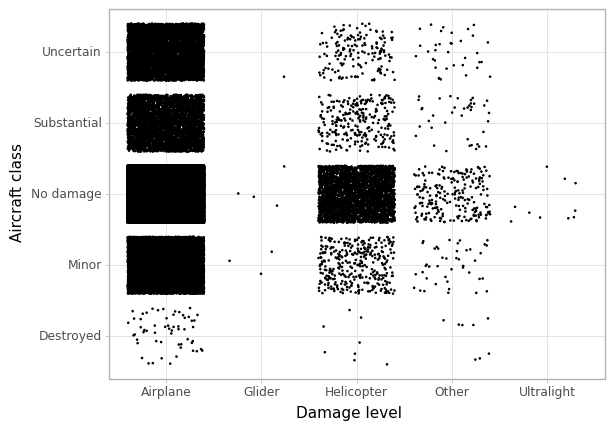

<ggplot: (8765875746473)>

In [ ]:
p = (ggplot(df_filtered, aes(x = 'AC_CLASS_cleaned', y ='DAMAGE_LEVEL_cleaned')) + 
 geom_jitter(size = 0.05) + 
 theme_light() + xlab("Damage level") 
 + ylab("Aircraft class"))
ggsave(plot = p, filename='aircraft_class_vs_damage_level.png', device = 'png', path = '/content/gdrive/MyDrive/TFM/plots', ddpi =1000)
p

In [ ]:
damage_level_concentration = df_filtered[['DAMAGE_LEVEL_cleaned','AC_CLASS_cleaned']]


In [ ]:
pd.crosstab(damage_level_concentration['DAMAGE_LEVEL_cleaned'], damage_level_concentration['AC_CLASS_cleaned']).style.background_gradient('OrRd')

AC_CLASS_cleaned,Airplane,Glider,Helicopter,Other,Ultralight
DAMAGE_LEVEL_cleaned,,,,,
Destroyed,58,0,8,8,0
Minor,7974,3,336,43,0
No damage,228543,4,3192,215,10
Substantial,3816,0,256,39,0
Uncertain,5419,1,156,35,0


In [ ]:
df_filtered.drop(columns = ['DAMAGE_LEVEL'], inplace = True)

In [ ]:
df_filtered.shape

(250116, 67)

### EFFECT AND EFFECT OTHER

In [ ]:
df_filtered['EFFECT_cleaned'] = df_filtered['EFFECT']
df_filtered['EFFECT_OTHER_cleaned'] = df_filtered['EFFECT_OTHER']

In [ ]:
print('The number of missing values for effect is', df_filtered['EFFECT'].isnull().sum())
print('Possible values for EFFECT are:')
df_filtered['EFFECT'].value_counts(normalize=True)

The number of missing values for effect is 118055
Possible values for EFFECT are:


None                                       0.897843
Precautionary Landing                      0.055240
Other                                      0.022217
Aborted Take-off                           0.020831
Engine Shutdown                            0.003604
Engine Shutdown, Precautionary Landing     0.000182
Other, Precautionary Landing               0.000068
Aborted Take-off, Engine Shutdown          0.000008
Aborted Take-off, Precautionary Landing    0.000008
Name: EFFECT, dtype: float64

According to USA aviation regulations in accident and incident matters, both accidents and serious incidents must be reported to the NTSB (National Transportation Safety Board), but non-serious incidents do not need to be reported.

All effects listed in EFFECT feature lead to a serious incident, unless "None" categorized values. As this is a FAA dataset, it is assumed that it includes all serious incidents, which are the ones leading to the effects listed in EFFECT possible values shown above.

Non-available data will be calssified as None. This is a reasonable assumption, as if non-available data would have led to a serious incident it would have been notified and its effects would have been known and studied in order to avoid the incident to be repeated.

In [ ]:
df_filtered['EFFECT_cleaned'].fillna('None', inplace = True)

In [ ]:
print('The number of missing values for effect is', df_filtered['EFFECT_OTHER'].isnull().sum())
print('Possible values for EFFECT_OTHER are:')
df_filtered['EFFECT_OTHER'].value_counts().iloc[0:10]

The number of missing values for effect is 247222
Possible values for EFFECT_OTHER are:


DELAYED FLIGHT                453
SCHEDULE INTERRUPTION         358
EVASIVE MANEUVER              204
AIRCRAFT CONTROLS EFFECTED    188
GO-AROUND                     162
VISIBILITY IMPAIRED            60
ABORTED TOUCH & GO             59
EMERGENCY                      49
AVOIDANCE MANEUVER             45
GO AROUND                      33
Name: EFFECT_OTHER, dtype: int64

Although is will be thoroughly studied during the Exploratory Data Analysis stage, it will be interesting to classify bird strike indicents into serious or non-serious incidents attending to the EFFECT feature. It will be considered serious incidents those whose values are different than 'None'. This also includes values categoized as 'Other'. Most of this values meet all the necessary requirements to be considered serious incident as it is shown on the list above. Non-available data for this feature will not be replaced, as its abscence means that the effect is listed in EFFECT feature.

In [ ]:
df_filtered['INCIDENT_TYPE_cleaned'] = df_filtered['EFFECT_cleaned'].apply(lambda x: 'Non-serious' if x=='None' else 'Serious')

In [ ]:
print('The number of missing values for EFFECT_cleaned is', df_filtered['EFFECT_cleaned'].isnull().sum())
print('The number of missing values for INCIDENT_TYPE_cleaned is', df_filtered['INCIDENT_TYPE_cleaned'].isnull().sum())

The number of missing values for EFFECT_cleaned is 0
The number of missing values for INCIDENT_TYPE_cleaned is 0


In [ ]:
df_filtered.drop(columns = ['EFFECT', 'EFFECT_OTHER'], inplace = True)

In [ ]:
df_filtered.shape

(250116, 68)

### BIRD BAND NUMBER (DISCARDED)

In [ ]:
print('The number of missing data for bird band number is', df_filtered['BIRD_BAND_NUMBER'].isnull().sum())

The number of missing data for bird band number is 250079


In [ ]:
df['BIRD_BAND_NUMBER'].value_counts()

1.0            6
98737155.0     1
108418734.0    1
218706261.0    1
220654866.0    1
220701457.0    1
163301173.0    1
115619092.0    1
115627494.0    1
168729754.0    1
168731226.0    1
194739026.0    1
178385874.0    1
180741316.0    1
183312283.0    1
183337175.0    1
218706225.0    1
126604335.0    1
189308668.0    1
189314535.0    1
189316487.0    1
189318726.0    1
189332809.0    1
189351416.0    1
189314416.0    1
194739025.0    1
194748881.0    1
195738705.0    1
195743171.0    1
196713266.0    1
196716629.0    1
183357954.0    1
Name: BIRD_BAND_NUMBER, dtype: int64

Values introduced for these feature have no sense, and as the number of missing data for it is more than 50% **it will be discarded for the analysis**.

In [ ]:
df_filtered.drop(columns = ['BIRD_BAND_NUMBER'], inplace = True)

### SPECIES AND SPECIES_ID (SPECIES_ID DISCARDED)

Feature SPECIES_ID gives information on International Civil Aviation Organization code for type of bird or other wildlife, whereas SPECIES gives information on the common name for bird or other wildlife.

For this analysis it will be only considered the common name for the bird species, therefore, SPECIES_ID will be discarded for the moment.

In [ ]:
df_filtered['SPECIES_cleaned'] = df_filtered['SPECIES']
print('The number of missing data for SPECIES is', df_filtered['SPECIES'].isnull().sum())

The number of missing data for SPECIES is 1


In [ ]:
df_filtered.loc[df_filtered['SPECIES'].isnull()]

,AIRPORT_ID_cleaned,AIRPORT_cleaned,LATITUDE_cleaned,LONGITUDE_cleaned,RUNWAY,OPID,OPERATOR,SKY_cleaned,COST_REPAIRS,INGESTED,INDICATED_DAMAGE,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,SPECIES,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,INCIDENT_DATE_cleaned,INCIDENT_MONTH_cleaned,INCIDENT_YEAR_cleaned,TIME_cleaned,TIME_OF_DAY_cleaned,HOUR_cleaned,RUNWAY_cleaned,STATE_cleaned,AIRCRAFT_TYPE,AIRCRAFT_cleaned,AIRCRAFT_TYPE_norm_with_unknown,AC_CLASS_cleaned,TYPE_ENG_cleaned,PHASE_OF_FLIGHT_cleaned,HEIGHT_ft_cleaned,HEIGHT_m_cleaned,SPEED_knot_IAS_cleaned,SPEED_km/h_IAS_cleaned,DISTANCE_NM_cleaned,DISTANCE_KM_cleaned,STR_ENGINE,DAM_ENGINE,ING_ENGINE,DAMAGE_LEVEL_cleaned,EFFECT_cleaned,EFFECT_OTHER_cleaned,INCIDENT_TYPE_cleaned,SPECIES_cleaned
250091,KCKB,NORTH CENTRAL WEST VIRGINIA ARPT,39.29664,-80.22808,NaN,UNK,UNKNOWN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,Unknown,NaN,1,NaN,NaN,NaN,NaN,2021-12-05,12,2021,0,Night,0,21,WV,SWEARINGIN,FAIRCHILD AEROSPACE MERLIN,FAIRCHILD AEROSPACE MERLIN,Airplane,Turboprop,Take-off Run,0.0,0.0,NaN,NaN,0.0,0.0,False,False,False,No damage,None,NaN,Non-serious,NaN


In [ ]:
df_filtered['SPECIES_cleaned'].value_counts()

Unknown bird - small     44720
Unknown bird - medium    37438
Unknown bird             18132
Mourning dove            12307
Killdeer                  8024
                         ...  
African collared dove        1
Eurasian coot                1
White-crowned pigeon         1
Bar-tailed godwit            1
Domestic sheep               1
Name: SPECIES_cleaned, Length: 835, dtype: int64

In [ ]:
df_filtered['SPECIES_cleaned'].fillna('Unknown bird', inplace = True)

In [ ]:
#This operation is performed after removing missing data, if not this operation would give a syntax error
df_filtered['SPECIES_cleaned'] = df_filtered['SPECIES_cleaned'].apply(lambda x: 'Unknown bird' if 'Unknown bird' in x else x)

In [ ]:
df_filtered['SPECIES_cleaned'].value_counts().iloc[0:10]

Unknown bird         104124
Mourning dove         12307
Killdeer               8024
Barn swallow           7787
American kestrel       7425
Gulls                  7151
Horned lark            6410
European starling      5502
Sparrows               3908
Rock pigeon            3787
Name: SPECIES_cleaned, dtype: int64

In [ ]:
len(df_filtered['SPECIES_cleaned'].value_counts().index)

831

For the moment, this analysis is going to be center in bird strike analysis, which is, by far, the most common one. Therefore, all rows related to a mammal strike are removed.

In [ ]:
print ('The number of mammals involved in aircraft strikes are', df_filtered.loc[df_filtered['SPECIES_cleaned'].str.contains('mammal')].shape[0])

The number of mammals involved in aircraft strikes are 36


In [ ]:
# Rows related to a mammal wildstrike are removed
df_filtered.drop(index = df_filtered.loc[df_filtered['SPECIES_cleaned'].str.contains('mammal')].index.to_list(),
                 axis = 0, inplace = True)

In [ ]:
print('The number of missing data for SPECIES_cleaned is', df_filtered['SPECIES_cleaned'].isnull().sum())

The number of missing data for SPECIES_cleaned is 0


In [ ]:
df_filtered.drop(columns = ['SPECIES'], inplace = True)

In [ ]:
df_filtered.shape

(250080, 67)

### WARNED

This feature indicates if the pilot was warned of birds or wildlife.

In [ ]:
print('The number of missing values for WARNED is', df_filtered['WARNED'].isnull().sum())

The number of missing values for WARNED is 0


In [ ]:
df_filtered['WARNED_cleaned'] = df_filtered['WARNED']

In [ ]:
df_filtered['WARNED_cleaned'].value_counts()

Unknown    146531
No          58260
Yes         45289
Name: WARNED_cleaned, dtype: int64

In [ ]:
df_filtered.drop(columns = ['WARNED'], inplace = True)

In [ ]:
df_filtered.shape

(250080, 67)

###NUM SEEN

In [ ]:
print('The number of missing values for NUM_SEEN is', df_filtered['NUM_SEEN'].isnull().sum())

The number of missing values for NUM_SEEN is 166644


In [ ]:
df_filtered['NUM_SEEN_cleaned'] = df_filtered['NUM_SEEN']

In [ ]:
df_filtered['NUM_SEEN'].value_counts()

1                49815
2-10             26863
11-100            6677
More than 100       81
Name: NUM_SEEN, dtype: int64

In [ ]:
df_filtered.drop(columns = ['NUM_SEEN'], inplace = True)

In [ ]:
df_filtered.shape

(250080, 67)

### NUM STRUCK

In [ ]:
print('The number of missing values for NUM_STRUCK is', df_filtered['NUM_STRUCK'].isnull().sum())

The number of missing values for NUM_STRUCK is 664


In [ ]:
df_filtered['NUM_STRUCK'].value_counts(normalize = True)

1                0.882181
2-10             0.112170
11-100           0.005633
More than 100    0.000016
Name: NUM_STRUCK, dtype: float64

In this case, non-available data will be replaced by the mode of this feature.

In [ ]:
df_filtered['NUM_STRUCK_cleaned'] = df_filtered['NUM_STRUCK']
df_filtered['NUM_STRUCK_cleaned'].fillna(df_filtered['NUM_STRUCK'].mode, inplace = True)

In [ ]:
print('The number of missing values for NUM_STRUCK_cleaned is', df_filtered['NUM_STRUCK_cleaned'].isnull().sum())

The number of missing values for NUM_STRUCK_cleaned is 0


In [ ]:
df_filtered.drop(columns = ['NUM_STRUCK'], inplace = True)

In [ ]:
df_filtered.shape

(250080, 67)

###SIZE

In [ ]:
print('The number of missing values for SIZE is', df_filtered['SIZE'].isnull().sum())

The number of missing values for SIZE is 18499


In [ ]:
df_filtered['SIZE'].value_counts(normalize = True)

Small     0.658560
Medium    0.270998
Large     0.070442
Name: SIZE, dtype: float64

In [ ]:
df_filtered.loc[df_filtered['SIZE'].isnull()].filter(['SIZE','SPECIES_cleaned'])

,SIZE,SPECIES_cleaned
12894,NaN,Unknown bird
24977,NaN,Unknown bird
26425,NaN,Unknown bird
26426,NaN,Unknown bird
26427,NaN,Unknown bird
...,...,...
250109,NaN,Unknown bird
250110,NaN,Unknown bird
250111,NaN,Unknown bird
250112,NaN,Unknown bird


In [ ]:
df_filtered['SIZE_cleaned'] = df_filtered['SIZE']
# Non-available data is replaced by the mode
df_filtered['SIZE_cleaned'].fillna('Small', inplace = True)

In [ ]:
print('The number of missing values for SIZE_cleaned is', df_filtered['SIZE_cleaned'].isnull().sum())

The number of missing values for SIZE_cleaned is 0


In [ ]:
df_filtered.groupby(['DAMAGE_LEVEL_cleaned', 'SIZE'])['INCIDENT_DATE_cleaned'].count()

DAMAGE_LEVEL_cleaned  SIZE  
Destroyed             Large         53
                      Medium        16
                      Small          4
Minor                 Large       2348
                      Medium      4089
                      Small       1590
No damage             Large      10706
                      Medium     54529
                      Small     149135
Substantial           Large       1577
                      Medium      1851
                      Small        557
Uncertain             Large       1629
                      Medium      2273
                      Small       1224
Name: INCIDENT_DATE_cleaned, dtype: int64

In [ ]:
df_filtered['SIZE_cleaned'].value_counts()

Small     171009
Medium     62758
Large      16313
Name: SIZE_cleaned, dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /content/gdrive/MyDrive/TFM/plots/bird_size_vs_damage_level.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


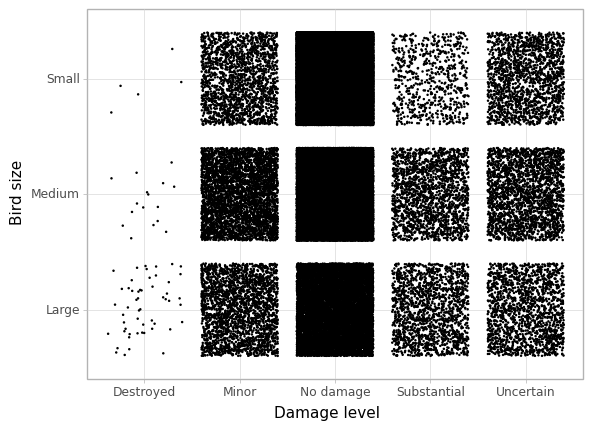

<ggplot: (8765874649521)>

In [ ]:
p = (ggplot(df_filtered, aes(x = 'DAMAGE_LEVEL_cleaned', y ='SIZE_cleaned')) + 
 geom_jitter(size = 0.0001) + 
 theme_light() + 
 xlab("Damage level") +
 ylab("Bird size"))
ggsave(plot = p, filename='bird_size_vs_damage_level.png', device = 'png', path = '/content/gdrive/MyDrive/TFM/plots', ddpi =1000)
p

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_jitter : Removed 116785 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


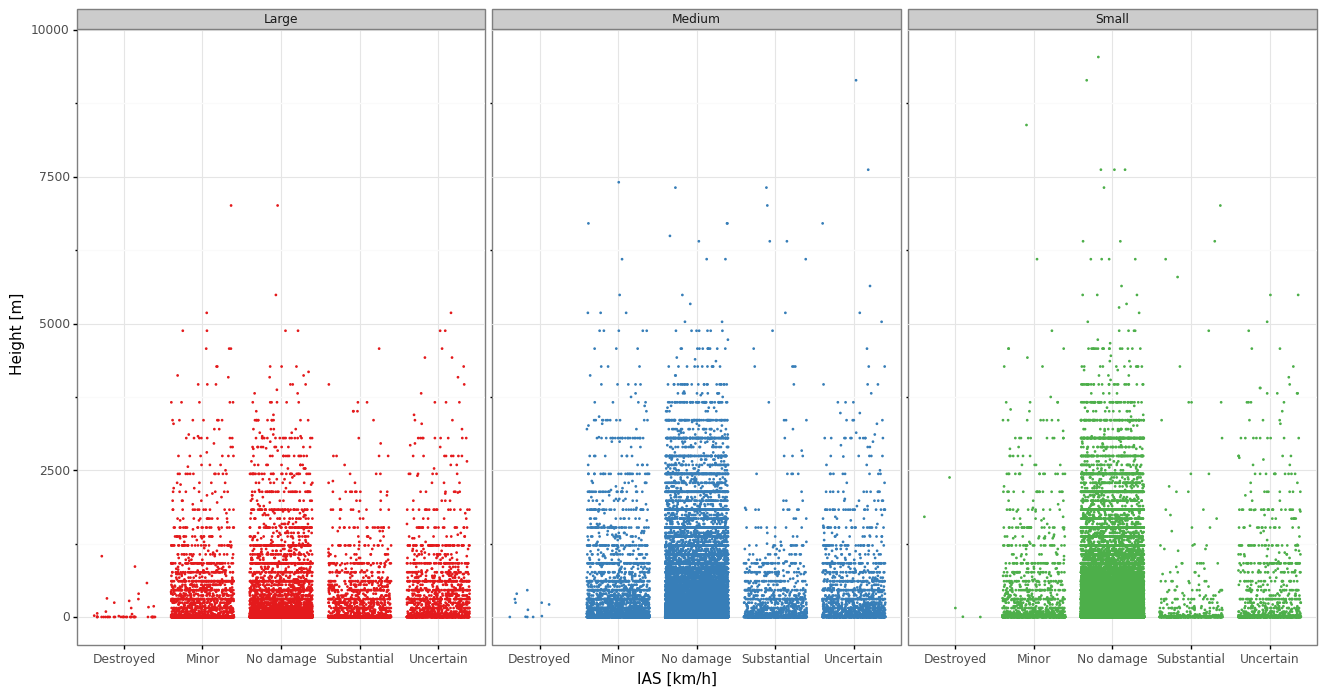

<ggplot: (8765874650117)>

In [ ]:
p = (ggplot(df_filtered, aes(x = 'DAMAGE_LEVEL_cleaned', y ='HEIGHT_m_cleaned')) + 
 geom_jitter(aes(color = 'SIZE_cleaned'), size = 0.1) +
 facet_wrap('~SIZE_cleaned') + 
 theme_bw() +
 theme(figure_size=(16, 8), legend_position = "none") +
 xlab("IAS [km/h]") + ylab("Height [m]") + scale_color_brewer(type="qual", palette="Set1"))
#ggsave(plot = p, filename='scatter_plot_speed_height_damage.png', device = 'png', path = '/content/gdrive/MyDrive/TFM/plots', dpi=1000 )
p

In [ ]:
df_filtered.loc[(df_filtered.PHASE_OF_FLIGHT_cleaned.isna() == False) & ((df_filtered.DAMAGE_LEVEL_cleaned == 'Destroyed') | (df_filtered.DAMAGE_LEVEL_cleaned == 'Substantial'))
                            , ['DAMAGE_LEVEL_cleaned', 'PHASE_OF_FLIGHT_cleaned']]

,DAMAGE_LEVEL_cleaned,PHASE_OF_FLIGHT_cleaned
3,Substantial,Approach
34,Substantial,Take-off Run
109,Substantial,Take-off Run
115,Substantial,Approach
144,Substantial,Climb
...,...,...
248963,Substantial,En Route
248990,Substantial,En Route
248992,Substantial,En Route
248994,Substantial,Departure


/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /content/gdrive/MyDrive/TFM/plots/damage_level_vs_phase_of_flight.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


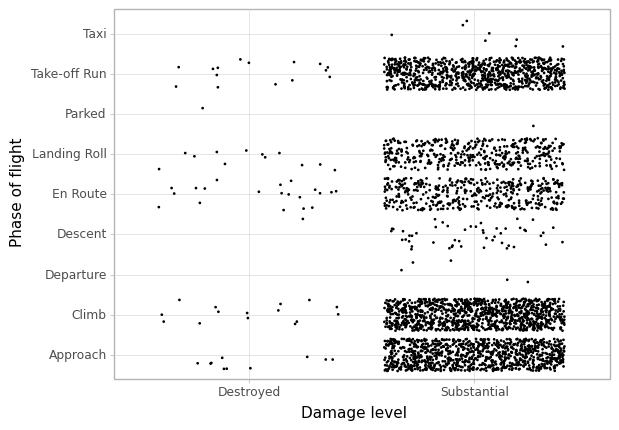

<ggplot: (8765874681589)>

In [ ]:
p = (ggplot(df_filtered.loc[(df_filtered.PHASE_OF_FLIGHT_cleaned.isna() == False) & ((df_filtered.DAMAGE_LEVEL_cleaned == 'Destroyed') | (df_filtered.DAMAGE_LEVEL_cleaned == 'Substantial'))
                            , ['DAMAGE_LEVEL_cleaned', 'PHASE_OF_FLIGHT_cleaned']], aes(x = 'DAMAGE_LEVEL_cleaned', y ='PHASE_OF_FLIGHT_cleaned')) + 
 geom_jitter(size = 0.1) + 
 theme_light() + 
 xlab("Damage level") +
 ylab("Phase of flight"))
ggsave(plot = p, filename='damage_level_vs_phase_of_flight.png', device = 'png', path = '/content/gdrive/MyDrive/TFM/plots', ddpi =1000)
p

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


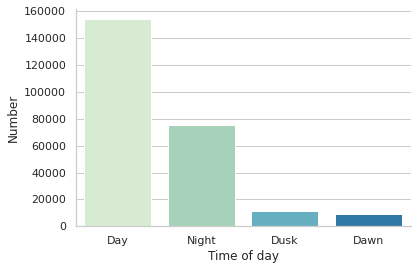

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.barplot(df_filtered['TIME_OF_DAY_cleaned'].value_counts().index,
            df_filtered['TIME_OF_DAY_cleaned'].value_counts().values,
            palette = 'GnBu')
# Actual plotting code omitted

sns.despine()
plt.xlabel('Time of day')
plt.ylabel('Number')
plt.show()
plt.savefig('/content/gdrive/MyDrive/TFM/plots/time_of_day.eps', bbox_inches="tight", format='eps')

In [ ]:
df_filtered.drop(columns = ['SIZE'], inplace = True)

In [ ]:
df_filtered.shape

(250080, 67)

### ENROUTE STATE

According to FAA notes, this feature means that strike did not occur on approach, climb, landing roll, taxi or take-off, aircraft was enroute. This shows location.

Therefore, it is expected most of PHASE_OF_FLIGHT values, if not all, for this feature to be 'En Route'. In case there is any other PHASE_OF_FLIGHT value assign for that data, it will be transformed to En Route in order to be coherent. 

In [ ]:
print('The number of missing values for ENROUTE_STATE is', df_filtered['ENROUTE_STATE'].isnull().sum())
print('The number of non-missing values for ENROUTE_STATE is', df_filtered['ENROUTE_STATE'].notnull().sum())

The number of missing values for ENROUTE_STATE is 245761
The number of non-missing values for ENROUTE_STATE is 4319


In [ ]:
df_filtered_enroute = df_filtered.filter(['ENROUTE_STATE', 'LATITUDE_cleaned', 'LONGITUDE_cleaned', 'PHASE_OF_FLIGHT_cleaned', 'STATE_cleaned'])

In [ ]:
df_filtered_enroute.loc[df_filtered_enroute['ENROUTE_STATE'].notnull()]

,ENROUTE_STATE,LATITUDE_cleaned,LONGITUDE_cleaned,PHASE_OF_FLIGHT_cleaned,STATE_cleaned
12,AK,NaN,NaN,En Route,UNKNOWN
131,TX,NaN,NaN,En Route,UNKNOWN
158,FL,NaN,NaN,En Route,UNKNOWN
247,SD,NaN,NaN,En Route,UNKNOWN
316,KS,NaN,NaN,En Route,UNKNOWN
...,...,...,...,...,...
248991,IA,NaN,NaN,En Route,UNKNOWN
248992,NE,NaN,NaN,En Route,UNKNOWN
249229,TX,NaN,NaN,En Route,UNKNOWN
249530,VA,NaN,NaN,En Route,UNKNOWN


In [ ]:
df_filtered.loc[df_filtered_enroute['ENROUTE_STATE'].notnull(), 'PHASE_OF_FLIGHT_cleaned'].value_counts()

En Route        4050
Approach          34
Climb             19
Take-off Run       2
Landing Roll       1
Name: PHASE_OF_FLIGHT_cleaned, dtype: int64

In [ ]:
# Values for which ENROUTE_STATE is not null are categorized as 'En Route'
for i in df_filtered_enroute.loc[df_filtered_enroute['ENROUTE_STATE'].notnull()].index.tolist():
  df_filtered.loc[i, 'PHASE_OF_FLIGHT_cleaned'] = 'En Route' 

Missing values for this feature are assumed to indicate that the incident did not took place En Route, therefore, NaN values are replaced by Not En Route.

In [ ]:
df_filtered['ENROUTE_STATE_cleaned'] = df_filtered['ENROUTE_STATE']
df_filtered['ENROUTE_STATE_cleaned'].fillna('Not En Route', inplace = True)

In [ ]:
print('The number of missing values for ENROUTE_STATE_cleaned is', df_filtered['ENROUTE_STATE_cleaned'].isnull().sum())

The number of missing values for ENROUTE_STATE_cleaned is 0


In [ ]:
df_filtered.drop(columns = ['ENROUTE_STATE'], inplace = True)

In [ ]:
df_filtered.shape

(250080, 67)

### NR_INJURIES

This feature indicates the number of people injured. In this case, it is assumed that if there is no data on this feature it means there is no people injured.

In [ ]:
print('The number of missing values for NR_INJURIES is', df_filtered['NR_INJURIES'].isnull().sum())

The number of missing values for NR_INJURIES is 249827


In [ ]:
df_filtered['NR_INJURIES'].value_counts()

1.0    199
2.0     46
7.0      2
5.0      2
4.0      2
3.0      2
Name: NR_INJURIES, dtype: int64

In [ ]:
df_filtered['NR_INJURIES_cleaned'] = df_filtered['NR_INJURIES']
df_filtered['NR_INJURIES_cleaned'].fillna('None', inplace = True)

In [ ]:
print('The number of missing values for NR_INJURIES_cleaned is', df_filtered['NR_INJURIES_cleaned'].isnull().sum())

The number of missing values for NR_INJURIES_cleaned is 0


In [ ]:
df_filtered.drop(columns = ['NR_INJURIES'], inplace = True)

In [ ]:
df_filtered.shape

(250080, 67)

### NR_FATALITIES

This feature indicates the number of human fatalities. In this case, the same hypothesis as for EFFECT feature as followed. As this is a FAA database, it should contain all data concerning accidents and serious incidents. In case there are human fatalities it is because the bird strike leads to an accident, and therefore, it must be notified and it should be included in FAA database for wildstrikes.

In [ ]:
print('The number of missing values for NR_FATALITIES is', df_filtered['NR_FATALITIES'].isnull().sum())

The number of missing values for NR_FATALITIES is 250064


In [ ]:
df_filtered['NR_FATALITIES'].value_counts()

1.0    8
2.0    4
8.0    1
5.0    1
4.0    1
3.0    1
Name: NR_FATALITIES, dtype: int64

In [ ]:
df_filtered.loc[df_filtered['DAMAGE_LEVEL_cleaned'] == 'Destroyed'].filter(['NR_FATALITIES']).dropna(inplace=False).value_counts()

NR_FATALITIES
1.0              7
2.0              4
8.0              1
5.0              1
4.0              1
3.0              1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


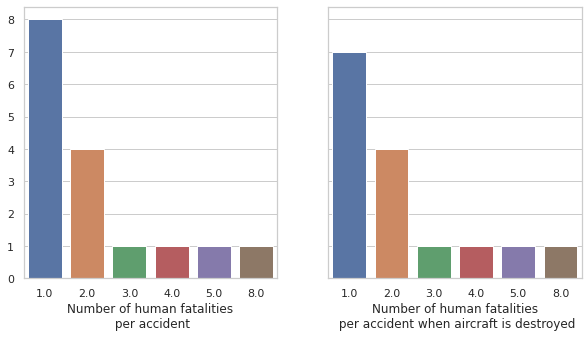

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey = True)
sns.barplot(df_filtered['NR_FATALITIES'].value_counts().index, df_filtered['NR_FATALITIES'].value_counts().values, ax=ax[0])
ax[0].set_xlabel('Number of human fatalities\n per accident')
sns.barplot(df_filtered.loc[df_filtered['DAMAGE_LEVEL_cleaned'] == 'Destroyed', 'NR_FATALITIES'].dropna(inplace=False).value_counts().index,
            df_filtered.loc[df_filtered['DAMAGE_LEVEL_cleaned'] == 'Destroyed', 'NR_FATALITIES'].dropna(inplace=False).value_counts().values, ax=ax[1])
ax[1].set_xlabel('Number of human fatalities\n per accident when aircraft is destroyed')
plt.show()

In [ ]:
df_filtered['NR_FATALITIES_cleaned'] = df_filtered['NR_FATALITIES']
df_filtered['NR_FATALITIES_cleaned'].fillna(0, inplace = True)

In [ ]:
print('The number of missing values for NR_FATALITIES_cleaned is', df_filtered['NR_FATALITIES_cleaned'].isnull().sum())

The number of missing values for NR_FATALITIES_cleaned is 0


In [ ]:
df_filtered.drop(columns = ['NR_FATALITIES'], inplace = True)

In [ ]:
df_filtered.shape

(250080, 67)

# GEOSPATIAL PLOT

In [ ]:
usa

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
5,South Dakota,6,46,West North Central,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."
6,Wyoming,7,56,Mountain,WY,"POLYGON ((-104.05362 41.69822, -104.05550 41.5..."
7,Wisconsin,8,55,East North Central,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ..."
8,Idaho,9,16,Mountain,ID,"POLYGON ((-117.02630 43.67903, -117.02379 43.7..."
9,Vermont,10,50,New England,VT,"POLYGON ((-73.25806 42.74606, -73.26928 42.747..."


In [ ]:
state_strike_number = {'STATE':df_filtered['STATE_cleaned'].replace('UNKNOWN', np.nan).value_counts().index,
                       'number': df_filtered['STATE_cleaned'].replace('UNKNOWN', np.nan).value_counts().values}
state_strike_number = pd.DataFrame(state_strike_number)
state_strike_number

,STATE,number
0,TX,21515
1,CA,18252
2,FL,17243
3,NY,11941
4,IL,10531
...,...,...
58,AB,52
59,MB,16
60,NL,6
61,NS,5


In [ ]:
usa_merged = pd.merge(usa, state_strike_number, left_on = "STATE_ABBR", right_on = 'STATE', how = 'left')
usa_merged.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,STATE,number
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",HI,4647
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA,3708
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",MT,694
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",ME,748
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",ND,1098


In [ ]:
usa_airports = pd.read_csv('/content/gdrive/MyDrive/TFM/Otros/dataset_FAA/us-airports.csv', delimiter = ',', encoding = 'UTF-8', skiprows = [1])
usa_airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,region_name,iso_region,local_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,3632,KLAX,large_airport,Los Angeles International Airport,33.942501,-118.407997,125.0,NaN,United States,US,California,US-CA,CA,Los Angeles,1,KLAX,LAX,LAX,https://www.flylax.com/,https://en.wikipedia.org/wiki/Los_Angeles_Inte...,NaN,1335475,2020-04-26T22:37:22+00:00
1,3754,KORD,large_airport,Chicago O'Hare International Airport,41.978600,-87.904800,672.0,NaN,United States,US,Illinois,US-IL,IL,Chicago,1,KORD,ORD,ORD,https://www.flychicago.com/ohare/home/pages/de...,https://en.wikipedia.org/wiki/O'Hare_Internati...,"CHI, Orchard Place",1503175,2018-09-16T02:35:35+00:00
2,3622,KJFK,large_airport,John F Kennedy International Airport,40.639801,-73.778900,13.0,NaN,United States,US,New York,US-NY,NY,New York,1,KJFK,JFK,JFK,https://www.jfkairport.com/,https://en.wikipedia.org/wiki/John_F._Kennedy_...,"Manhattan, New York City, NYC, Idlewild, IDL, ...",1052075,2021-11-21T19:43:08+00:00
3,3384,KATL,large_airport,Hartsfield Jackson Atlanta International Airport,33.636700,-84.428101,1026.0,NaN,United States,US,Georgia,US-GA,GA,Atlanta,1,KATL,ATL,ATL,http://www.atlanta-airport.com/,https://en.wikipedia.org/wiki/Hartsfield–Jacks...,NaN,2002475,2018-09-19T14:50:01+00:00
4,3878,KSFO,large_airport,San Francisco International Airport,37.618999,-122.375000,13.0,NaN,United States,US,California,US-CA,CA,San Francisco,1,KSFO,SFO,SFO,http://www.flysfo.com/,https://en.wikipedia.org/wiki/San_Francisco_In...,"QSF, QBA",1112475,2008-06-13T14:30:04+00:00


In [ ]:
large_airports = usa_airports[usa_airports['type'] == 'large_airport']

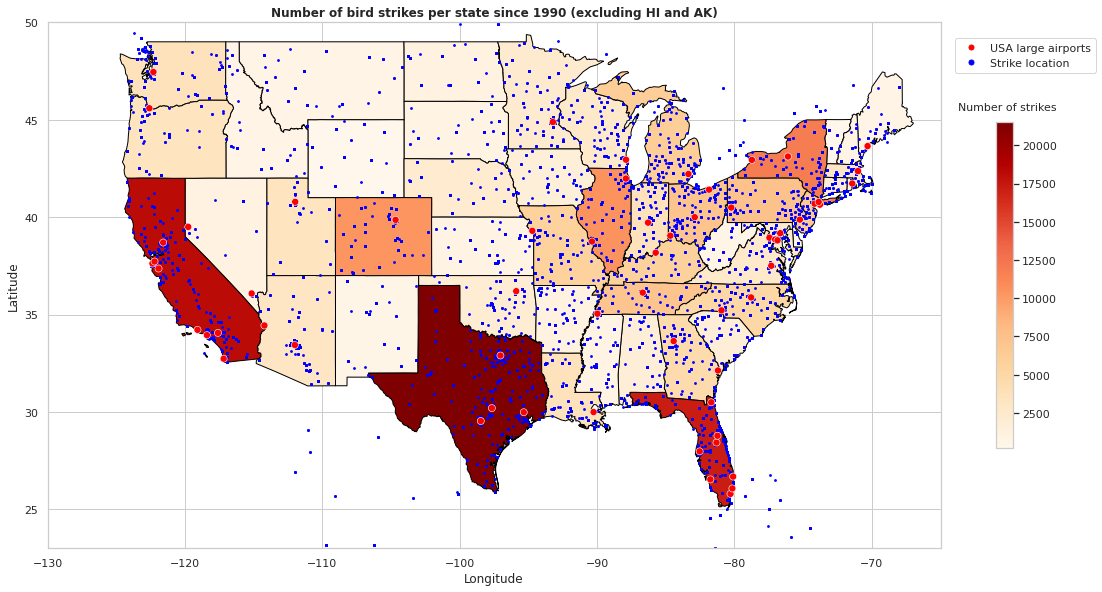

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))
usa_merged.plot(ax=ax, edgecolor = 'black', linewidth = 1, column='number', cmap='OrRd', legend = True, legend_kwds={'shrink': 0.3})
plt.axis([-130, -65, 23, 50])
plt.title('Number of bird strikes per state since 1990 (excluding HI and AK)', fontweight = 'bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
sns.scatterplot(data=df_filtered, x=df_filtered['LONGITUDE_cleaned'].replace('UNKNOWN', np.nan).dropna(inplace = False),
                y=df_filtered['LATITUDE_cleaned'].replace('UNKNOWN', np.nan).dropna(inplace = False), s = 8, color = 'blue', linewidth=0)
sns.scatterplot(data=large_airports, x=usa_airports['longitude_deg'].dropna(inplace = False),
                y=large_airports['latitude_deg'].dropna(inplace = False), s = 50,
                hue = large_airports['type'], palette = ['red'])
red_circle = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                          markersize=10, label='USA large airports')
blue_circle = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                          markersize=10, label='Strike location')
plt.legend(handles=[red_circle, blue_circle], bbox_to_anchor=(1.18,0.98), loc='upper right')
plt.text(-63.7, 45.5, 'Number of strikes', fontsize=11)
plt.show()
plt.savefig('/content/gdrive/MyDrive/TFM/plots/number_of_bird_strikes_per_state_excluding_HI_and_AK.png', bbox_inches="tight", format='png', ddpi = 1000)

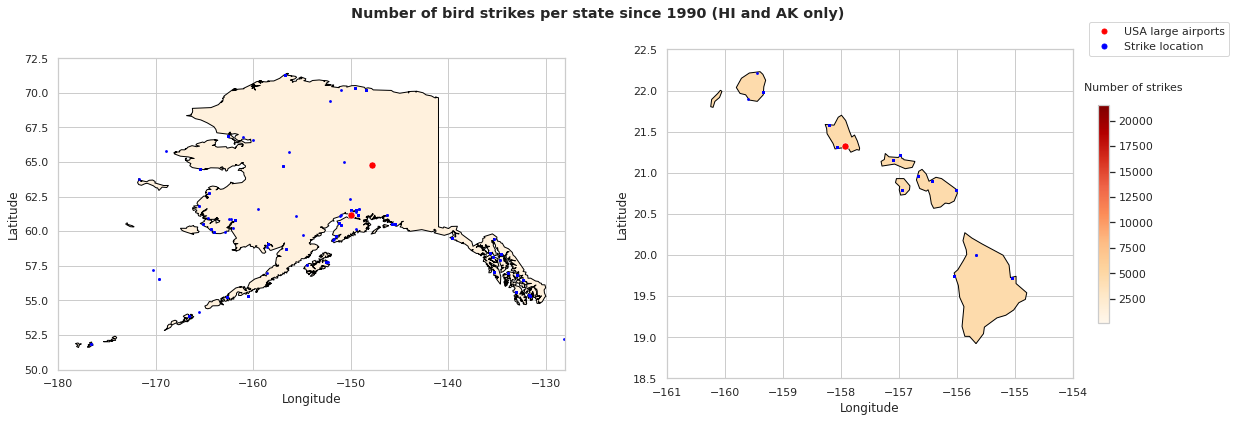

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20,10))
#usa_merged.plot(ax=ax, edgecolor = 'black', linewidth = 1, column='number', cmap='OrRd', legend = True, legend_kwds={'shrink': 0.3})
ax[0].axis([-180,-128, 50, 72.5])
usa_merged.plot(ax = ax[0], edgecolor = 'black', linewidth = 1, column='number', cmap='OrRd')
sns.scatterplot(data=df_filtered, x=df_filtered['LONGITUDE_cleaned'].replace('UNKNOWN', np.nan).dropna(inplace = False),
                y=df_filtered['LATITUDE_cleaned'].replace('UNKNOWN', np.nan).dropna(inplace = False), s = 8, color = 'blue', linewidth=0, ax=ax[0])
sns.scatterplot(data=large_airports, x=usa_airports['longitude_deg'].dropna(inplace = False),
                y=large_airports['latitude_deg'].dropna(inplace = False), s = 50,
                color = 'red', ax=ax[0])
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

ax[1].axis([-161, -154, 18.5, 22.5])
usa_merged.plot(ax = ax[1], edgecolor = 'black', linewidth = 1, column='number', cmap='OrRd', legend = True, legend_kwds={'shrink': 0.4})

sns.scatterplot(data=df_filtered, x=df_filtered['LONGITUDE_cleaned'].replace('UNKNOWN', np.nan).dropna(inplace = False),
                y=df_filtered['LATITUDE_cleaned'].replace('UNKNOWN', np.nan).dropna(inplace = False), s = 8, color = 'blue', linewidth=0, ax=ax[1])

sns.scatterplot(data=large_airports, x=usa_airports['longitude_deg'].dropna(inplace = False),
                y=large_airports['latitude_deg'].dropna(inplace = False), s = 50,
                color = 'red', ax=ax[1])
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

red_circle = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                          markersize=10, label='USA large airports')
blue_circle = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                          markersize=10, label='Strike location')
ax[1].legend(handles=[red_circle, blue_circle], bbox_to_anchor=(1.4,1.1), loc='upper right')
ax[1].text(-153.8, 22, 'Number of strikes', fontsize=11)


fig.suptitle('Number of bird strikes per state since 1990 (HI and AK only)', y = 0.79, fontweight ="bold")
plt.show()
plt.savefig('/content/gdrive/MyDrive/TFM/plots/number_of_bird_strikes_per_state_HI_and_AK_only.png', bbox_inches="tight", format='png', ddpi = 1000)

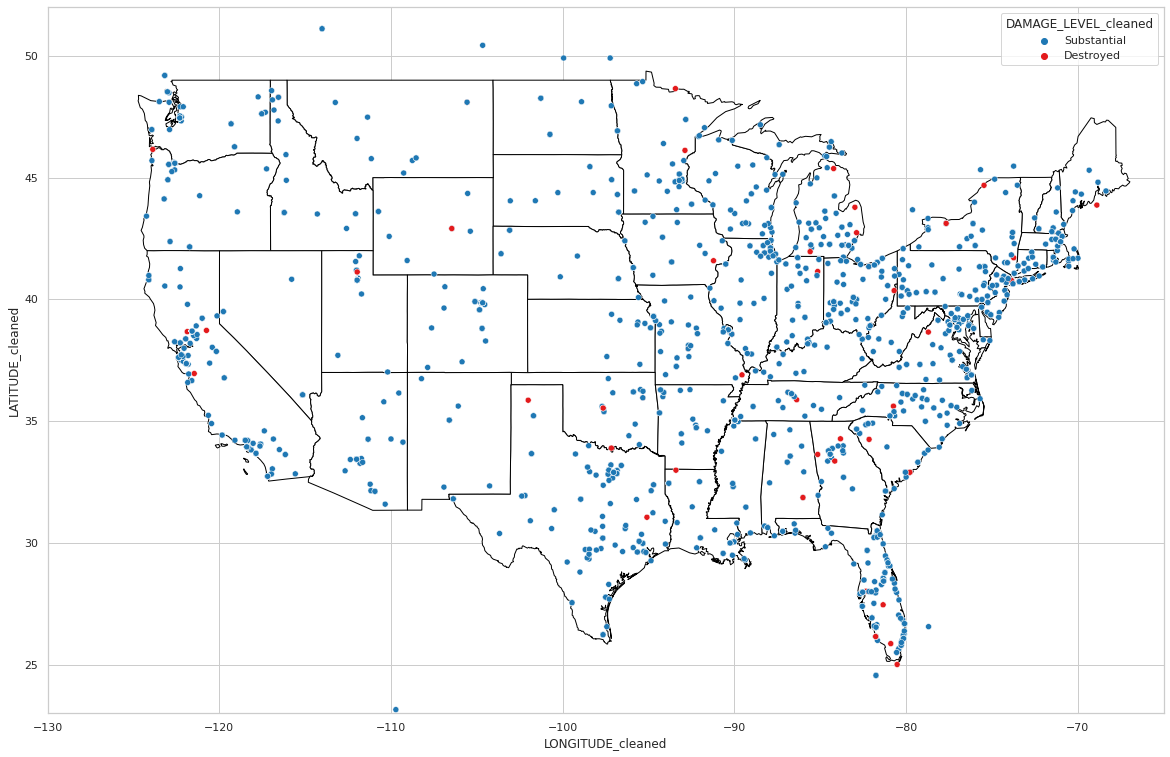

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))
usa.plot(ax=ax, edgecolor = 'black', color = 'white', linewidth = 1)
df_lat_long = df_filtered.loc[(df_filtered['DAMAGE_LEVEL_cleaned'] == 'Substantial') | (df_filtered['DAMAGE_LEVEL_cleaned'] == 'Destroyed'), :]
 
sns.scatterplot(data=df_filtered, x=df_lat_long['LONGITUDE_cleaned'].replace('UNKNOWN', np.nan).dropna(inplace = False),
                y=df_lat_long['LATITUDE_cleaned'].replace('UNKNOWN', np.nan).dropna(inplace = False),
                hue=df_lat_long['DAMAGE_LEVEL_cleaned'],
                palette = ['#1f78b4', '#e31a1c'])

plt.axis([-130, -65, 23, 52])
plt.show()

# DATASET SAVING

In [ ]:
df_bird_strikes = df_filtered

In [ ]:
df_bird_strikes.head()

,AIRPORT_ID_cleaned,AIRPORT_cleaned,LATITUDE_cleaned,LONGITUDE_cleaned,RUNWAY,OPID,OPERATOR,SKY_cleaned,COST_REPAIRS,INGESTED,INDICATED_DAMAGE,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,INCIDENT_DATE_cleaned,INCIDENT_MONTH_cleaned,INCIDENT_YEAR_cleaned,TIME_cleaned,TIME_OF_DAY_cleaned,HOUR_cleaned,RUNWAY_cleaned,STATE_cleaned,AIRCRAFT_TYPE,AIRCRAFT_cleaned,AIRCRAFT_TYPE_norm_with_unknown,AC_CLASS_cleaned,TYPE_ENG_cleaned,PHASE_OF_FLIGHT_cleaned,HEIGHT_ft_cleaned,HEIGHT_m_cleaned,SPEED_knot_IAS_cleaned,SPEED_km/h_IAS_cleaned,DISTANCE_NM_cleaned,DISTANCE_KM_cleaned,STR_ENGINE,DAM_ENGINE,ING_ENGINE,DAMAGE_LEVEL_cleaned,EFFECT_cleaned,EFFECT_OTHER_cleaned,INCIDENT_TYPE_cleaned,SPECIES_cleaned,WARNED_cleaned,NUM_SEEN_cleaned,NUM_STRUCK_cleaned,SIZE_cleaned,ENROUTE_STATE_cleaned,NR_INJURIES_cleaned,NR_FATALITIES_cleaned
0,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.24235,-85.39586,NaN,PVT,PRIVATELY OWNED,No Cloud,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,1990-10-15,10,1990,23,Night,23,32,IN,C-172,CESSNA 172,CESSNA 172,Airplane,Piston,Approach,200.0,60.96,70.0,129.64,NaN,NaN,False,False,False,No damage,None,NaN,Non-serious,Unknown bird,No,1,1,Small,Not En Route,None,0.0
1,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,1,TWA,TRANS WORLD AIRLINES,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,1993-01-08,1,1993,7,Day,7,1,LA,B-727,B-727,B-727,Airplane,Turbofan,Landing Roll,0.0,0.00,NaN,NaN,0.0,0.000,False,False,False,No damage,None,NaN,Non-serious,Unknown bird,Unknown,NaN,1,Medium,Not En Route,None,0.0
2,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,22R,UAL,UNITED AIRLINES,NaN,NaN,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,1996-08-18,8,1996,22,Night,22,22R,IL,B-757-200,B-757,B-757,Airplane,Turbofan,Landing Roll,0.0,0.00,NaN,NaN,0.0,0.000,False,False,False,No damage,None,NaN,Non-serious,Blackbirds,Unknown,NaN,1,Small,Not En Route,None,0.0
3,KMHT,MANCHESTER AIRPORT,42.93452,-71.43706,35,PVT,PRIVATELY OWNED,No Cloud,NaN,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,1993-09-19,9,1993,14,Day,14,35,NH,BE-33,BE-33,BE-33,Airplane,Piston,Approach,1800.0,548.64,150.0,277.80,8.0,14.816,False,False,False,Substantial,Precautionary Landing,NaN,Serious,Unknown bird,No,2-10,1,Large,Not En Route,None,0.0
4,KELP,EL PASO INTL ARPT,31.80667,-106.37781,26L,AAL,AMERICAN AIRLINES,No Cloud,NaN,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,NaN,1991-03-23,3,1991,22,Night,22,26L,TX,B-727,B-727,B-727,Airplane,Turbofan,Approach,200.0,60.96,135.0,250.02,NaN,NaN,False,False,False,No damage,None,NaN,Non-serious,Unknown bird,No,NaN,1,Small,Not En Route,None,0.0


In [ ]:
[col for col in df_bird_strikes.columns]

['AIRPORT_ID_cleaned',
 'AIRPORT_cleaned',
 'LATITUDE_cleaned',
 'LONGITUDE_cleaned',
 'RUNWAY',
 'OPID',
 'OPERATOR',
 'SKY_cleaned',
 'COST_REPAIRS',
 'INGESTED',
 'INDICATED_DAMAGE',
 'STR_RAD',
 'DAM_RAD',
 'STR_WINDSHLD',
 'DAM_WINDSHLD',
 'STR_NOSE',
 'DAM_NOSE',
 'STR_PROP',
 'DAM_PROP',
 'STR_WING_ROT',
 'DAM_WING_ROT',
 'STR_FUSE',
 'DAM_FUSE',
 'STR_LG',
 'DAM_LG',
 'STR_TAIL',
 'DAM_TAIL',
 'STR_LGHTS',
 'DAM_LGHTS',
 'STR_OTHER',
 'DAM_OTHER',
 'OTHER_SPECIFY',
 'INCIDENT_DATE_cleaned',
 'INCIDENT_MONTH_cleaned',
 'INCIDENT_YEAR_cleaned',
 'TIME_cleaned',
 'TIME_OF_DAY_cleaned',
 'HOUR_cleaned',
 'RUNWAY_cleaned',
 'STATE_cleaned',
 'AIRCRAFT_TYPE',
 'AIRCRAFT_cleaned',
 'AIRCRAFT_TYPE_norm_with_unknown',
 'AC_CLASS_cleaned',
 'TYPE_ENG_cleaned',
 'PHASE_OF_FLIGHT_cleaned',
 'HEIGHT_ft_cleaned',
 'HEIGHT_m_cleaned',
 'SPEED_knot_IAS_cleaned',
 'SPEED_km/h_IAS_cleaned',
 'DISTANCE_NM_cleaned',
 'DISTANCE_KM_cleaned',
 'STR_ENGINE',
 'DAM_ENGINE',
 'ING_ENGINE',
 'DAMAGE_LEVE

Columns with strong missing data filling hypoithesis are removed from the dataset to be saved.

In [ ]:
df_bird_strikes = df_bird_strikes.drop(columns = ['COST_REPAIRS', 'OPID', 'OPERATOR', 'TIME_cleaned', 'TIME_OF_DAY_cleaned', 'AIRCRAFT_TYPE_norm_with_unknown', 'RUNWAY', 'RUNWAY_cleaned', 'HOUR_cleaned', 'NR_INJURIES_cleaned'])

In [ ]:
df_bird_strikes = df_bird_strikes.rename(columns = lambda x: x.strip('_cleaned'))

In [ ]:
df_bird_strikes.head()

,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,SKY,INGESTED,INDICATED_DAMAGE,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,STATE,AIRCRAFT_TYPE,AIRCRAFT,AC_CLASS,TYPE_ENG,PHASE_OF_FLIGHT,HEIGHT_ft,HEIGHT_m,SPEED_knot_IAS,SPEED_km/h_IAS,DISTANCE_NM,DISTANCE_KM,STR_ENGINE,DAM_ENGINE,ING_ENGINE,DAMAGE_LEVEL,EFFECT,EFFECT_OTHER,INCIDENT_TYPE,SPECIES,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,ENROUTE_STATE,NR_FATALITIES
0,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.24235,-85.39586,No Cloud,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,1990-10-15,10,1990,IN,C-172,CESSNA 172,Airplane,Piston,Approach,200.0,60.96,70.0,129.64,NaN,NaN,False,False,False,No damage,None,NaN,Non-serious,Unknown bird,No,1,1,Small,Not En Route,0.0
1,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,1993-01-08,1,1993,LA,B-727,B-727,Airplane,Turbofan,Landing Roll,0.0,0.00,NaN,NaN,0.0,0.000,False,False,False,No damage,None,NaN,Non-serious,Unknown bird,Unknown,NaN,1,Medium,Not En Route,0.0
2,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,NaN,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,1996-08-18,8,1996,IL,B-757-200,B-757,Airplane,Turbofan,Landing Roll,0.0,0.00,NaN,NaN,0.0,0.000,False,False,False,No damage,None,NaN,Non-serious,Blackbirds,Unknown,NaN,1,Small,Not En Route,0.0
3,KMHT,MANCHESTER AIRPORT,42.93452,-71.43706,No Cloud,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,1993-09-19,9,1993,NH,BE-33,BE-33,Airplane,Piston,Approach,1800.0,548.64,150.0,277.80,8.0,14.816,False,False,False,Substantial,Precautionary Landing,NaN,Serious,Unknown bird,No,2-10,1,Large,Not En Route,0.0
4,KELP,EL PASO INTL ARPT,31.80667,-106.37781,No Cloud,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,NaN,1991-03-23,3,1991,TX,B-727,B-727,Airplane,Turbofan,Approach,200.0,60.96,135.0,250.02,NaN,NaN,False,False,False,No damage,None,NaN,Non-serious,Unknown bird,No,NaN,1,Small,Not En Route,0.0


In [ ]:
df_bird_strikes.to_csv('/content/gdrive/MyDrive/TFM/bird_strike_cleaned.csv', index=False)